# Introduction

This notebook backtests 1500 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import ticker_stats, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_2000.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.sample(1530).to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester(tickers)

Simulating 1522 stocks
Failed to smooth prices for NTR!
Failed to smooth prices for PIPR!
Failed to smooth prices for RHI!
Failed to smooth prices for PROV!
Failed to smooth prices for STRA!
Failed to smooth prices for HSY!
Unable to determine minima and maxima for the following tickers:
['NTR', 'PIPR', 'RHI', 'PROV', 'STRA', 'HSY']
Simulating now with 1516 stocks
tickers= ['CM', 'ROIC', 'MCS', 'OTTR', 'MAS', 'CVIA', 'PPIH', 'PRA', 'LSI', 'NVDA', 'UAL', 'IEC', 'NBSE', 'TTC', 'AVT', 'DAIO', 'RILY', 'ATNX', 'CALX', 'INSG', 'QSR', 'SFM', 'EDSA', 'BTE', 'ISBC', 'KR', 'SIX', 'GFED', 'YMAB', 'CNDT', 'QCRH', 'PGRE', 'NTGN', 'AWK', 'CURO', 'UNH', 'NBIX', 'VRNT', 'USLM', 'HPQ', 'KTCC', 'CTIC', 'CMG', 'ACNB', 'FFNW', 'LBAI', 'ODT', 'LXP', 'RNST', 'SEM', 'CHEF', 'MFNC', 'AMSF', 'RVNC', 'EOG', 'SYBX', 'CAH', 'TNC', 'NDAQ', 'NP', 'SRI', 'USAU', 'BR', 'ISTR', 'PEP', 'GEOS', 'NX', 'FRPT', 'GNTY', 'HNI', 'PCTY', 'AWRE', 'NSSC', 'AROW', 'ELS', 'GPRE', 'EFC', 'DG', 'GPS', 'VRTX', 'EVRG', 'INSP', 'INBK',

Failed to get possible trades for NVTRQ
Failed to get possible trades for HOSS
Failed to get possible trades for DESTQ
Failed to get possible trades for CRRT
Possible trades to simulate: 16292
before day_close: 2016-09-09 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-09 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-12 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-12 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-13 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-13 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-14 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-14 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-15 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-15 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-16 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-16 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-19 00:00:00 0 10000 0 10000 0 True
after day_close: 201

after day_close: 2017-01-18 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-19 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-19 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-20 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-20 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-23 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-23 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-24 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-24 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-25 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-25 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-26 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-26 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-27 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-27 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-30 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-30 00:0

after buy: invested in ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in CBPO on 2017-03-20 00:00:00 with target sell date of 2017-04-13 00:00:00
maxed out: CBPO is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in ROLL on 2017-03-20 00:00:00 with target sell date of 2017-05-02 00:00:00
maxed out: ROLL is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in USM on 2017-03-20 00:00:00 with target sell date of 2017-05-31 00:00:00
maxed out: USM is not expected to perform better than

after buy: invested in ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in TBBK on 2017-03-20 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: TBBK is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in KINS on 2017-03-20 00:00:00 with target sell date of 2017-03-22 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in AUY on 2017-03-20 00:00:00 with target sell date of 2017-04-04 00:00:00
maxed out: AUY is not expected to perform better

after buy: invested in ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in IESC on 2017-03-20 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: IESC is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in TMP on 2017-03-20 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: TMP is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in NUE on 2017-03-20 00:00:00 with target sell date of 2017-03-21 00:00:00
maxed out: NUE is not expected to perform better t

after buy: invested in ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9792.021249306506 in_use=9748.82962965361 free=43.19161965289709
*** buying 1958.4042498613012 in ANIP on 2017-03-22 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: ANIP is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9792.021249306506 in_use=9748.82962965361 free=43.19161965289709
*** buying 1958.4042498613012 in CORE on 2017-03-22 00:00:00 with target sell date of 2017-04-18 00:00:00
maxed out: CORE is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9792.021249306506 in_use=9748.82962965361 free=43.19161965289709
*** buying 1958.4042498

after buy: invested in ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9918.56392489174 in_use=9918.563924891741 free=0.0
*** buying 1983.7127849783478 in WTT on 2017-03-23 00:00:00 with target sell date of 2017-06-07 00:00:00
maxed out: WTT is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9918.56392489174 in_use=9918.563924891741 free=0.0
*** buying 1983.7127849783478 in NM on 2017-03-23 00:00:00 with target sell date of 2017-04-04 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9918.56392489174 in_use=9918.563924891741 free=0.0
*** buying 1983.7127849783478 in HROW on 2017-03-23 00:00:00 with 

after buy: invested in ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9985.450580260378 in_use=9985.45058026038 free=0.0
*** buying 1997.0901160520757 in GNRC on 2017-03-23 00:00:00 with target sell date of 2017-07-14 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9985.450580260378 in_use=9985.45058026038 free=0.0
*** buying 1997.0901160520757 in GCO on 2017-03-23 00:00:00 with target sell date of 2017-10-05 00:00:00
maxed out: GCO is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9985.450580260378 in_use=9985.45058026038 free=0.0
*** buying 1997.0901160520757 in AEZS on 2017-03-23 00:00:00 w

after buy: invested in ['ELOX', 'BHC', 'TCCO', 'CTRC', 'SGMO'] (5
capital=10264.216604161466 in_use=10264.216604161467 free=0.0
*** buying 2052.843320832293 in ZN on 2017-03-28 00:00:00 with target sell date of 2017-05-02 00:00:00
*** selling SGMO on 2017-03-28 00:00:00 to free up money for ZN
profit of selling SGMO on 2017-03-28 00:00:00:  0.0 0.0%
enough money (1937.5500400320257) to buy ZN (capital=10264.216604161466
invested in: ['ELOX', 'BHC', 'TCCO', 'CTRC'] (4
you do not have 1937.5500400320257 and setting amount to 1937.5500400320257
after buy: invested in ['ELOX', 'BHC', 'TCCO', 'CTRC', 'ZN'] (5
capital=10264.216604161466 in_use=10264.216604161467 free=0.0
*** buying 2052.843320832293 in UIHC on 2017-03-28 00:00:00 with target sell date of 2018-01-22 00:00:00
maxed out: UIHC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TCCO', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TCCO

after buy: invested in ['BHC', 'TCCO', 'ZN', 'EBS'] (4
capital=9640.157974091677 in_use=8086.975336806924 free=1553.1826372847552
*** buying 1928.0315948183354 in CTRN on 2017-04-03 00:00:00 with target sell date of 2017-04-19 00:00:00
enough money (1553.1826372847552) to buy CTRN (capital=9640.157974091677
invested in: ['BHC', 'TCCO', 'ZN', 'EBS'] (4
you do not have 1553.1826372847552 and setting amount to 1553.1826372847552
after buy: invested in ['BHC', 'TCCO', 'ZN', 'EBS', 'CTRN'] (5
capital=9640.157974091677 in_use=9640.157974091679 free=0.0
*** buying 1928.0315948183354 in SAFT on 2017-04-03 00:00:00 with target sell date of 2017-09-14 00:00:00
maxed out: SAFT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TCCO', 'ZN', 'EBS', 'CTRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TCCO', 'ZN', 'EBS', 'CTRN'] (5
capital=9640.157974091677 in_use=9640.157974091679 free=0.0
*** buying 1928.0315948183354 in RDNT on 2

after buy: invested in ['BHC', 'ZN', 'EBS', 'GEOS', 'BASI'] (5
capital=9405.49522652198 in_use=9261.55413716098 free=143.9410893610011
*** buying 1881.099045304396 in WINA on 2017-04-04 00:00:00 with target sell date of 2017-05-08 00:00:00
*** selling BASI on 2017-04-04 00:00:00 to free up money for WINA
profit of selling BASI on 2017-04-04 00:00:00:  0.0 0.0%
enough money (2025.040134665397) to buy WINA (capital=9405.49522652198
invested in: ['BHC', 'ZN', 'EBS', 'GEOS'] (4
after buy: invested in ['BHC', 'ZN', 'EBS', 'GEOS', 'WINA'] (5
capital=9405.49522652198 in_use=9261.55413716098 free=143.9410893610011
*** buying 1881.099045304396 in WHR on 2017-04-04 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: WHR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'EBS', 'GEOS', 'WINA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'EBS', 'GEOS', 'WINA'] (5
capital=9405.49522652198 in_use=9261.5541371

after buy: invested in ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9362.517800805905 in_use=9173.011525028236 free=189.50627577767023
*** buying 1872.503560161181 in CAMP on 2017-04-05 00:00:00 with target sell date of 2017-04-25 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9362.517800805905 in_use=9173.011525028236 free=189.50627577767023
*** buying 1872.503560161181 in HELE on 2017-04-05 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: HELE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9362.517800805905 in_use=9173.011525028236 free=189.50627577767023
*** buying 1872.503

after buy: invested in ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5
capital=9089.750314345518 in_use=8983.712077927954 free=106.03823641756776
*** buying 1817.9500628691035 in FNCB on 2017-04-06 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: FNCB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5
capital=9089.750314345518 in_use=8983.712077927954 free=106.03823641756776
*** buying 1817.9500628691035 in FRPH on 2017-04-06 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: FRPH is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5
capital=9089.750314345518 in_use=8983.712077927954 free=106.03823641756776
*** buying 1

after buy: invested in ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9156.896704667492 in_use=9012.230115878698 free=144.66658878879844
*** buying 1831.3793409334983 in CVCY on 2017-04-10 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: CVCY is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9156.896704667492 in_use=9012.230115878698 free=144.66658878879844
*** buying 1831.3793409334983 in BSTC on 2017-04-10 00:00:00 with target sell date of 2017-05-11 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9156.896704667492 in_use=9012.230115878698 free=144.66658878879844
*** buying 1

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'DAIO'] (5
capital=8982.928321807703 in_use=8982.928321807707 free=0.0
*** buying 1796.5856643615407 in SGC on 2017-04-12 00:00:00 with target sell date of 2017-04-26 00:00:00
*** selling DAIO on 2017-04-12 00:00:00 to free up money for SGC
profit of selling DAIO on 2017-04-12 00:00:00:  0.0 0.0%
enough money (1753.0554573301958) to buy SGC (capital=8982.928321807703
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT'] (4
you do not have 1753.0554573301958 and setting amount to 1753.0554573301958
after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'SGC'] (5
capital=8982.928321807703 in_use=8982.928321807707 free=0.0
*** buying 1796.5856643615407 in CSGS on 2017-04-12 00:00:00 with target sell date of 2017-05-30 00:00:00
*** selling SGC on 2017-04-12 00:00:00 to free up money for CSGS
profit of selling SGC on 2017-04-12 00:00:00:  0.0 0.0%
enough money (1753.0554573301958) to buy CSGS (capital=8982.928321807703
invested in: ['ZN', 'GEOS', '

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8965.063213274268 in_use=8965.063213274272 free=0.0
*** buying 1793.0126426548536 in BHB on 2017-04-13 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: BHB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8965.063213274268 in_use=8965.063213274272 free=0.0
*** buying 1793.0126426548536 in CASS on 2017-04-13 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: CASS is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8965.063213274268 in_use=8965.063213274272 free=0.0
*** buying 1793.0126426548536 in LBAI on 2017-04-13 00:00:0

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5
capital=8959.037284467859 in_use=8959.037284467862 free=0.0
*** buying 1791.8074568935717 in NM on 2017-04-19 00:00:00 with target sell date of 2017-08-18 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5
capital=8959.037284467859 in_use=8959.037284467862 free=0.0

before day_close: 2017-04-19 00:00:00 5 8959.037284467859 8959.037284467862 0.0 3.637978807091713e-12 True
after day_close: 2017-04-19 00:00:00 5 8963.819013365319 8963.819013365322 0.0 3.637978807091713e-12 True
*** buying 1792.7638026730638 in NVDA on 2017-04-20 00:00:00 with target sell date of 2017-06-26 00:00:00
*** selling SES on 2017-04-20 00:00:00 to free up money for NVDA
profit of selling SES on 2017-04-20 00:00:00:  -58.46941736702547 -3.45%
enough money (1

after buy: invested in ['ZN', 'GEOS', 'LULU', 'NVDA', 'SRT'] (5
capital=9076.675538086407 in_use=9076.67553808641 free=0.0
*** buying 1815.3351076172814 in GLUU on 2017-04-28 00:00:00 with target sell date of 2017-05-10 00:00:00
*** selling SRT on 2017-04-28 00:00:00 to free up money for GLUU
profit of selling SRT on 2017-04-28 00:00:00:  0.0 0.0%
enough money (1633.0062821240917) to buy GLUU (capital=9076.675538086407
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA'] (4
you do not have 1633.0062821240917 and setting amount to 1633.0062821240917
after buy: invested in ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5
capital=9076.675538086407 in_use=9076.67553808641 free=0.0
*** buying 1815.3351076172814 in VRNT on 2017-04-28 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: VRNT is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 

after buy: invested in ['ZN', 'GEOS', 'LULU', 'NVDA', 'CTRC'] (5
capital=9153.780057704062 in_use=9153.780057704065 free=0.0
*** buying 1830.7560115408123 in CVLT on 2017-05-01 00:00:00 with target sell date of 2017-05-02 00:00:00
maxed out: CVLT is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'CTRC'] (5
capital=9153.780057704062 in_use=9153.780057704065 free=0.0
*** buying 1830.7560115408123 in BLDR on 2017-05-01 00:00:00 with target sell date of 2017-05-02 00:00:00
maxed out: BLDR is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'CTRC'] (5
capital=9153.780057704062 in_use=9153.780057704065 free=0.0
*** buying 1830.7560115408123 in KRNY on 2017-05-01 00:00

after buy: invested in ['LULU', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5
capital=9452.563669465835 in_use=9137.921228737221 free=314.64244072861766
*** buying 1890.512733893167 in PFS on 2017-05-02 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: PFS is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5
capital=9452.563669465835 in_use=9137.921228737221 free=314.64244072861766
*** buying 1890.512733893167 in HST on 2017-05-02 00:00:00 with target sell date of 2017-05-19 00:00:00
maxed out: HST is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5
capital=9452.563669465835 in_use=9137.921228737221 free=314.64244072861766
*** buying 18

after buy: invested in ['LULU', 'NVDA', 'LGL', 'PZG'] (4
capital=9616.148038889707 in_use=7511.332624710922 free=2104.8154141787904
*** buying 1923.2296077779415 in TGA on 2017-05-04 00:00:00 with target sell date of 2017-05-17 00:00:00
enough money (2104.8154141787904) to buy TGA (capital=9616.148038889707
invested in: ['LULU', 'NVDA', 'LGL', 'PZG'] (4
after buy: invested in ['LULU', 'NVDA', 'LGL', 'PZG', 'TGA'] (5
capital=9616.148038889707 in_use=9434.562232488863 free=181.58580640084892
*** buying 1923.2296077779415 in CRK on 2017-05-04 00:00:00 with target sell date of 2017-05-11 00:00:00
*** selling TGA on 2017-05-04 00:00:00 to free up money for CRK
profit of selling TGA on 2017-05-04 00:00:00:  0.0 0.0%
enough money (2104.8154141787904) to buy CRK (capital=9616.148038889707
invested in: ['LULU', 'NVDA', 'LGL', 'PZG'] (4
after buy: invested in ['LULU', 'NVDA', 'LGL', 'PZG', 'CRK'] (5
capital=9616.148038889707 in_use=9434.562232488863 free=181.58580640084892
*** buying 1923.229607


before day_close: 2017-05-05 00:00:00 5 9601.059621751934 9366.631530685761 234.42809106617437 1.5916157281026244e-12 True
after day_close: 2017-05-05 00:00:00 5 9658.445946947188 9424.017855881015 234.42809106617437 1.5916157281026244e-12 True
*** buying 1931.6891893894376 in MSEX on 2017-05-08 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: MSEX is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'LGL', 'PZG', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'LGL', 'PZG', 'TCCO'] (5
capital=9658.445946947188 in_use=9424.017855881015 free=234.42809106617437
*** buying 1931.6891893894376 in ARL on 2017-05-08 00:00:00 with target sell date of 2017-05-31 00:00:00
maxed out: ARL is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'LGL', 'PZG', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'LGL', '

after buy: invested in ['LULU', 'NVDA', 'PZG', 'TCCO', 'NSSC'] (5
capital=9756.178301355292 in_use=9506.560185501601 free=249.6181158536915

before day_close: 2017-05-09 00:00:00 5 9756.178301355292 9506.560185501601 249.6181158536915 4.547473508864641e-13 True
after day_close: 2017-05-09 00:00:00 5 9809.785604295048 9560.167488441355 249.6181158536915 1.3642420526593924e-12 True
*** buying 1961.9571208590096 in ELMD on 2017-05-10 00:00:00 with target sell date of 2017-07-18 00:00:00
maxed out: ELMD is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'PZG', 'TCCO', 'NSSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'PZG', 'TCCO', 'NSSC'] (5
capital=9809.785604295048 in_use=9560.167488441355 free=249.6181158536915
*** buying 1961.9571208590096 in IAG on 2017-05-10 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in
invest

after buy: invested in ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10096.253498270344 in_use=9893.024742479154 free=203.22875579118863
*** buying 2019.2506996540687 in EXEL on 2017-05-11 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: EXEL is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10096.253498270344 in_use=9893.024742479154 free=203.22875579118863
*** buying 2019.2506996540687 in ASTE on 2017-05-11 00:00:00 with target sell date of 2017-10-09 00:00:00
maxed out: ASTE is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10096.253498270344 in_use=9893.024742479154 free=203.22875579118863

bef

after buy: invested in ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5
capital=10351.504522248868 in_use=10351.50452224887 free=0.0

before day_close: 2017-05-15 00:00:00 5 10351.504522248868 10351.50452224887 0.0 1.8189894035458565e-12 True
after day_close: 2017-05-15 00:00:00 5 10271.271602631778 10271.27160263178 0.0 1.8189894035458565e-12 True
*** buying 2054.2543205263555 in TITN on 2017-05-16 00:00:00 with target sell date of 2017-05-26 00:00:00
maxed out: TITN is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5
capital=10271.271602631778 in_use=10271.27160263178 free=0.0
*** buying 2054.2543205263555 in EXC on 2017-05-16 00:00:00 with target sell date of 2017-06-05 00:00:00
maxed out: EXC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5)

not

after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'GSIT'] (5
capital=9851.67653629478 in_use=9851.67653629478 free=0.0
*** buying 1970.3353072589562 in YORW on 2017-05-17 00:00:00 with target sell date of 2017-07-12 00:00:00
maxed out: YORW is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'GSIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'GSIT'] (5
capital=9851.67653629478 in_use=9851.67653629478 free=0.0
*** buying 1970.3353072589562 in AMP on 2017-05-17 00:00:00 with target sell date of 2017-06-20 00:00:00
maxed out: AMP is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'GSIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'GSIT'] (5
capital=9851.67653629478 in_use=9851.67653629478 free=0.0
*** buying 1970.3353072589562 in SASR on 2017-05-17 00:00:00 with

after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'MU'] (5
capital=9709.181709260922 in_use=9671.660805225569 free=37.5209040353534
*** buying 1941.8363418521844 in ATRS on 2017-05-18 00:00:00 with target sell date of 2017-06-14 00:00:00
*** selling MU on 2017-05-18 00:00:00 to free up money for ATRS
profit of selling MU on 2017-05-18 00:00:00:  0.0 0.0%
enough money (1976.3089544410989) to buy ATRS (capital=9709.181709260922
invested in: ['LULU', 'NVDA', 'INS', 'SES'] (4
after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5
capital=9709.181709260922 in_use=9674.709096672008 free=34.472612588914444
*** buying 1941.8363418521844 in PFBI on 2017-05-18 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: PFBI is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5
capital=9709.181709260922 in_u

after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'CVCO'] (5
capital=9649.762241747281 in_use=9649.762241747281 free=0.0
*** buying 1929.9524483494563 in FBNC on 2017-05-19 00:00:00 with target sell date of 2017-06-30 00:00:00
*** selling CVCO on 2017-05-19 00:00:00 to free up money for FBNC
profit of selling CVCO on 2017-05-19 00:00:00:  0.0 0.0%
enough money (1701.9744513926764) to buy FBNC (capital=9649.762241747281
invested in: ['LULU', 'NVDA', 'INS', 'ATRS'] (4
you do not have 1701.9744513926764 and setting amount to 1701.9744513926764
after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'FBNC'] (5
capital=9649.762241747281 in_use=9649.762241747281 free=0.0
*** buying 1929.9524483494563 in NPO on 2017-05-19 00:00:00 with target sell date of 2017-06-29 00:00:00
maxed out: NPO is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'FBNC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA',

after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'BC'] (5
capital=9650.738446817983 in_use=9650.738446817983 free=0.0
*** buying 1930.1476893635966 in CCNE on 2017-05-23 00:00:00 with target sell date of 2017-07-13 00:00:00
*** selling BC on 2017-05-23 00:00:00 to free up money for CCNE
profit of selling BC on 2017-05-23 00:00:00:  0.0 0.0%
enough money (1733.0234332231723) to buy CCNE (capital=9650.738446817983
invested in: ['LULU', 'NVDA', 'INS', 'ATRS'] (4
you do not have 1733.0234332231723 and setting amount to 1733.0234332231723
after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'CCNE'] (5
capital=9650.738446817983 in_use=9650.738446817983 free=0.0
*** buying 1930.1476893635966 in VRTU on 2017-05-23 00:00:00 with target sell date of 2017-06-28 00:00:00
maxed out: VRTU is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CCNE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'IN

after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'HBIO'] (5
capital=9714.8961048042 in_use=9714.8961048042 free=0.0
*** buying 1942.97922096084 in HOFT on 2017-05-24 00:00:00 with target sell date of 2017-05-30 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'HBIO'] (5
capital=9714.8961048042 in_use=9714.8961048042 free=0.0
*** buying 1942.97922096084 in BDGE on 2017-05-24 00:00:00 with target sell date of 2017-10-02 00:00:00
maxed out: BDGE is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'HBIO'] (5
capital=9714.8961048042 in_use=9714.8961048042 free=0.0
*** buying 1942.97922096084 in OPOF on 2017-05-24 00:00:00 with targ

after buy: invested in ['LULU', 'NVDA', 'INS', 'AMD', 'EXAS'] (5
capital=9669.2274632064 in_use=9669.2274632064 free=0.0
*** buying 1933.84549264128 in FRPH on 2017-05-30 00:00:00 with target sell date of 2017-07-06 00:00:00
maxed out: FRPH is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'AMD', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'AMD', 'EXAS'] (5
capital=9669.2274632064 in_use=9669.2274632064 free=0.0
*** buying 1933.84549264128 in CNC on 2017-05-30 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: CNC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'AMD', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'AMD', 'EXAS'] (5
capital=9669.2274632064 in_use=9669.2274632064 free=0.0
*** buying 1933.84549264128 in HEI on 2017-05-30 00:00:00 with target sell 

after buy: invested in ['LULU', 'NVDA', 'INS', 'AMD', 'LMNR'] (5
capital=9940.585706056825 in_use=9869.392007919932 free=71.19369813689264
*** buying 1988.117141211365 in MNTA on 2017-05-31 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'AMD', 'LMNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'AMD', 'LMNR'] (5
capital=9940.585706056825 in_use=9869.392007919932 free=71.19369813689264
*** buying 1988.117141211365 in RMD on 2017-05-31 00:00:00 with target sell date of 2017-06-16 00:00:00
*** selling LMNR on 2017-05-31 00:00:00 to free up money for RMD
profit of selling LMNR on 2017-05-31 00:00:00:  0.0 0.0%
enough money (2059.3108393482576) to buy RMD (capital=9940.585706056825
invested in: ['LULU', 'NVDA', 'INS', 'AMD'] (4
after buy: invested in ['LULU', 'NVDA', 'INS', 'AMD', 'RMD'] (5
capital=9940.585706056825 in_u

after buy: invested in ['NVDA', 'INS', 'AMD', 'RMD', 'BHC'] (5
capital=10109.361515467883 in_use=10007.691503672644 free=101.67001179523822
*** buying 2021.8723030935766 in VNDA on 2017-06-02 00:00:00 with target sell date of 2017-06-26 00:00:00
maxed out: VNDA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'AMD', 'RMD', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'AMD', 'RMD', 'BHC'] (5
capital=10109.361515467883 in_use=10007.691503672644 free=101.67001179523822
*** buying 2021.8723030935766 in SIGA on 2017-06-02 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: SIGA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'AMD', 'RMD', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'AMD', 'RMD', 'BHC'] (5
capital=10109.361515467883 in_use=10007.691503672644 free=101.67001179523822
*** buying 2021.

after buy: invested in ['NVDA', 'INS', 'BHC', 'SGMO', 'DXCM'] (5
capital=10458.350653782538 in_use=10442.94626789372 free=15.404385888814431

before day_close: 2017-06-08 00:00:00 5 10458.350653782538 10442.94626789372 15.404385888814431 3.637978807091713e-12 True
after day_close: 2017-06-08 00:00:00 5 10984.320760886809 10968.91637499799 15.404385888814431 3.637978807091713e-12 True
*** buying 2196.8641521773616 in IOVA on 2017-06-09 00:00:00 with target sell date of 2017-06-23 00:00:00
maxed out: IOVA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'DXCM'] (5
capital=10984.320760886809 in_use=10968.91637499799 free=15.404385888814431
*** buying 2196.8641521773616 in IPHI on 2017-06-09 00:00:00 with target sell date of 2017-09-15 00:00:00
maxed out: IPHI is not expected to perform better than stocks already invested in


after buy: invested in ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10833.31709002862 in_use=10381.177244133349 free=452.1398458952658
*** buying 2166.663418005724 in PAYS on 2017-06-14 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: PAYS is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10833.31709002862 in_use=10381.177244133349 free=452.1398458952658
*** buying 2166.663418005724 in INT on 2017-06-14 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: INT is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10833.31709002862 in_use=10381.177244133349 free=452.1398458952658
*** buying 2166.

after buy: invested in ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5
capital=11319.826612289815 in_use=10824.012114582827 free=495.81449770698146
*** buying 2263.965322457963 in AEGN on 2017-06-20 00:00:00 with target sell date of 2017-07-26 00:00:00
maxed out: AEGN is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5
capital=11319.826612289815 in_use=10824.012114582827 free=495.81449770698146
*** buying 2263.965322457963 in CYH on 2017-06-20 00:00:00 with target sell date of 2017-07-05 00:00:00
*** selling LZB on 2017-06-20 00:00:00 to free up money for CYH
profit of selling LZB on 2017-06-20 00:00:00:  0.0 0.0%
enough money (2759.7798201649443) to buy CYH (capital=11319.826612289815
invested in: ['INS', 'BHC', 'DXCM', 'TACT'] (4
after buy: invested in ['INS', 'BHC', 'DXCM', 'TACT', 'CYH'] (5
capital=11319.826612289815 i


not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5
capital=11638.224986967598 in_use=11142.410489260608 free=495.81449770698146
*** buying 2327.6449973935196 in BRO on 2017-06-29 00:00:00 with target sell date of 2017-07-27 00:00:00
maxed out: BRO is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5
capital=11638.224986967598 in_use=11142.410489260608 free=495.81449770698146
*** buying 2327.6449973935196 in CRUS on 2017-06-29 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: CRUS is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5
capital=11638.224986967598 in_use=11142.41048

after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'BKH'] (5
capital=11449.979946135201 in_use=11432.01337386314 free=17.966572272054236
*** buying 2289.9959892270404 in ARL on 2017-07-03 00:00:00 with target sell date of 2017-09-19 00:00:00
*** selling BKH on 2017-07-03 00:00:00 to free up money for ARL
profit of selling BKH on 2017-07-03 00:00:00:  0.0 0.0%
enough money (2307.9625614990946) to buy ARL (capital=11449.979946135201
invested in: ['BHC', 'DXCM', 'TACT', 'MELI'] (4
after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'ARL'] (5
capital=11449.979946135201 in_use=11432.01337386314 free=17.966572272054236
*** buying 2289.9959892270404 in WTT on 2017-07-03 00:00:00 with target sell date of 2017-10-04 00:00:00
*** selling ARL on 2017-07-03 00:00:00 to free up money for WTT
profit of selling ARL on 2017-07-03 00:00:00:  0.0 0.0%
enough money (2307.9625614990946) to buy WTT (capital=11449.979946135201
invested in: ['BHC', 'DXCM', 'TACT', 'MELI'] (4
after buy: invested in ['B

after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'GEOS'] (5
capital=11389.673466893984 in_use=11381.640691555716 free=8.032775338260308
*** buying 2277.934693378797 in FORM on 2017-07-10 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: FORM is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'GEOS'] (5
capital=11389.673466893984 in_use=11381.640691555716 free=8.032775338260308
*** buying 2277.934693378797 in HMSY on 2017-07-10 00:00:00 with target sell date of 2017-07-26 00:00:00
maxed out: HMSY is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'GEOS'] (5
capital=11389.673466893984 in_use=11381.640691555716 free=8.032775338260308
*** bu

after buy: invested in ['DXCM', 'TACT', 'MELI', 'GEOS', 'LHCG'] (5
capital=11626.476079189913 in_use=11170.330948060071 free=456.14513112983605
*** buying 2325.2952158379826 in SLCT on 2017-07-18 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: SLCT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'MELI', 'GEOS', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'MELI', 'GEOS', 'LHCG'] (5
capital=11626.476079189913 in_use=11170.330948060071 free=456.14513112983605
*** buying 2325.2952158379826 in CTB on 2017-07-18 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: CTB is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'MELI', 'GEOS', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'MELI', 'GEOS', 'LHCG'] (5
capital=11626.476079189913 in_use=11170.330948060071 free=456.1451311298360

after buy: invested in ['DXCM', 'TACT', 'MELI', 'GEOS', 'SYX'] (5
capital=11773.774977126219 in_use=11349.486288618455 free=424.288688507761
*** buying 2354.7549954252436 in HLIO on 2017-07-20 00:00:00 with target sell date of 2017-08-10 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'MELI', 'GEOS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'MELI', 'GEOS', 'SYX'] (5
capital=11773.774977126219 in_use=11349.486288618455 free=424.288688507761
*** buying 2354.7549954252436 in QUMU on 2017-07-20 00:00:00 with target sell date of 2017-08-07 00:00:00
maxed out: QUMU is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'MELI', 'GEOS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'MELI', 'GEOS', 'SYX'] (5
capital=11773.774977126219 in_use=11349.486288618455 free=424.288688507761
*** buy

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'FNB'] (5
capital=11683.40019780863 in_use=11255.421680943396 free=427.9785168652311
*** buying 2336.680039561726 in SXT on 2017-07-21 00:00:00 with target sell date of 2017-10-05 00:00:00
maxed out: SXT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'FNB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'FNB'] (5
capital=11683.40019780863 in_use=11255.421680943396 free=427.9785168652311
*** buying 2336.680039561726 in EQIX on 2017-07-21 00:00:00 with target sell date of 2017-08-02 00:00:00
*** selling FNB on 2017-07-21 00:00:00 to free up money for EQIX
profit of selling FNB on 2017-07-21 00:00:00:  0.0 0.0%
enough money (2764.658556426957) to buy EQIX (capital=11683.40019780863
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX'] (4
after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'EQIX'] (5
capital=11683.40019780863 i

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'WAT'] (5
capital=11598.29295246223 in_use=11181.884474685245 free=416.4084777769822
*** buying 2319.658590492446 in UG on 2017-07-25 00:00:00 with target sell date of 2017-08-17 00:00:00
maxed out: UG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'WAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'WAT'] (5
capital=11598.29295246223 in_use=11181.884474685245 free=416.4084777769822
*** buying 2319.658590492446 in FLIC on 2017-07-25 00:00:00 with target sell date of 2017-10-20 00:00:00
maxed out: FLIC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'WAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'WAT'] (5
capital=11598.29295246223 in_use=11181.884474685245 free=416.4084777769822
*** buying 2319.65

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11574.988065933145 in_use=11189.307474310128 free=385.6805916230137
*** buying 2314.9976131866288 in LNDC on 2017-07-26 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11574.988065933145 in_use=11189.307474310128 free=385.6805916230137
*** buying 2314.9976131866288 in HTBK on 2017-07-26 00:00:00 with target sell date of 2017-08-03 00:00:00
maxed out: HTBK is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11574.988065933145 in_use=11189.307474310128 free=385.6805916230137
*** buyin

after day_close: 2017-08-02 00:00:00 5 12323.116759117824 11937.436167494809 385.6805916230137 1.3642420526593924e-12 True
*** buying 2464.623351823565 in FLNT on 2017-08-03 00:00:00 with target sell date of 2017-09-06 00:00:00
maxed out: FLNT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=12323.116759117824 in_use=11937.436167494809 free=385.6805916230137
*** buying 2464.623351823565 in AEIS on 2017-08-03 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: AEIS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=12323.116759117824 in_use=11937.436167494809 free=385.6805916230137
*** buying 2464.623351823565 

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'NOA', 'SGMO'] (5
capital=12432.585523836078 in_use=11669.126780416354 free=763.4587434197229
*** buying 2486.5171047672156 in PFIE on 2017-08-09 00:00:00 with target sell date of 2017-08-16 00:00:00
maxed out: PFIE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'SGMO'] (5
capital=12432.585523836078 in_use=11669.126780416354 free=763.4587434197229
*** buying 2486.5171047672156 in CATY on 2017-08-09 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: CATY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'SGMO'] (5
capital=12432.585523836078 in_use=11669.126780416354 free=763.4587434197229
*** 

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SGMO', 'AMWD'] (5
capital=12562.380472891315 in_use=12241.918771925408 free=320.4617009659046
*** buying 2512.4760945782627 in IMAX on 2017-08-11 00:00:00 with target sell date of 2017-12-05 00:00:00
*** selling AMWD on 2017-08-11 00:00:00 to free up money for IMAX
profit of selling AMWD on 2017-08-11 00:00:00:  0.0 0.0%
enough money (2832.9377955441673) to buy IMAX (capital=12562.380472891315
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO'] (4
after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SGMO', 'IMAX'] (5
capital=12562.380472891315 in_use=12241.918771925408 free=320.4617009659046
*** buying 2512.4760945782627 in ITT on 2017-08-11 00:00:00 with target sell date of 2017-11-15 00:00:00
maxed out: ITT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'IMAX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'IMAX'] (5
capital=125

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SGMO', 'IMGN'] (5
capital=12956.36042883949 in_use=12474.36244407369 free=481.9979847657951
*** buying 2591.2720857678983 in STRT on 2017-08-14 00:00:00 with target sell date of 2017-09-19 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'IMGN'] (5
capital=12956.36042883949 in_use=12474.36244407369 free=481.9979847657951
*** buying 2591.2720857678983 in PRPH on 2017-08-14 00:00:00 with target sell date of 2017-08-17 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'IMGN'] (5
capital=12956.36042883949 in_use=12474.36244407369 free=481.9979847657951
*** b

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SGMO', 'BHC'] (5
capital=13780.063184113496 in_use=13203.137768232245 free=576.9254158812473
*** buying 2756.0126368226993 in AAME on 2017-08-15 00:00:00 with target sell date of 2017-09-26 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'BHC'] (5
capital=13780.063184113496 in_use=13203.137768232245 free=576.9254158812473

before day_close: 2017-08-15 00:00:00 5 13780.063184113496 13203.137768232245 576.9254158812473 3.637978807091713e-12 True
after day_close: 2017-08-15 00:00:00 5 13670.866150278467 13093.940734397216 576.9254158812473 3.637978807091713e-12 True
*** buying 2734.1732300556932 in HBMD on 2017-08-16 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: HBMD is not expected to perform better than stocks already invested 

capital=13718.562923033413 in_use=13141.637507152162 free=576.9254158812473
*** buying 2743.7125846066824 in SEM on 2017-08-23 00:00:00 with target sell date of 2017-08-25 00:00:00
maxed out: SEM is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'BHC'] (5
capital=13718.562923033413 in_use=13141.637507152162 free=576.9254158812473
*** buying 2743.7125846066824 in WAFD on 2017-08-23 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: WAFD is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SGMO', 'BHC'] (5
capital=13718.562923033413 in_use=13141.637507152162 free=576.9254158812473
*** buying 2743.7125846066824 in MTOR on 2017-08-23 00:00:00 with target

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'BHC', 'ELOX'] (5
capital=13885.589679671028 in_use=12831.072177030339 free=1054.5175026406846
*** buying 2777.1179359342054 in WD on 2017-08-28 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: WD is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'BHC', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'BHC', 'ELOX'] (5
capital=13885.589679671028 in_use=12831.072177030339 free=1054.5175026406846
*** buying 2777.1179359342054 in SLG on 2017-08-28 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'BHC', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'BHC', 'ELOX'] (5
capital=13885.589679671028 in_use=12831.072177030339 free=1054.5175026406846
*** buy

after buy: invested in ['DXCM', 'GEOS', 'BHC', 'ELOX', 'IIN'] (5
capital=14009.908832661311 in_use=13317.149959845234 free=692.7588728160749
*** buying 2801.981766532262 in AUTO on 2017-09-01 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'GEOS', 'BHC', 'ELOX', 'IIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'GEOS', 'BHC', 'ELOX', 'IIN'] (5
capital=14009.908832661311 in_use=13317.149959845234 free=692.7588728160749
*** buying 2801.981766532262 in TVTY on 2017-09-01 00:00:00 with target sell date of 2017-09-28 00:00:00
maxed out: TVTY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'GEOS', 'BHC', 'ELOX', 'IIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'GEOS', 'BHC', 'ELOX', 'IIN'] (5
capital=14009.908832661311 in_use=13317.149959845234 free=692.7588728160749
*** buying 

after day_close: 2017-09-13 00:00:00 5 14161.589464546207 13468.83059173013 692.7588728160749 2.2737367544323206e-12 True
*** buying 2832.3178929092414 in MIND on 2017-09-14 00:00:00 with target sell date of 2017-09-18 00:00:00
maxed out: MIND is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'GEOS', 'BHC', 'ELOX', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'GEOS', 'BHC', 'ELOX', 'CTRC'] (5
capital=14161.589464546207 in_use=13468.83059173013 free=692.7588728160749
*** buying 2832.3178929092414 in AIR on 2017-09-14 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: AIR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'GEOS', 'BHC', 'ELOX', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'GEOS', 'BHC', 'ELOX', 'CTRC'] (5
capital=14161.589464546207 in_use=13468.83059173013 free=692.7588728160749
*** buying 2832.317892909241

after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'TCCO'] (5
capital=14529.825609205087 in_use=13914.695622473258 free=615.1299867318266
*** buying 2905.965121841017 in TSCO on 2017-09-18 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: TSCO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'TCCO'] (5
capital=14529.825609205087 in_use=13914.695622473258 free=615.1299867318266
*** buying 2905.965121841017 in CSII on 2017-09-18 00:00:00 with target sell date of 2017-09-21 00:00:00
maxed out: CSII is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'TCCO'] (5
capital=14529.825609205087 in_use=13914.695622473258 free=615.1299867318266
*** bu

after buy: invested in ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=14842.861553582037 in_use=14842.861553582035 free=0.0
*** buying 2968.5723107164076 in CRUS on 2017-09-25 00:00:00 with target sell date of 2017-10-27 00:00:00
maxed out: CRUS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=14842.861553582037 in_use=14842.861553582035 free=0.0
*** buying 2968.5723107164076 in PAYS on 2017-09-25 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: PAYS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=14842.861553582037 in_use=14842.861553582035 free=0.0
*** buying 2968.5723107164076 in FC on 2017-09-25 0

after buy: invested in ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=15126.921107031078 in_use=15126.921107031078 free=0.0
*** buying 3025.3842214062156 in EVRG on 2017-09-27 00:00:00 with target sell date of 2017-10-26 00:00:00
maxed out: EVRG is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=15126.921107031078 in_use=15126.921107031078 free=0.0
*** buying 3025.3842214062156 in WINA on 2017-09-27 00:00:00 with target sell date of 2017-12-26 00:00:00
maxed out: WINA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=15126.921107031078 in_use=15126.921107031078 free=0.0
*** buying 3025.3842214062156 in BLDR on 2017-09-27

after buy: invested in ['ELOX', 'TCCO', 'ZN', 'TACT', 'DSGX'] (5
capital=14838.002781298072 in_use=14838.002781298072 free=0.0
*** buying 2967.600556259614 in MDU on 2017-09-29 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: MDU is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'DSGX'] (5
capital=14838.002781298072 in_use=14838.002781298072 free=0.0
*** buying 2967.600556259614 in AAME on 2017-09-29 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'DSGX'] (5
capital=14838.002781298072 in_use=14838.002781298072 free=0.0
*** buying 2967.600556259614 in TBBK on 2017-09-29 00:0

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'LL', 'MOH'] (5
capital=14106.16256397773 in_use=14106.16256397773 free=0.0
*** buying 2821.232512795546 in AAPL on 2017-10-03 00:00:00 with target sell date of 2017-10-18 00:00:00
*** selling LL on 2017-10-03 00:00:00 to free up money for AAPL
profit of selling LL on 2017-10-03 00:00:00:  -114.58296470922733 -4.88%
enough money (2232.245905076062) to buy AAPL (capital=13991.579599268503
invested in: ['ELOX', 'TCCO', 'TACT', 'MOH'] (4
you do not have 2232.245905076062 and setting amount to 2232.245905076062
after buy: invested in ['ELOX', 'TCCO', 'TACT', 'MOH', 'AAPL'] (5
capital=13991.579599268503 in_use=13991.579599268503 free=0.0
*** buying 2798.3159198537005 in XRAY on 2017-10-03 00:00:00 with target sell date of 2017-10-04 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'MOH', 'AAPL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['E

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'PCTI', 'UI'] (5
capital=14938.440185469033 in_use=14938.440185469037 free=0.0
*** buying 2987.6880370938065 in AMED on 2017-10-06 00:00:00 with target sell date of 2017-11-07 00:00:00
maxed out: AMED is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'PCTI', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'PCTI', 'UI'] (5
capital=14938.440185469033 in_use=14938.440185469037 free=0.0
*** buying 2987.6880370938065 in MGEE on 2017-10-06 00:00:00 with target sell date of 2017-10-23 00:00:00
maxed out: MGEE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'PCTI', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'PCTI', 'UI'] (5
capital=14938.440185469033 in_use=14938.440185469037 free=0.0
*** buying 2987.6880370938065 in CNP on 2017-10-06 

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5
capital=13932.619909697365 in_use=13932.619909697369 free=0.0
*** buying 2786.523981939473 in UNAM on 2017-10-11 00:00:00 with target sell date of 2018-04-12 00:00:00
maxed out: UNAM is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5
capital=13932.619909697365 in_use=13932.619909697369 free=0.0

before day_close: 2017-10-11 00:00:00 5 13932.619909697365 13932.619909697369 0.0 3.637978807091713e-12 True
after day_close: 2017-10-11 00:00:00 5 14118.742142188275 14118.74214218828 0.0 3.637978807091713e-12 True
*** buying 2823.748428437655 in ERF on 2017-10-12 00:00:00 with target sell date of 2018-01-22 00:00:00
maxed out: ERF is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5)

not enough m

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5
capital=14115.917578492488 in_use=14115.917578492492 free=0.0
*** buying 2823.1835156984976 in NHTC on 2017-10-13 00:00:00 with target sell date of 2018-02-15 00:00:00
maxed out: NHTC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5
capital=14115.917578492488 in_use=14115.917578492492 free=0.0

before day_close: 2017-10-13 00:00:00 5 14115.917578492488 14115.917578492492 0.0 3.637978807091713e-12 True
after day_close: 2017-10-13 00:00:00 5 14327.057276579508 14327.057276579511 0.0 3.637978807091713e-12 True
*** buying 2865.4114553159015 in FSI on 2017-10-16 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: FSI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

not e

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=14233.83218692684 in_use=14233.832186926844 free=0.0
*** buying 2846.766437385368 in ENT on 2017-10-17 00:00:00 with target sell date of 2018-12-13 00:00:00
maxed out: ENT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=14233.83218692684 in_use=14233.832186926844 free=0.0
*** buying 2846.766437385368 in GNMK on 2017-10-17 00:00:00 with target sell date of 2017-12-27 00:00:00
maxed out: GNMK is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=14233.83218692684 in_use=14233.832186926844 free=0.0

before day_close: 2017-10-17 00:00:00 5 14233.83218692684

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'NATR'] (5
capital=13234.422613310044 in_use=13234.422613310047 free=0.0
*** buying 2646.8845226620087 in ERII on 2017-10-23 00:00:00 with target sell date of 2017-11-21 00:00:00
*** selling NATR on 2017-10-23 00:00:00 to free up money for ERII
profit of selling NATR on 2017-10-23 00:00:00:  0.0 0.0%
enough money (2415.5672630901554) to buy ERII (capital=13234.422613310044
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB'] (4
you do not have 2415.5672630901554 and setting amount to 2415.5672630901554
after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'ERII'] (5
capital=13234.422613310044 in_use=13234.422613310047 free=0.0
*** buying 2646.8845226620087 in IVC on 2017-10-23 00:00:00 with target sell date of 2017-12-18 00:00:00
*** selling ERII on 2017-10-23 00:00:00 to free up money for IVC
profit of selling ERII on 2017-10-23 00:00:00:  0.0 0.0%
enough money (2415.5672630901554) to buy IVC (capital=13234.422613310044
invested in: ['ELOX'

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MELI', 'CCXI'] (5
capital=13008.971232412456 in_use=13008.97123241246 free=0.0
*** buying 2601.794246482491 in BASI on 2017-10-24 00:00:00 with target sell date of 2017-10-27 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'ZN', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'ZN', 'MELI', 'CCXI'] (5
capital=13008.971232412456 in_use=13008.97123241246 free=0.0
*** buying 2601.794246482491 in MTZ on 2017-10-24 00:00:00 with target sell date of 2017-12-07 00:00:00
maxed out: MTZ is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'ZN', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'ZN', 'MELI', 'CCXI'] (5
capital=13008.971232412456 in_use=13008.97123241246 free=0.0
*** buying 2601.794246482491 in MCRI on 2017-10-24 00:00:0

after buy: invested in ['ELOX', 'TACT', 'MELI', 'CCXI', 'BTE'] (5
capital=12818.399801489593 in_use=12818.399801489597 free=0.0
*** buying 2563.6799602979186 in VNRX on 2017-10-26 00:00:00 with target sell date of 2017-11-08 00:00:00
*** selling BTE on 2017-10-26 00:00:00 to free up money for VNRX
profit of selling BTE on 2017-10-26 00:00:00:  0.0 0.0%
enough money (2438.664045033692) to buy VNRX (capital=12818.399801489593
invested in: ['ELOX', 'TACT', 'MELI', 'CCXI'] (4
you do not have 2438.664045033692 and setting amount to 2438.664045033692
after buy: invested in ['ELOX', 'TACT', 'MELI', 'CCXI', 'VNRX'] (5
capital=12818.399801489593 in_use=12818.399801489597 free=0.0
*** buying 2563.6799602979186 in LUV on 2017-10-26 00:00:00 with target sell date of 2017-12-21 00:00:00
maxed out: LUV is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'MELI', 'CCXI', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TAC

after buy: invested in ['ELOX', 'TACT', 'CCXI', 'VNRX', 'GEOS'] (5
capital=12479.211770069682 in_use=12473.970049733658 free=5.241720336027811

before day_close: 2017-10-30 00:00:00 5 12479.211770069682 12473.970049733658 5.241720336027811 4.092726157978177e-12 True
after day_close: 2017-10-30 00:00:00 5 13054.659213805893 13049.41749346987 5.241720336027811 4.092726157978177e-12 True
*** buying 2610.931842761179 in BHC on 2017-10-31 00:00:00 with target sell date of 2018-04-13 00:00:00
*** selling GEOS on 2017-10-31 00:00:00 to free up money for BHC
profit of selling GEOS on 2017-10-31 00:00:00:  -60.08363942361166 -2.4%
enough money (2444.312704505336) to buy BHC (capital=12994.575574382281
invested in: ['ELOX', 'TACT', 'CCXI', 'VNRX'] (4
you do not have 2444.312704505336 and setting amount to 2444.312704505336
after buy: invested in ['ELOX', 'TACT', 'CCXI', 'VNRX', 'BHC'] (5
capital=12994.575574382281 in_use=12994.575574382285 free=0.0
*** buying 2598.9151148764563 in PRCP on 2017-1

after buy: invested in ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15185.398178303367 in_use=15185.39817830337 free=0.0
*** buying 3037.0796356606734 in LPLA on 2017-11-06 00:00:00 with target sell date of 2017-12-29 00:00:00
maxed out: LPLA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15185.398178303367 in_use=15185.39817830337 free=0.0
*** buying 3037.0796356606734 in SAVA on 2017-11-06 00:00:00 with target sell date of 2017-12-04 00:00:00
maxed out: SAVA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15185.398178303367 in_use=15185.39817830337 free=0.0
*** buying 3037.0796356606734 in IMGN on 2017-11-

after buy: invested in ['ELOX', 'TACT', 'BHC', 'SGMO', 'MLP'] (5
capital=15875.785829647768 in_use=15875.785829647772 free=0.0
*** buying 3175.1571659295537 in WEN on 2017-11-08 00:00:00 with target sell date of 2017-12-29 00:00:00
maxed out: WEN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'MLP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'MLP'] (5
capital=15875.785829647768 in_use=15875.785829647772 free=0.0
*** buying 3175.1571659295537 in GFF on 2017-11-08 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: GFF is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'MLP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'MLP'] (5
capital=15875.785829647768 in_use=15875.785829647772 free=0.0
*** buying 3175.1571659295537 in CVCO on 2017-11-08 00:

after buy: invested in ['ELOX', 'TACT', 'BHC', 'SGMO', 'CTAS'] (5
capital=16251.664856479563 in_use=16251.664856479569 free=0.0
*** buying 3250.3329712959126 in DENN on 2017-11-09 00:00:00 with target sell date of 2017-11-28 00:00:00
maxed out: DENN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'CTAS'] (5
capital=16251.664856479563 in_use=16251.664856479569 free=0.0
*** buying 3250.3329712959126 in CCBG on 2017-11-09 00:00:00 with target sell date of 2017-12-05 00:00:00
maxed out: CCBG is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'CTAS'] (5
capital=16251.664856479563 in_use=16251.664856479569 free=0.0
*** buying 3250.3329712959126 in RLH on 2017-1

after buy: invested in ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5
capital=16038.137310273847 in_use=16038.137310273854 free=0.0
*** buying 3207.6274620547692 in WIFI on 2017-11-10 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5
capital=16038.137310273847 in_use=16038.137310273854 free=0.0
*** buying 3207.6274620547692 in BASI on 2017-11-10 00:00:00 with target sell date of 2017-11-20 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5
capital=16038.137310273847 in_use=16038.137310273854 free=0.0
*** buying 3207.6274620547692 in OSBC on 2017-

after buy: invested in ['ELOX', 'TACT', 'BHC', 'ATSG', 'KIRK'] (5
capital=15880.27613898891 in_use=15880.276138988917 free=0.0
*** buying 3176.0552277977818 in VICR on 2017-11-15 00:00:00 with target sell date of 2017-11-29 00:00:00
maxed out: VICR is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'KIRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'KIRK'] (5
capital=15880.27613898891 in_use=15880.276138988917 free=0.0
*** buying 3176.0552277977818 in NRIM on 2017-11-15 00:00:00 with target sell date of 2017-12-07 00:00:00
maxed out: NRIM is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'KIRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'KIRK'] (5
capital=15880.27613898891 in_use=15880.276138988917 free=0.0
*** buying 3176.0552277977818 in MTEM on 2017-11-

after buy: invested in ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5
capital=16321.011354298626 in_use=16321.011354298633 free=0.0
*** buying 3264.202270859725 in FNCB on 2017-11-16 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: FNCB is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5
capital=16321.011354298626 in_use=16321.011354298633 free=0.0
*** buying 3264.202270859725 in GRIF on 2017-11-16 00:00:00 with target sell date of 2017-11-17 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5
capital=16321.011354298626 in_use=16321.011354298633 free=0.0
*** buying 3264.202270859725 in KW on 2017-11-16

after day_close: 2017-11-28 00:00:00 5 17894.825493289118 17894.825493289125 0.0 7.275957614183426e-12 True
*** buying 3578.9650986578235 in MRC on 2017-11-29 00:00:00 with target sell date of 2017-12-26 00:00:00
maxed out: MRC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5
capital=17894.825493289118 in_use=17894.825493289125 free=0.0
*** buying 3578.9650986578235 in NX on 2017-11-29 00:00:00 with target sell date of 2017-12-29 00:00:00
maxed out: NX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'EEFT'] (5
capital=17894.825493289118 in_use=17894.825493289125 free=0.0
*** buying 3578.9650986578235 in TRP on 2017-11-29 00:00:00 with target 

after buy: invested in ['ELOX', 'TACT', 'BHC', 'ATSG', 'NOVT'] (5
capital=18531.020848610515 in_use=18531.020848610522 free=0.0
*** buying 3706.204169722103 in CRUS on 2017-12-05 00:00:00 with target sell date of 2018-01-18 00:00:00
maxed out: CRUS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'NOVT'] (5
capital=18531.020848610515 in_use=18531.020848610522 free=0.0
*** buying 3706.204169722103 in VFC on 2017-12-05 00:00:00 with target sell date of 2017-12-06 00:00:00
maxed out: VFC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'ATSG', 'NOVT'] (5
capital=18531.020848610515 in_use=18531.020848610522 free=0.0
*** buying 3706.204169722103 in BPFH on 2017-12-05

after day_close: 2017-12-13 00:00:00 5 19898.684805743927 19898.684805743935 0.0 7.275957614183426e-12 True
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'TGI'] (5
capital=19898.684805743927 in_use=19898.684805743935 free=0.0
*** selling NOVT on 2017-12-14 00:00:00
profit of selling NOVT on 2017-12-14 00:00:00:  344.16059022883974 11.57%
after selling invested in: ['ELOX', 'TACT', 'BHC', 'TGI'] (4
capital=19922.074360419672 in_use=16604.098961417367 free=3317.9753990023123
*** buying 3984.4148720839344 in CROX on 2017-12-14 00:00:00 with target sell date of 2018-01-19 00:00:00
enough money (3317.9753990023123) to buy CROX (capital=19922.074360419672
invested in: ['ELOX', 'TACT', 'BHC', 'TGI'] (4
you do not have 3317.9753990023123 and setting amount to 3317.9753990023123
after buy: invested in ['ELOX', 'TACT', 'BHC', 'TGI', 'CROX'] (5
capital=19922.074360419672 in_use=19922.07436041968 free=0.0
*** buying 3984.4148720839344 in HCKT on 2017-12-14 00:00:00 with target sell date of 2018-03-

after buy: invested in ['ELOX', 'TACT', 'BHC', 'TGI', 'CCXI'] (5
capital=19882.591208294773 in_use=19882.59120829478 free=0.0
*** buying 3976.5182416589546 in VNRX on 2017-12-18 00:00:00 with target sell date of 2018-01-25 00:00:00
*** selling CCXI on 2017-12-18 00:00:00 to free up money for VNRX
profit of selling CCXI on 2017-12-18 00:00:00:  0.0 0.0%
enough money (3912.4207172879187) to buy VNRX (capital=19882.591208294773
invested in: ['ELOX', 'TACT', 'BHC', 'TGI'] (4
you do not have 3912.4207172879187 and setting amount to 3912.4207172879187
after buy: invested in ['ELOX', 'TACT', 'BHC', 'TGI', 'VNRX'] (5
capital=19882.591208294773 in_use=19882.59120829478 free=0.0
*** buying 3976.5182416589546 in WTT on 2017-12-18 00:00:00 with target sell date of 2018-01-10 00:00:00
maxed out: WTT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'TGI', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 

after buy: invested in ['TACT', 'BHC', 'TGI', 'VNRX', 'IOVA'] (5
capital=21048.23511358721 in_use=19448.27502355698 free=1599.9600900302357
*** buying 4209.647022717441 in CNK on 2017-12-26 00:00:00 with target sell date of 2018-01-29 00:00:00
maxed out: CNK is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'IOVA'] (5
capital=21048.23511358721 in_use=19448.27502355698 free=1599.9600900302357
*** buying 4209.647022717441 in CNOB on 2017-12-26 00:00:00 with target sell date of 2018-01-09 00:00:00
maxed out: CNOB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'IOVA'] (5
capital=21048.23511358721 in_use=19448.27502355698 free=1599.9600900302357
*** buying 4209.

after buy: invested in ['TACT', 'BHC', 'TGI', 'VNRX', 'PTSI'] (5
capital=21132.144147316132 in_use=19548.965864031692 free=1583.178283284451
*** buying 4226.428829463226 in CSGS on 2017-12-27 00:00:00 with target sell date of 2017-12-28 00:00:00
maxed out: CSGS is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'PTSI'] (5
capital=21132.144147316132 in_use=19548.965864031692 free=1583.178283284451
*** buying 4226.428829463226 in FNB on 2017-12-27 00:00:00 with target sell date of 2018-01-04 00:00:00
maxed out: FNB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'PTSI'] (5
capital=21132.144147316132 in_use=19548.965864031692 free=1583.178283284451
*** buying 42

after buy: invested in ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5
capital=21162.038481827894 in_use=19894.08995540653 free=1267.9485264213754
*** buying 4232.407696365579 in UEIC on 2017-12-29 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: UEIC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5
capital=21162.038481827894 in_use=19894.08995540653 free=1267.9485264213754
*** buying 4232.407696365579 in AXTI on 2017-12-29 00:00:00 with target sell date of 2018-01-23 00:00:00
maxed out: AXTI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5
capital=21162.038481827894 in_use=19894.08995540653 free=1267.9485264213754
*** buying 4232.40769

after day_close: 2018-01-08 00:00:00 5 21722.10888001049 20454.160353589126 1267.9485264213754 1.000444171950221e-11 True
*** buying 4344.421776002098 in PVG on 2018-01-09 00:00:00 with target sell date of 2018-01-18 00:00:00
maxed out: PVG is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5
capital=21722.10888001049 in_use=20454.160353589126 free=1267.9485264213754
*** buying 4344.421776002098 in OBCI on 2018-01-09 00:00:00 with target sell date of 2018-02-01 00:00:00
maxed out: OBCI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'TGI', 'VNRX', 'ZN'] (5
capital=21722.10888001049 in_use=20454.160353589126 free=1267.9485264213754
*** buying 4344.421776002098 in CCI on 2

after day_close: 2018-01-17 00:00:00 5 21710.15807421498 20442.209547793616 1267.9485264213754 1.000444171950221e-11 True
*** buying 4342.0316148429965 in ENPH on 2018-01-18 00:00:00 with target sell date of 2018-03-09 00:00:00
*** selling TACT on 2018-01-18 00:00:00 to free up money for ENPH
profit of selling TACT on 2018-01-18 00:00:00:  1141.979727612424 45.93%
enough money (4896.056369170896) to buy ENPH (capital=21554.433565904197
invested in: ['BHC', 'TGI', 'VNRX', 'ZN'] (4
after buy: invested in ['BHC', 'TGI', 'VNRX', 'ZN', 'ENPH'] (5
capital=21554.433565904197 in_use=21000.408811576308 free=554.0247543278992
*** buying 4310.886713180839 in RRGB on 2018-01-18 00:00:00 with target sell date of 2018-03-05 00:00:00
maxed out: RRGB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'ENPH'] (5
capital=21554.433565904197 in_us

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'JBLU'] (5
capital=22340.03056358979 in_use=20837.93697379397 free=1502.0935897958288
*** buying 4468.006112717958 in CBU on 2018-01-25 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'JBLU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'JBLU'] (5
capital=22340.03056358979 in_use=20837.93697379397 free=1502.0935897958288
*** buying 4468.006112717958 in HI on 2018-01-25 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: HI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'JBLU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'JBLU'] (5
capital=22340.03056358979 in_use=20837.93697379397 free=1502.0935897958288
*** buying 4468.006112717958 i

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=22431.913716709932 in_use=20923.235829534133 free=1508.6778871758115
*** buying 4486.3827433419865 in ALK on 2018-01-26 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: ALK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=22431.913716709932 in_use=20923.235829534133 free=1508.6778871758115
*** buying 4486.3827433419865 in CNS on 2018-01-26 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: CNS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=22431.913716709932 in_use=20923.235829534133 free=1508.6778871758115
*** buying 4486.3827

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5
capital=22658.472333109792 in_use=21297.978639761932 free=1360.4936933478712
*** buying 4531.694466621959 in BASI on 2018-01-29 00:00:00 with target sell date of 2018-04-25 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5
capital=22658.472333109792 in_use=21297.978639761932 free=1360.4936933478712

before day_close: 2018-01-29 00:00:00 5 22658.472333109792 21297.978639761932 1360.4936933478712 1.0913936421275139e-11 True
after day_close: 2018-01-29 00:00:00 5 22397.746414238864 21037.252720891003 1360.4936933478712 1.0913936421275139e-11 True
*** buying 4479.549282847773 in IMAX on 2018-01-30 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: IMAX is not expected to perform better than stocks already invested in
inves

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'OIS'] (5
capital=21732.06173343809 in_use=20761.022831729722 free=971.0389017083753
*** buying 4346.412346687618 in ACCO on 2018-02-05 00:00:00 with target sell date of 2018-02-22 00:00:00
maxed out: ACCO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'OIS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'OIS'] (5
capital=21732.06173343809 in_use=20761.022831729722 free=971.0389017083753
*** buying 4346.412346687618 in HPQ on 2018-02-05 00:00:00 with target sell date of 2018-03-09 00:00:00
*** selling OIS on 2018-02-05 00:00:00 to free up money for HPQ
profit of selling OIS on 2018-02-05 00:00:00:  0.0 0.0%
enough money (5317.451248395993) to buy HPQ (capital=21732.06173343809
invested in: ['BHC', 'TGI', 'ZN', 'ENPH'] (4
after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'HPQ'] (5
capital=21732.06173343809 in_use=20761.02283

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'IMGN'] (5
capital=21872.025005361673 in_use=20909.323480361025 free=962.7015250006589
*** buying 4374.405001072335 in KO on 2018-02-07 00:00:00 with target sell date of 2018-03-15 00:00:00
maxed out: KO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'IMGN'] (5
capital=21872.025005361673 in_use=20909.323480361025 free=962.7015250006589
*** buying 4374.405001072335 in UCBI on 2018-02-07 00:00:00 with target sell date of 2018-02-13 00:00:00
maxed out: UCBI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'IMGN'] (5
capital=21872.025005361673 in_use=20909.323480361025 free=962.7015250006589
*** buying 4374.405001072

after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'BKNG'] (5
capital=21257.970686988745 in_use=21257.970686988752 free=0.0
*** buying 4251.594137397749 in SGMS on 2018-02-09 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: SGMS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'BKNG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'BKNG'] (5
capital=21257.970686988745 in_use=21257.970686988752 free=0.0
*** buying 4251.594137397749 in RBNC on 2018-02-09 00:00:00 with target sell date of 2018-06-06 00:00:00
maxed out: RBNC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'BKNG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'BKNG'] (5
capital=21257.970686988745 in_use=21257.970686988752 free=0.0
*** buying 4251.594137397749 in IPAR on 2018-02-09 00:00:0

after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'WYNN'] (5
capital=21257.970686988745 in_use=21257.970686988752 free=0.0
*** buying 4251.594137397749 in PRI on 2018-02-09 00:00:00 with target sell date of 2018-03-22 00:00:00
maxed out: PRI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'WYNN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'WYNN'] (5
capital=21257.970686988745 in_use=21257.970686988752 free=0.0
*** buying 4251.594137397749 in NEPT on 2018-02-09 00:00:00 with target sell date of 2018-02-15 00:00:00
maxed out: NEPT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'WYNN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'WYNN'] (5
capital=21257.970686988745 in_use=21257.970686988752 free=0.0
*** buying 4251.594137397749 in SBSI on 2018-02-09 00:00:00 

after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'WMC'] (5
capital=21534.5101903646 in_use=21534.510190364606 free=0.0
*** buying 4306.90203807292 in HEI on 2018-02-12 00:00:00 with target sell date of 2018-02-26 00:00:00
maxed out: HEI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'WMC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'WMC'] (5
capital=21534.5101903646 in_use=21534.510190364606 free=0.0
*** buying 4306.90203807292 in AVT on 2018-02-12 00:00:00 with target sell date of 2018-03-02 00:00:00
maxed out: AVT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'WMC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'WMC'] (5
capital=21534.5101903646 in_use=21534.510190364606 free=0.0
*** buying 4306.90203807292 in MTH on 2018-02-12 00:00:00 with target sell 

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5
capital=26387.895061243253 in_use=23187.404374422033 free=3200.4906868212256
*** buying 5277.5790122486505 in ZIOP on 2018-02-13 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5
capital=26387.895061243253 in_use=23187.404374422033 free=3200.4906868212256
*** buying 5277.5790122486505 in ATRS on 2018-02-13 00:00:00 with target sell date of 2018-02-21 00:00:00
*** selling WMC on 2018-02-13 00:00:00 to free up money for ATRS
profit of selling WMC on 2018-02-13 00:00:00:  35.57266515822539 1.0%
enough money (6808.575295726967) to buy ATRS (capital=26423.46772640148
invested in: ['BHC', 'ENPH', 'NOVT', 'MED'] (4
after buy: invested in ['BHC', 'ENPH', 'NOVT', 'MED', 'ATRS'] (5
capital=26

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'SYX', 'ATSG'] (5
capital=27084.965973240705 in_use=25512.509453535422 free=1572.4565197052852

before day_close: 2018-02-15 00:00:00 5 27084.965973240705 25512.509453535422 1572.4565197052852 1.8189894035458565e-12 True
after day_close: 2018-02-15 00:00:00 5 27603.11388578251 26030.657366077223 1572.4565197052852 1.8189894035458565e-12 True
*** buying 5520.622777156502 in ELOX on 2018-02-16 00:00:00 with target sell date of 2018-03-26 00:00:00
*** selling ATSG on 2018-02-16 00:00:00 to free up money for ELOX
profit of selling ATSG on 2018-02-16 00:00:00:  -20.430084520799937 -0.38%
enough money (6963.72882380531) to buy ELOX (capital=27582.683801261708
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX'] (4
after buy: invested in ['BHC', 'ENPH', 'NOVT', 'SYX', 'ELOX'] (5
capital=27582.683801261708 in_use=26139.5777546129 free=1443.106046648808
*** buying 5516.536760252342 in UVE on 2018-02-16 00:00:00 with target sell date of 2018-03-07 00:00:00
m

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'ELOX', 'VNRX'] (5
capital=27303.883456083335 in_use=25802.963933644605 free=1500.9195224387304

before day_close: 2018-02-21 00:00:00 5 27303.883456083335 25802.963933644605 1500.9195224387304 9.094947017729282e-13 True
after day_close: 2018-02-21 00:00:00 5 27633.872115428654 26132.952592989925 1500.9195224387304 9.094947017729282e-13 True
*** buying 5526.774423085731 in UI on 2018-02-22 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: UI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'ELOX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'ELOX', 'VNRX'] (5
capital=27633.872115428654 in_use=26132.952592989925 free=1500.9195224387304
*** buying 5526.774423085731 in PRPH on 2018-02-22 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5
capital=26792.00997380118 in_use=25659.98506942042 free=1132.024904380759

before day_close: 2018-02-26 00:00:00 5 26792.00997380118 25659.98506942042 1132.024904380759 9.094947017729282e-13 True
after day_close: 2018-02-26 00:00:00 5 27547.215472282245 26415.19056790149 1132.024904380759 2.7284841053187847e-12 True
*** buying 5509.443094456449 in SUPN on 2018-02-27 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: SUPN is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5
capital=27547.215472282245 in_use=26415.19056790149 free=1132.024904380759
*** buying 5509.443094456449 in ATRI on 2018-02-27 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: ATRI is not expected to perform better than stocks already invested in
inve

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5
capital=27907.37246006709 in_use=27497.375454220277 free=409.99700584681614
*** buying 5581.474492013418 in HTBK on 2018-03-02 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: HTBK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5
capital=27907.37246006709 in_use=27497.375454220277 free=409.99700584681614
*** buying 5581.474492013418 in KRC on 2018-03-02 00:00:00 with target sell date of 2018-03-19 00:00:00
*** selling CVCO on 2018-03-02 00:00:00 to free up money for KRC
profit of selling CVCO on 2018-03-02 00:00:00:  9.094947017729282e-13 0.0%
enough money (5991.471497860235) to buy KRC (capital=27907.37246006709
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO'] (4
after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'KRC'] (5
capi

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'ASFI'] (5
capital=28130.46597904226 in_use=27704.759489927088 free=425.70648911517856
*** buying 5626.093195808452 in NATR on 2018-03-05 00:00:00 with target sell date of 2018-06-22 00:00:00
maxed out: NATR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'ASFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'ASFI'] (5
capital=28130.46597904226 in_use=27704.759489927088 free=425.70648911517856

before day_close: 2018-03-05 00:00:00 5 28130.46597904226 27704.759489927088 425.70648911517856 7.275957614183426e-12 True
after day_close: 2018-03-05 00:00:00 5 28740.87444478683 28315.16795567166 425.70648911517856 7.275957614183426e-12 True
*** buying 5748.174888957366 in SGRP on 2018-03-06 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: SGRP is not expected to perform better than stocks already invested in


after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'PFIE'] (5
capital=29635.250494319487 in_use=29111.8304512467 free=523.4200430727988
*** buying 5927.050098863898 in TRNS on 2018-03-08 00:00:00 with target sell date of 2018-04-23 00:00:00
*** selling PFIE on 2018-03-08 00:00:00 to free up money for TRNS
profit of selling PFIE on 2018-03-08 00:00:00:  0.0 0.0%
enough money (6450.470141936697) to buy TRNS (capital=29635.250494319487
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO'] (4
after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'TRNS'] (5
capital=29635.250494319487 in_use=29111.8304512467 free=523.4200430727988
*** buying 5927.050098863898 in BLDP on 2018-03-08 00:00:00 with target sell date of 2018-04-23 00:00:00
maxed out: BLDP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'TRNS'] (5
capital=29635.2504943

after buy: invested in ['BHC', 'ELOX', 'TRNS', 'SYNL'] (4
capital=29390.920406051646 in_use=21361.57053118024 free=8029.349874871419
*** buying 5878.184081210329 in VALU on 2018-03-09 00:00:00 with target sell date of 2018-06-07 00:00:00
enough money (8029.349874871419) to buy VALU (capital=29390.920406051646
invested in: ['BHC', 'ELOX', 'TRNS', 'SYNL'] (4
after buy: invested in ['BHC', 'ELOX', 'TRNS', 'SYNL', 'VALU'] (5
capital=29390.920406051646 in_use=27239.75461239057 free=2151.16579366109
*** buying 5878.184081210329 in VSH on 2018-03-09 00:00:00 with target sell date of 2018-03-13 00:00:00
*** selling VALU on 2018-03-09 00:00:00 to free up money for VSH
profit of selling VALU on 2018-03-09 00:00:00:  9.094947017729282e-13 0.0%
enough money (8029.34987487142) to buy VSH (capital=29390.920406051646
invested in: ['BHC', 'ELOX', 'TRNS', 'SYNL'] (4
after buy: invested in ['BHC', 'ELOX', 'TRNS', 'SYNL', 'VSH'] (5
capital=29390.920406051646 in_use=27239.75461239057 free=2151.16579366109

after buy: invested in ['BHC', 'ELOX', 'TRNS', 'MTEM', 'TACT'] (5
capital=29724.7766239456 in_use=27528.35013656968 free=2196.4264873759357
*** buying 5944.95532478912 in RSG on 2018-03-13 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TRNS', 'MTEM', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TRNS', 'MTEM', 'TACT'] (5
capital=29724.7766239456 in_use=27528.35013656968 free=2196.4264873759357
*** buying 5944.95532478912 in ANIP on 2018-03-13 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: ANIP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TRNS', 'MTEM', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TRNS', 'MTEM', 'TACT'] (5
capital=29724.7766239456 in_use=27528.35013656968 free=2196.4264873759357
*** buying 5944.

after buy: invested in ['BHC', 'ELOX', 'MTEM', 'TACT', 'AMPE'] (5
capital=29738.538897256545 in_use=27230.152303202856 free=2508.3865940537
*** buying 5947.707779451309 in VOLT on 2018-03-16 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: VOLT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'MTEM', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'MTEM', 'TACT', 'AMPE'] (5
capital=29738.538897256545 in_use=27230.152303202856 free=2508.3865940537
*** buying 5947.707779451309 in GLUU on 2018-03-16 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: GLUU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'MTEM', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'MTEM', 'TACT', 'AMPE'] (5
capital=29738.538897256545 in_use=27230.152303202856 free=2508.3865940537
*** buying 5

after buy: invested in ['BHC', 'ELOX', 'TACT', 'AMPE', 'LHCG'] (5
capital=29801.687059264146 in_use=27805.502455395304 free=1996.1846038688518
*** buying 5960.337411852829 in SLP on 2018-03-20 00:00:00 with target sell date of 2018-04-26 00:00:00
maxed out: SLP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'LHCG'] (5
capital=29801.687059264146 in_use=27805.502455395304 free=1996.1846038688518
*** buying 5960.337411852829 in TLRA on 2018-03-20 00:00:00 with target sell date of 2018-05-02 00:00:00
*** selling LHCG on 2018-03-20 00:00:00 to free up money for TLRA
profit of selling LHCG on 2018-03-20 00:00:00:  0.0 0.0%
enough money (7956.522015721681) to buy TLRA (capital=29801.687059264146
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE'] (4
after buy: invested in ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5
capital=29801.687

after buy: invested in ['BHC', 'TACT', 'AMPE', 'TLRA', 'LPLA'] (5
capital=30884.318285541885 in_use=27732.261741642254 free=3152.0565438996455
*** buying 6176.863657108377 in THR on 2018-03-26 00:00:00 with target sell date of 2018-04-16 00:00:00
maxed out: THR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'TLRA', 'LPLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'TLRA', 'LPLA'] (5
capital=30884.318285541885 in_use=27732.261741642254 free=3152.0565438996455
*** buying 6176.863657108377 in CFR on 2018-03-26 00:00:00 with target sell date of 2018-05-03 00:00:00
maxed out: CFR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'TLRA', 'LPLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'TLRA', 'LPLA'] (5
capital=30884.318285541885 in_use=27732.261741642254 free=3152.0565438996455
*** buy

after buy: invested in ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5
capital=31184.158218401615 in_use=28918.34909424281 free=2265.809124158817
*** buying 6236.831643680323 in HROW on 2018-03-27 00:00:00 with target sell date of 2018-04-05 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5
capital=31184.158218401615 in_use=28918.34909424281 free=2265.809124158817
*** buying 6236.831643680323 in POWL on 2018-03-27 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: POWL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5
capital=31184.158218401615 in_use=28918.34909424281 free=2265.809124158817
*** buying 623

after buy: invested in ['BHC', 'TACT', 'AMPE', 'LPLA', 'GWRE'] (5
capital=30927.870044810603 in_use=28663.14033469175 free=2264.7297101188633
*** buying 6185.57400896212 in NBIX on 2018-03-28 00:00:00 with target sell date of 2018-05-25 00:00:00
*** selling LPLA on 2018-03-28 00:00:00 to free up money for NBIX
profit of selling LPLA on 2018-03-28 00:00:00:  -113.51848568956575 -1.84%
enough money (8328.074881537676) to buy NBIX (capital=30943.491854767883
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE'] (4
after buy: invested in ['BHC', 'TACT', 'AMPE', 'GWRE', 'NBIX'] (5
capital=30943.491854767883 in_use=28800.99098219234 free=2142.500872575555
*** buying 6188.698370953576 in PLAB on 2018-03-28 00:00:00 with target sell date of 2018-05-24 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'NBIX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'NBIX'] (5
c

after buy: invested in ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=31169.693894858254 in_use=29509.287284554128 free=1660.4066103041396
*** buying 6233.938778971651 in KINS on 2018-04-03 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=31169.693894858254 in_use=29509.287284554128 free=1660.4066103041396
*** buying 6233.938778971651 in MTX on 2018-04-03 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: MTX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=31169.693894858254 in_use=29509.287284554128 free=1660.4066103041396
*** b

after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5
capital=31712.476700682706 in_use=28111.12913778455 free=3601.3475628981723

before day_close: 2018-04-04 00:00:00 5 31712.476700682706 28111.12913778455 3601.3475628981723 1.4551915228366852e-11 True
after day_close: 2018-04-04 00:00:00 5 32096.76939875342 28495.421835855264 3601.3475628981723 1.8189894035458565e-11 True
*** buying 6419.3538797506835 in INTT on 2018-04-05 00:00:00 with target sell date of 2018-05-02 00:00:00
maxed out: INTT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5
capital=32096.76939875342 in_use=28495.421835855264 free=3601.3475628981723
*** buying 6419.3538797506835 in TSBK on 2018-04-05 00:00:00 with target sell date of 2018-04-17 00:00:00
maxed out: TSBK is not expected to perform better than stocks already investe

after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'DWSN'] (5
capital=31393.178647102177 in_use=28434.61475994716 free=2958.5638871550364
*** buying 6278.635729420435 in ERII on 2018-04-09 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: ERII is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'DWSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'DWSN'] (5
capital=31393.178647102177 in_use=28434.61475994716 free=2958.5638871550364
*** buying 6278.635729420435 in SMED on 2018-04-09 00:00:00 with target sell date of 2018-04-10 00:00:00
maxed out: SMED is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'DWSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'DWSN'] (5
capital=31393.178647102177 in_use=28434.61475994716 free=2958.5638871550364
*** bu

after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=31613.487627139242 in_use=28381.69849063534 free=3231.7891365039204
*** buying 6322.697525427849 in MCRI on 2018-04-10 00:00:00 with target sell date of 2018-05-08 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=31613.487627139242 in_use=28381.69849063534 free=3231.7891365039204
*** buying 6322.697525427849 in MASI on 2018-04-10 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: MASI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=31613.487627139242 in_use=28381.69849063534 free=3231.7891365039204
*** buying 

after buy: invested in ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5
capital=31658.460299867824 in_use=28350.276274968914 free=3308.1840248989274
*** buying 6331.692059973565 in NGD on 2018-04-10 00:00:00 with target sell date of 2018-11-05 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5
capital=31658.460299867824 in_use=28350.276274968914 free=3308.1840248989274

before day_close: 2018-04-10 00:00:00 5 31658.460299867824 28350.276274968914 3308.1840248989274 1.7280399333685637e-11 True
after day_close: 2018-04-10 00:00:00 5 31945.520324877303 28637.336299978393 3308.1840248989274 1.7280399333685637e-11 True
*** buying 6389.1040649754605 in NHTC on 2018-04-11 00:00:00 with target sell date of 2018-07-12 00:00:00
maxed out: NHTC is not expected to perform better than stocks already invested 

after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'MHH'] (5
capital=32327.692474557305 in_use=31899.079204427297 free=428.61327013002483
*** buying 6465.538494911461 in CFFI on 2018-04-13 00:00:00 with target sell date of 2018-05-01 00:00:00
*** selling MHH on 2018-04-13 00:00:00 to free up money for CFFI
profit of selling MHH on 2018-04-13 00:00:00:  0.0 0.0%
enough money (6894.151765041486) to buy CFFI (capital=32327.692474557305
invested in: ['TACT', 'GWRE', 'INS', 'MELI'] (4
after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5
capital=32327.692474557305 in_use=31899.079204427297 free=428.61327013002483
*** buying 6465.538494911461 in ASB on 2018-04-13 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: ASB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5
capital=32327.692474

after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=32215.20527198825 in_use=31721.03969602018 free=494.16557596808525
*** buying 6443.0410543976495 in NWFL on 2018-04-16 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: NWFL is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=32215.20527198825 in_use=31721.03969602018 free=494.16557596808525
*** buying 6443.0410543976495 in DLR on 2018-04-16 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: DLR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=32215.20527198825 in_use=31721.03969602018 free=494.16557596808525
*** buyin

after buy: invested in ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5
capital=32264.312651966964 in_use=32252.920213092926 free=11.392438874059735
*** buying 6452.862530393393 in ISEE on 2018-04-24 00:00:00 with target sell date of 2018-06-13 00:00:00
maxed out: ISEE is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5
capital=32264.312651966964 in_use=32252.920213092926 free=11.392438874059735
*** buying 6452.862530393393 in PWR on 2018-04-24 00:00:00 with target sell date of 2018-05-25 00:00:00
maxed out: PWR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5
capital=32264.312651966964 in_use=32252.920213092926 free=11.392438874059735
*** b

after day_close: 2018-05-02 00:00:00 5 32230.853185738742 32230.853185738764 0.0 2.1827872842550278e-11 True
*** buying 6446.1706371477485 in VSH on 2018-05-03 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'CTRC', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'CTRC', 'MUSA'] (5
capital=32230.853185738742 in_use=32230.853185738764 free=0.0
*** buying 6446.1706371477485 in AXE on 2018-05-03 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: AXE is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'CTRC', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'CTRC', 'MUSA'] (5
capital=32230.853185738742 in_use=32230.853185738764 free=0.0
*** buying 6446.1706371477485 in NPO on 2018-05-03 00:00:00 with targ

after buy: invested in ['TACT', 'GWRE', 'CTRC', 'MUSA', 'MU'] (5
capital=32413.082537880357 in_use=31971.975467442193 free=441.1070704381873
*** buying 6482.616507576071 in JJSF on 2018-05-04 00:00:00 with target sell date of 2018-06-27 00:00:00
maxed out: JJSF is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA', 'MU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA', 'MU'] (5
capital=32413.082537880357 in_use=31971.975467442193 free=441.1070704381873
*** buying 6482.616507576071 in GWW on 2018-05-04 00:00:00 with target sell date of 2018-06-19 00:00:00
*** selling MU on 2018-05-04 00:00:00 to free up money for GWW
profit of selling MU on 2018-05-04 00:00:00:  0.0 0.0%
enough money (6923.723578014258) to buy GWW (capital=32413.082537880357
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA'] (4
after buy: invested in ['TACT', 'GWRE', 'CTRC', 'MUSA', 'GWW'] (5
capital=32413.082537880357

after buy: invested in ['TACT', 'GWRE', 'CTRC', 'MUSA', 'AMPE'] (5
capital=33045.58666354847 in_use=32503.264172641037 free=542.3224909074506

before day_close: 2018-05-11 00:00:00 5 33045.58666354847 32503.264172641037 542.3224909074506 1.6370904631912708e-11 True
after day_close: 2018-05-11 00:00:00 5 33055.575459517684 32513.25296861025 542.3224909074506 1.6370904631912708e-11 True
*** buying 6611.115091903537 in MLAB on 2018-05-14 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: MLAB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA', 'AMPE'] (5
capital=33055.575459517684 in_use=32513.25296861025 free=542.3224909074506
*** buying 6611.115091903537 in BLBD on 2018-05-14 00:00:00 with target sell date of 2018-07-19 00:00:00
maxed out: BLBD is not expected to perform better than stocks already invested i

after buy: invested in ['TACT', 'GWRE', 'CTRC', 'MUSA', 'ZN'] (5
capital=32846.302214071686 in_use=32150.13375085807 free=696.1684632136366
*** buying 6569.260442814337 in RBA on 2018-05-18 00:00:00 with target sell date of 2018-05-25 00:00:00
maxed out: RBA is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA', 'ZN'] (5
capital=32846.302214071686 in_use=32150.13375085807 free=696.1684632136366
*** buying 6569.260442814337 in YORW on 2018-05-18 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: YORW is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'CTRC', 'MUSA', 'ZN'] (5
capital=32846.302214071686 in_use=32150.13375085807 free=696.1684632136366
*** buying 6569.

after buy: invested in ['TACT', 'GWRE', 'CTRC', 'ZN', 'GOGO'] (5
capital=32753.915215505986 in_use=31810.315455493223 free=943.5997600127903
*** buying 6550.783043101197 in PEG on 2018-05-21 00:00:00 with target sell date of 2018-05-23 00:00:00
maxed out: PEG is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'CTRC', 'ZN', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'CTRC', 'ZN', 'GOGO'] (5
capital=32753.915215505986 in_use=31810.315455493223 free=943.5997600127903
*** buying 6550.783043101197 in SR on 2018-05-21 00:00:00 with target sell date of 2018-05-31 00:00:00
maxed out: SR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'CTRC', 'ZN', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'CTRC', 'ZN', 'GOGO'] (5
capital=32753.915215505986 in_use=31810.315455493223 free=943.5997600127903
*** buying 6550.7

after buy: invested in ['CTRC', 'ZN', 'GOGO', 'GSIT'] (4
capital=31829.026396367146 in_use=24783.215114874838 free=7045.811281492339
*** buying 6365.805279273429 in VECO on 2018-05-23 00:00:00 with target sell date of 2018-06-06 00:00:00
enough money (7045.811281492339) to buy VECO (capital=31829.026396367146
invested in: ['CTRC', 'ZN', 'GOGO', 'GSIT'] (4
after buy: invested in ['CTRC', 'ZN', 'GOGO', 'GSIT', 'VECO'] (5
capital=31829.026396367146 in_use=31149.02039414827 free=680.00600221891
*** buying 6365.805279273429 in NSC on 2018-05-23 00:00:00 with target sell date of 2018-05-30 00:00:00
maxed out: NSC is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ZN', 'GOGO', 'GSIT', 'VECO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ZN', 'GOGO', 'GSIT', 'VECO'] (5
capital=31829.026396367146 in_use=31149.02039414827 free=680.00600221891
*** buying 6365.805279273429 in Y on 2018-05-23 00:00:00 with target sell date of 201

after buy: invested in ['ZN', 'GOGO', 'GSIT', 'VECO', 'ATRS'] (5
capital=31224.639216266078 in_use=31224.639216266114 free=0.0
*** buying 6244.9278432532155 in CBAN on 2018-05-25 00:00:00 with target sell date of 2018-05-29 00:00:00
maxed out: CBAN is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GOGO', 'GSIT', 'VECO', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GOGO', 'GSIT', 'VECO', 'ATRS'] (5
capital=31224.639216266078 in_use=31224.639216266114 free=0.0
*** buying 6244.9278432532155 in COP on 2018-05-25 00:00:00 with target sell date of 2018-06-01 00:00:00
maxed out: COP is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GOGO', 'GSIT', 'VECO', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GOGO', 'GSIT', 'VECO', 'ATRS'] (5
capital=31224.639216266078 in_use=31224.639216266114 free=0.0
*** buying 6244.9278432532155 in CATC on 2018-05-25 0

after buy: invested in ['GOGO', 'VECO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31443.308685706783 in_use=31443.30868570682 free=0.0
*** buying 6288.661737141357 in GL on 2018-05-29 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: GL is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'VECO', 'ATRS', 'MTEM', 'RMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'VECO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31443.308685706783 in_use=31443.30868570682 free=0.0
*** buying 6288.661737141357 in AVY on 2018-05-29 00:00:00 with target sell date of 2018-06-07 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'VECO', 'ATRS', 'MTEM', 'RMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'VECO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31443.308685706783 in_use=31443.30868570682 free=0.0
*** buying 6288.661737141357 in WEN on 2018-05-29 00:00:0

after buy: invested in ['GOGO', 'VECO', 'MTEM', 'ARC', 'EBS'] (5
capital=31641.754973923948 in_use=31553.057225907443 free=88.69774801653784
*** buying 6328.35099478479 in MTB on 2018-05-31 00:00:00 with target sell date of 2018-07-26 00:00:00
maxed out: MTB is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'VECO', 'MTEM', 'ARC', 'EBS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'VECO', 'MTEM', 'ARC', 'EBS'] (5
capital=31641.754973923948 in_use=31553.057225907443 free=88.69774801653784
*** buying 6328.35099478479 in HCKT on 2018-05-31 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: HCKT is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'VECO', 'MTEM', 'ARC', 'EBS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'VECO', 'MTEM', 'ARC', 'EBS'] (5
capital=31641.754973923948 in_use=31553.057225907443 free=88.69774801653784
*** buying 6328

after buy: invested in ['GOGO', 'VECO', 'ARC', 'EBS', 'HBIO'] (5
capital=31386.134036169486 in_use=31386.134036169515 free=0.0
*** buying 6277.2268072338975 in GVP on 2018-06-04 00:00:00 with target sell date of 2018-08-17 00:00:00
maxed out: GVP is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'VECO', 'ARC', 'EBS', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'VECO', 'ARC', 'EBS', 'HBIO'] (5
capital=31386.134036169486 in_use=31386.134036169515 free=0.0
*** buying 6277.2268072338975 in D on 2018-06-04 00:00:00 with target sell date of 2018-06-20 00:00:00
maxed out: D is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'VECO', 'ARC', 'EBS', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'VECO', 'ARC', 'EBS', 'HBIO'] (5
capital=31386.134036169486 in_use=31386.134036169515 free=0.0
*** buying 6277.2268072338975 in SJI on 2018-06-04 00:00:00

after buy: invested in ['GOGO', 'ARC', 'EBS', 'HBIO', 'CDMO'] (5
capital=31602.528980294235 in_use=31327.831108637394 free=274.6978716568674
*** buying 6320.505796058847 in OFLX on 2018-06-06 00:00:00 with target sell date of 2018-07-03 00:00:00
*** selling CDMO on 2018-06-06 00:00:00 to free up money for OFLX
profit of selling CDMO on 2018-06-06 00:00:00:  0.0 0.0%
enough money (6595.203667715715) to buy OFLX (capital=31602.528980294235
invested in: ['GOGO', 'ARC', 'EBS', 'HBIO'] (4
after buy: invested in ['GOGO', 'ARC', 'EBS', 'HBIO', 'OFLX'] (5
capital=31602.528980294235 in_use=31327.831108637394 free=274.6978716568674
*** buying 6320.505796058847 in HUM on 2018-06-06 00:00:00 with target sell date of 2018-07-16 00:00:00
maxed out: HUM is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'ARC', 'EBS', 'HBIO', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'ARC', 'EBS', 'HBIO', 'OFLX'] (5
capital=31602.5289802942

after buy: invested in ['GOGO', 'OFLX', 'IOVA', 'WTT', 'VTNR'] (5
capital=31482.153246724876 in_use=30746.695153429184 free=735.4580932957178
*** buying 6296.430649344975 in HLX on 2018-06-08 00:00:00 with target sell date of 2018-07-03 00:00:00
maxed out: HLX is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'OFLX', 'IOVA', 'WTT', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'OFLX', 'IOVA', 'WTT', 'VTNR'] (5
capital=31482.153246724876 in_use=30746.695153429184 free=735.4580932957178
*** buying 6296.430649344975 in INSG on 2018-06-08 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: INSG is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'OFLX', 'IOVA', 'WTT', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'OFLX', 'IOVA', 'WTT', 'VTNR'] (5
capital=31482.153246724876 in_use=30746.695153429184 free=735.4580932957178
*** buyi

after buy: invested in ['GOGO', 'OFLX', 'CHEF', 'PZG', 'PNM'] (5
capital=31487.64761150301 in_use=31487.64761150303 free=0.0
*** buying 6297.5295223006015 in OPOF on 2018-06-12 00:00:00 with target sell date of 2018-06-27 00:00:00
maxed out: OPOF is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'OFLX', 'CHEF', 'PZG', 'PNM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'OFLX', 'CHEF', 'PZG', 'PNM'] (5
capital=31487.64761150301 in_use=31487.64761150303 free=0.0
*** buying 6297.5295223006015 in GCO on 2018-06-12 00:00:00 with target sell date of 2018-06-22 00:00:00
*** selling PNM on 2018-06-12 00:00:00 to free up money for GCO
profit of selling PNM on 2018-06-12 00:00:00:  0.0 0.0%
enough money (6152.730419831169) to buy GCO (capital=31487.64761150301
invested in: ['GOGO', 'OFLX', 'CHEF', 'PZG'] (4
you do not have 6152.730419831169 and setting amount to 6152.730419831169
after buy: invested in ['GOGO', 'OFLX', 'CHEF', 

after buy: invested in ['GOGO', 'OFLX', 'CHEF', 'PZG', 'JBL'] (5
capital=31548.84356101891 in_use=31548.843561018934 free=0.0
*** buying 6309.768712203782 in HWC on 2018-06-15 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'OFLX', 'CHEF', 'PZG', 'JBL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'OFLX', 'CHEF', 'PZG', 'JBL'] (5
capital=31548.84356101891 in_use=31548.843561018934 free=0.0
*** buying 6309.768712203782 in MNTA on 2018-06-15 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'OFLX', 'CHEF', 'PZG', 'JBL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'OFLX', 'CHEF', 'PZG', 'JBL'] (5
capital=31548.84356101891 in_use=31548.843561018934 free=0.0
*** buying 6309.768712203782 in MSEX on 2018-06-15 00:00:0

after buy: invested in ['GOGO', 'OFLX', 'PZG', 'JBL', 'LPLA'] (5
capital=31651.91004684046 in_use=31416.211222004116 free=235.69882483636593
*** buying 6330.382009368092 in SLF on 2018-06-18 00:00:00 with target sell date of 2018-09-25 00:00:00
maxed out: SLF is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'OFLX', 'PZG', 'JBL', 'LPLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'OFLX', 'PZG', 'JBL', 'LPLA'] (5
capital=31651.91004684046 in_use=31416.211222004116 free=235.69882483636593
*** buying 6330.382009368092 in ARL on 2018-06-18 00:00:00 with target sell date of 2018-06-20 00:00:00
maxed out: ARL is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'OFLX', 'PZG', 'JBL', 'LPLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'OFLX', 'PZG', 'JBL', 'LPLA'] (5
capital=31651.91004684046 in_use=31416.211222004116 free=235.69882483636593
*** buying 6330

after buy: invested in ['OFLX', 'PZG', 'LPLA', 'IMUX', 'GATX'] (5
capital=31237.99600919176 in_use=30718.572727671224 free=519.4232815205551
*** buying 6247.599201838352 in LHX on 2018-06-20 00:00:00 with target sell date of 2018-08-14 00:00:00
*** selling GATX on 2018-06-20 00:00:00 to free up money for LHX
profit of selling GATX on 2018-06-20 00:00:00:  0.0 0.0%
enough money (6767.022483358907) to buy LHX (capital=31237.99600919176
invested in: ['OFLX', 'PZG', 'LPLA', 'IMUX'] (4
after buy: invested in ['OFLX', 'PZG', 'LPLA', 'IMUX', 'LHX'] (5
capital=31237.99600919176 in_use=30718.572727671224 free=519.4232815205551
*** buying 6247.599201838352 in ASRV on 2018-06-20 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: ASRV is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'PZG', 'LPLA', 'IMUX', 'LHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'PZG', 'LPLA', 'IMUX', 'LHX'] (5
capital=31237.99600919176 

invested in: ['OFLX', 'PZG', 'IMUX', 'CCXI', 'VTNR'] (5
capital=31616.789652296982 in_use=31212.491039610657 free=404.2986126863534

before day_close: 2018-06-21 00:00:00 5 31616.789652296982 31212.491039610657 404.2986126863534 2.8194335754960775e-11 True
after day_close: 2018-06-21 00:00:00 5 31565.04898163839 31160.750368952064 404.2986126863534 2.8194335754960775e-11 True
*** buying 6313.009796327678 in ARL on 2018-06-22 00:00:00 with target sell date of 2018-07-16 00:00:00
maxed out: ARL is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'PZG', 'IMUX', 'CCXI', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'PZG', 'IMUX', 'CCXI', 'VTNR'] (5
capital=31565.04898163839 in_use=31160.750368952064 free=404.2986126863534
*** buying 6313.009796327678 in SIGA on 2018-06-22 00:00:00 with target sell date of 2018-07-25 00:00:00
maxed out: SIGA is not expected to perform better than stocks already invested in
invested in

after buy: invested in ['OFLX', 'IMUX', 'VTNR', 'TRVN', 'UVE'] (5
capital=33133.34079897491 in_use=32315.262305046715 free=818.0784939282221
*** buying 6626.668159794982 in DNOW on 2018-06-26 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: DNOW is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'IMUX', 'VTNR', 'TRVN', 'UVE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'IMUX', 'VTNR', 'TRVN', 'UVE'] (5
capital=33133.34079897491 in_use=32315.262305046715 free=818.0784939282221
*** buying 6626.668159794982 in FLDM on 2018-06-26 00:00:00 with target sell date of 2018-07-16 00:00:00
maxed out: FLDM is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'IMUX', 'VTNR', 'TRVN', 'UVE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'IMUX', 'VTNR', 'TRVN', 'UVE'] (5
capital=33133.34079897491 in_use=32315.262305046715 free=818.0784939282221
*** buyin

after buy: invested in ['TRVN', 'GOGO', 'CYH', 'REPH', 'ATSG'] (5
capital=33405.42394856873 in_use=32548.899828502508 free=856.5241200662576
*** buying 6681.0847897137455 in BKU on 2018-06-27 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: BKU is not expected to perform better than stocks already invested in
invested in: ['TRVN', 'GOGO', 'CYH', 'REPH', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRVN', 'GOGO', 'CYH', 'REPH', 'ATSG'] (5
capital=33405.42394856873 in_use=32548.899828502508 free=856.5241200662576
*** buying 6681.0847897137455 in TCFC on 2018-06-27 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: TCFC is not expected to perform better than stocks already invested in
invested in: ['TRVN', 'GOGO', 'CYH', 'REPH', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRVN', 'GOGO', 'CYH', 'REPH', 'ATSG'] (5
capital=33405.42394856873 in_use=32548.899828502508 free=856.5241200662576
*** buyin

after buy: invested in ['TRVN', 'GOGO', 'REPH', 'ATSG', 'WIFI'] (5
capital=32408.0864053236 in_use=32207.364667544993 free=200.72173777864282
*** buying 6481.61728106472 in MASI on 2018-06-29 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: MASI is not expected to perform better than stocks already invested in
invested in: ['TRVN', 'GOGO', 'REPH', 'ATSG', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRVN', 'GOGO', 'REPH', 'ATSG', 'WIFI'] (5
capital=32408.0864053236 in_use=32207.364667544993 free=200.72173777864282
*** buying 6481.61728106472 in VNRX on 2018-06-29 00:00:00 with target sell date of 2018-09-06 00:00:00
*** selling WIFI on 2018-06-29 00:00:00 to free up money for VNRX
profit of selling WIFI on 2018-06-29 00:00:00:  0.0 0.0%
enough money (6682.339018843363) to buy VNRX (capital=32408.0864053236
invested in: ['TRVN', 'GOGO', 'REPH', 'ATSG'] (4
after buy: invested in ['TRVN', 'GOGO', 'REPH', 'ATSG', 'VNRX'] (5
capital=32408.0864

after buy: invested in ['GOGO', 'REPH', 'VNRX', 'NVDA', 'SGMO'] (5
capital=32570.68736011125 in_use=32570.687360111282 free=0.0
*** buying 6514.13747202225 in HCKT on 2018-07-02 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: HCKT is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'REPH', 'VNRX', 'NVDA', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'REPH', 'VNRX', 'NVDA', 'SGMO'] (5
capital=32570.68736011125 in_use=32570.687360111282 free=0.0
*** buying 6514.13747202225 in FCN on 2018-07-02 00:00:00 with target sell date of 2018-07-13 00:00:00
maxed out: FCN is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'REPH', 'VNRX', 'NVDA', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'REPH', 'VNRX', 'NVDA', 'SGMO'] (5
capital=32570.68736011125 in_use=32570.687360111282 free=0.0
*** buying 6514.13747202225 in USNA on 2018-07-02 

after buy: invested in ['GOGO', 'REPH', 'VNRX', 'SGMO', 'EEFT'] (5
capital=33980.17207448994 in_use=33980.17207448998 free=0.0
*** buying 6796.034414897988 in LMNR on 2018-07-06 00:00:00 with target sell date of 2018-08-02 00:00:00
maxed out: LMNR is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'REPH', 'VNRX', 'SGMO', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'REPH', 'VNRX', 'SGMO', 'EEFT'] (5
capital=33980.17207448994 in_use=33980.17207448998 free=0.0
*** buying 6796.034414897988 in SRCE on 2018-07-06 00:00:00 with target sell date of 2018-08-02 00:00:00
maxed out: SRCE is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'REPH', 'VNRX', 'SGMO', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'REPH', 'VNRX', 'SGMO', 'EEFT'] (5
capital=33980.17207448994 in_use=33980.17207448998 free=0.0
*** buying 6796.034414897988 in TDG on 2018-07-06

after buy: invested in ['GOGO', 'VNRX', 'SGMO', 'EEFT', 'NOA'] (5
capital=34027.83457851856 in_use=33488.53930904193 free=539.29526947667
*** buying 6805.566915703712 in VTNR on 2018-07-13 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: VTNR is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'VNRX', 'SGMO', 'EEFT', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'VNRX', 'SGMO', 'EEFT', 'NOA'] (5
capital=34027.83457851856 in_use=33488.53930904193 free=539.29526947667
*** buying 6805.566915703712 in FPI on 2018-07-13 00:00:00 with target sell date of 2018-10-04 00:00:00
maxed out: FPI is not expected to perform better than stocks already invested in
invested in: ['GOGO', 'VNRX', 'SGMO', 'EEFT', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GOGO', 'VNRX', 'SGMO', 'EEFT', 'NOA'] (5
capital=34027.83457851856 in_use=33488.53930904193 free=539.29526947667
*** buying 6805.5669

after buy: invested in ['VNRX', 'SGMO', 'EEFT', 'NOA', 'BURL'] (5
capital=32379.51810343371 in_use=32379.51810343376 free=0.0
*** buying 6475.903620686742 in ICFI on 2018-07-16 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'SGMO', 'EEFT', 'NOA', 'BURL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'SGMO', 'EEFT', 'NOA', 'BURL'] (5
capital=32379.51810343371 in_use=32379.51810343376 free=0.0
*** buying 6475.903620686742 in CTB on 2018-07-16 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: CTB is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'SGMO', 'EEFT', 'NOA', 'BURL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'SGMO', 'EEFT', 'NOA', 'BURL'] (5
capital=32379.51810343371 in_use=32379.51810343376 free=0.0
*** buying 6475.903620686742 in AEZS on 2018-07-16 00:00

after buy: invested in ['VNRX', 'SGMO', 'EEFT', 'NOA', 'DXCM'] (5
capital=32416.46232064885 in_use=32416.462320648898 free=0.0
*** buying 6483.29246412977 in JACK on 2018-07-17 00:00:00 with target sell date of 2018-08-30 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'SGMO', 'EEFT', 'NOA', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'SGMO', 'EEFT', 'NOA', 'DXCM'] (5
capital=32416.46232064885 in_use=32416.462320648898 free=0.0
*** buying 6483.29246412977 in RIVE on 2018-07-17 00:00:00 with target sell date of 2018-07-20 00:00:00
maxed out: RIVE is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'SGMO', 'EEFT', 'NOA', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'SGMO', 'EEFT', 'NOA', 'DXCM'] (5
capital=32416.46232064885 in_use=32416.462320648898 free=0.0
*** buying 6483.29246412977 in IMGN on 2018-07-17 00:

breached stop-loss and selling SGMO...
profit of selling SGMO on 2018-07-24 00:00:00:  -664.5441213003787 -10.56%
after day_close: 2018-07-24 00:00:00 4 31547.25901610595 25682.557774899673 5864.701241206322 4.638422979041934e-11 True
*** buying 6309.45180322119 in MCS on 2018-07-25 00:00:00 with target sell date of 2018-08-17 00:00:00
enough money (5864.701241206322) to buy MCS (capital=31547.25901610595
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI'] (4
you do not have 5864.701241206322 and setting amount to 5864.701241206322
after buy: invested in ['VNRX', 'NOA', 'DXCM', 'CCXI', 'MCS'] (5
capital=31547.25901610595 in_use=31547.259016105996 free=0.0
*** buying 6309.45180322119 in AMT on 2018-07-25 00:00:00 with target sell date of 2018-11-13 00:00:00
*** selling MCS on 2018-07-25 00:00:00 to free up money for AMT
profit of selling MCS on 2018-07-25 00:00:00:  0.0 0.0%
enough money (5864.701241206322) to buy AMT (capital=31547.25901610595
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI'] (4
y

after buy: invested in ['VNRX', 'NOA', 'DXCM', 'CCXI', 'STKL'] (5
capital=31547.25901610595 in_use=31547.259016105996 free=0.0
*** buying 6309.45180322119 in DRI on 2018-07-25 00:00:00 with target sell date of 2018-07-26 00:00:00
maxed out: DRI is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI', 'STKL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI', 'STKL'] (5
capital=31547.25901610595 in_use=31547.259016105996 free=0.0
*** buying 6309.45180322119 in ACC on 2018-07-25 00:00:00 with target sell date of 2018-07-27 00:00:00
maxed out: ACC is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI', 'STKL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI', 'STKL'] (5
capital=31547.25901610595 in_use=31547.259016105996 free=0.0
*** buying 6309.45180322119 in ANIP on 2018-07-25 00:00:0

after buy: invested in ['VNRX', 'NOA', 'DXCM', 'CCXI', 'PFNX'] (5
capital=31932.521316665454 in_use=31932.5213166655 free=0.0
*** buying 6386.50426333309 in SXC on 2018-07-26 00:00:00 with target sell date of 2019-01-17 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI', 'PFNX'] (5
capital=31932.521316665454 in_use=31932.5213166655 free=0.0

before day_close: 2018-07-26 00:00:00 5 31932.521316665454 31932.5213166655 0.0 4.729372449219227e-11 True
after day_close: 2018-07-26 00:00:00 5 32110.535457573456 32110.5354575735 0.0 4.3655745685100555e-11 True
*** buying 6422.107091514691 in GLPI on 2018-07-27 00:00:00 with target sell date of 2019-04-18 00:00:00
maxed out: GLPI is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'NOA', 'DXCM', 'CCXI', 'PFNX'] (5)

not eno

after buy: invested in ['VNRX', 'NOA', 'DXCM', 'PFNX', 'SMTC'] (5
capital=30373.262562970944 in_use=30373.262562970987 free=0.0
*** buying 6074.652512594189 in IIVI on 2018-07-31 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: IIVI is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'NOA', 'DXCM', 'PFNX', 'SMTC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'NOA', 'DXCM', 'PFNX', 'SMTC'] (5
capital=30373.262562970944 in_use=30373.262562970987 free=0.0
*** buying 6074.652512594189 in FNB on 2018-07-31 00:00:00 with target sell date of 2018-08-23 00:00:00
maxed out: FNB is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'NOA', 'DXCM', 'PFNX', 'SMTC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'NOA', 'DXCM', 'PFNX', 'SMTC'] (5
capital=30373.262562970944 in_use=30373.262562970987 free=0.0
*** buying 6074.652512594189 in JCS on 2018-07-31 

after buy: invested in ['NOA', 'DXCM', 'PFNX', 'BCRX'] (4
capital=30563.22399656476 in_use=25018.586807778956 free=5544.637188785847
*** buying 6112.644799312952 in BSTC on 2018-08-01 00:00:00 with target sell date of 2018-08-13 00:00:00
enough money (5544.637188785847) to buy BSTC (capital=30563.22399656476
invested in: ['NOA', 'DXCM', 'PFNX', 'BCRX'] (4
you do not have 5544.637188785847 and setting amount to 5544.637188785847
after buy: invested in ['NOA', 'DXCM', 'PFNX', 'BCRX', 'BSTC'] (5
capital=30563.22399656476 in_use=30563.223996564804 free=0.0
*** buying 6112.644799312952 in HWKN on 2018-08-01 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: HWKN is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'PFNX', 'BCRX', 'BSTC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'PFNX', 'BCRX', 'BSTC'] (5
capital=30563.22399656476 in_use=30563.223996564804 free=0.0
*** buying 6112.644799312952 i

after buy: invested in ['NOA', 'DXCM', 'PFNX', 'BCRX', 'EXAS'] (5
capital=31220.933701249363 in_use=31220.933701249407 free=0.0
*** buying 6244.186740249873 in NEPT on 2018-08-02 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: NEPT is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'PFNX', 'BCRX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'PFNX', 'BCRX', 'EXAS'] (5
capital=31220.933701249363 in_use=31220.933701249407 free=0.0
*** buying 6244.186740249873 in OBCI on 2018-08-02 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: OBCI is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'PFNX', 'BCRX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'PFNX', 'BCRX', 'EXAS'] (5
capital=31220.933701249363 in_use=31220.933701249407 free=0.0
*** buying 6244.186740249873 in CVGW on 2018-08-

after buy: invested in ['NOA', 'DXCM', 'PFNX', 'EXAS', 'PANW'] (5
capital=31829.983454804096 in_use=31474.285592897275 free=355.6978619068659
*** buying 6365.996690960819 in CHNR on 2018-08-02 00:00:00 with target sell date of 2018-12-10 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'PFNX', 'EXAS', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'PFNX', 'EXAS', 'PANW'] (5
capital=31829.983454804096 in_use=31474.285592897275 free=355.6978619068659
*** buying 6365.996690960819 in BDGE on 2018-08-02 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BDGE is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'PFNX', 'EXAS', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'PFNX', 'EXAS', 'PANW'] (5
capital=31829.983454804096 in_use=31474.285592897275 free=355.6978619068659
*** bu

after buy: invested in ['NOA', 'DXCM', 'EXAS', 'PANW', 'ATLC'] (5
capital=33163.7289722667 in_use=33163.72897226673 free=0.0
*** buying 6632.74579445334 in VRA on 2018-08-06 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'EXAS', 'PANW', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'EXAS', 'PANW', 'ATLC'] (5
capital=33163.7289722667 in_use=33163.72897226673 free=0.0
*** buying 6632.74579445334 in NHTC on 2018-08-06 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: NHTC is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'EXAS', 'PANW', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'EXAS', 'PANW', 'ATLC'] (5
capital=33163.7289722667 in_use=33163.72897226673 free=0.0
*** buying 6632.74579445334 in GORO on 2018-08-06 00:00:00 wi

after buy: invested in ['NOA', 'DXCM', 'EXAS', 'PANW', 'ENPH'] (5
capital=33642.59634272162 in_use=33642.59634272165 free=0.0

before day_close: 2018-08-07 00:00:00 5 33642.59634272162 33642.59634272165 0.0 2.9103830456733704e-11 True
after day_close: 2018-08-07 00:00:00 5 33485.05807414167 33485.0580741417 0.0 2.9103830456733704e-11 True
*** buying 6697.011614828334 in ELOX on 2018-08-08 00:00:00 with target sell date of 2018-09-27 00:00:00
*** selling EXAS on 2018-08-08 00:00:00 to free up money for ELOX
profit of selling EXAS on 2018-08-08 00:00:00:  -178.431169791289 -3.16%
enough money (5473.348766603946) to buy ELOX (capital=33397.48449387601
invested in: ['NOA', 'DXCM', 'PANW', 'ENPH'] (4
you do not have 5473.348766603946 and setting amount to 5473.348766603946
after buy: invested in ['NOA', 'DXCM', 'PANW', 'ENPH', 'ELOX'] (5
capital=33397.48449387601 in_use=33397.484493876036 free=0.0
*** buying 6679.496898775202 in HCI on 2018-08-08 00:00:00 with target sell date of 2018-08-23

after buy: invested in ['NOA', 'DXCM', 'ENPH', 'ELOX', 'GEOS'] (5
capital=33599.13736345978 in_use=33599.137363459806 free=0.0
*** buying 6719.827472691955 in MMS on 2018-08-09 00:00:00 with target sell date of 2018-08-17 00:00:00
maxed out: MMS is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'ENPH', 'ELOX', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'ENPH', 'ELOX', 'GEOS'] (5
capital=33599.13736345978 in_use=33599.137363459806 free=0.0
*** buying 6719.827472691955 in SYPR on 2018-08-09 00:00:00 with target sell date of 2018-08-10 00:00:00
maxed out: SYPR is not expected to perform better than stocks already invested in
invested in: ['NOA', 'DXCM', 'ENPH', 'ELOX', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'DXCM', 'ENPH', 'ELOX', 'GEOS'] (5
capital=33599.13736345978 in_use=33599.137363459806 free=0.0
*** buying 6719.827472691955 in INDB on 2018-08-09 00

after buy: invested in ['NOA', 'DXCM', 'ELOX', 'GEOS', 'BBI'] (5
capital=33770.77980729225 in_use=33770.779807292274 free=0.0
*** buying 6754.15596145845 in HUBS on 2018-08-15 00:00:00 with target sell date of 2018-09-05 00:00:00
*** selling BBI on 2018-08-15 00:00:00 to free up money for HUBS
profit of selling BBI on 2018-08-15 00:00:00:  0.0 0.0%
enough money (4790.072258921505) to buy HUBS (capital=33770.77980729225
invested in: ['NOA', 'DXCM', 'ELOX', 'GEOS'] (4
you do not have 4790.072258921505 and setting amount to 4790.072258921505
after buy: invested in ['NOA', 'DXCM', 'ELOX', 'GEOS', 'HUBS'] (5
capital=33770.77980729225 in_use=33770.779807292274 free=0.0
*** buying 6754.15596145845 in NSSC on 2018-08-15 00:00:00 with target sell date of 2018-11-21 00:00:00
*** selling HUBS on 2018-08-15 00:00:00 to free up money for NSSC
profit of selling HUBS on 2018-08-15 00:00:00:  0.0 0.0%
enough money (4790.072258921505) to buy NSSC (capital=33770.77980729225
invested in: ['NOA', 'DXCM', 

after buy: invested in ['NOA', 'ELOX', 'GEOS', 'SALT', 'AUPH'] (5
capital=33293.05391134694 in_use=32082.067318703812 free=1210.9865926431594
*** buying 6658.610782269388 in NVMI on 2018-08-16 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: NVMI is not expected to perform better than stocks already invested in
invested in: ['NOA', 'ELOX', 'GEOS', 'SALT', 'AUPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'ELOX', 'GEOS', 'SALT', 'AUPH'] (5
capital=33293.05391134694 in_use=32082.067318703812 free=1210.9865926431594
*** buying 6658.610782269388 in HTLD on 2018-08-16 00:00:00 with target sell date of 2018-08-21 00:00:00
maxed out: HTLD is not expected to perform better than stocks already invested in
invested in: ['NOA', 'ELOX', 'GEOS', 'SALT', 'AUPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NOA', 'ELOX', 'GEOS', 'SALT', 'AUPH'] (5
capital=33293.05391134694 in_use=32082.067318703812 free=1210.9865926431594
*** bu

after buy: invested in ['SALT', 'AUPH', 'NVDA', 'OUT', 'ADUS'] (5
capital=32371.758341721987 in_use=31219.04963659565 free=1152.708705126367
*** buying 6474.351668344398 in OIS on 2018-08-20 00:00:00 with target sell date of 2018-08-28 00:00:00
*** selling ADUS on 2018-08-20 00:00:00 to free up money for OIS
profit of selling ADUS on 2018-08-20 00:00:00:  0.0 0.0%
enough money (7627.060373470765) to buy OIS (capital=32371.758341721987
invested in: ['SALT', 'AUPH', 'NVDA', 'OUT'] (4
after buy: invested in ['SALT', 'AUPH', 'NVDA', 'OUT', 'OIS'] (5
capital=32371.758341721987 in_use=31219.04963659565 free=1152.708705126367
*** buying 6474.351668344398 in OFIX on 2018-08-20 00:00:00 with target sell date of 2018-10-03 00:00:00
*** selling OIS on 2018-08-20 00:00:00 to free up money for OFIX
profit of selling OIS on 2018-08-20 00:00:00:  0.0 0.0%
enough money (7627.060373470765) to buy OFIX (capital=32371.758341721987
invested in: ['SALT', 'AUPH', 'NVDA', 'OUT'] (4
after buy: invested in ['S

after buy: invested in ['SALT', 'AUPH', 'NVDA', 'BHC', 'OPNT'] (5
capital=34237.36276658426 in_use=32698.771051394055 free=1538.5917151902286
*** buying 6847.472553316851 in QLYS on 2018-08-24 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: QLYS is not expected to perform better than stocks already invested in
invested in: ['SALT', 'AUPH', 'NVDA', 'BHC', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SALT', 'AUPH', 'NVDA', 'BHC', 'OPNT'] (5
capital=34237.36276658426 in_use=32698.771051394055 free=1538.5917151902286
*** buying 6847.472553316851 in EQIX on 2018-08-24 00:00:00 with target sell date of 2018-09-18 00:00:00
maxed out: EQIX is not expected to perform better than stocks already invested in
invested in: ['SALT', 'AUPH', 'NVDA', 'BHC', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SALT', 'AUPH', 'NVDA', 'BHC', 'OPNT'] (5
capital=34237.36276658426 in_use=32698.771051394055 free=1538.5917151902286
*** bu

after buy: invested in ['SALT', 'AUPH', 'NVDA', 'OPNT', 'UVV'] (5
capital=34609.966777832175 in_use=33127.15344133126 free=1482.8133365009317
*** buying 6921.993355566435 in JBHT on 2018-08-29 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: JBHT is not expected to perform better than stocks already invested in
invested in: ['SALT', 'AUPH', 'NVDA', 'OPNT', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SALT', 'AUPH', 'NVDA', 'OPNT', 'UVV'] (5
capital=34609.966777832175 in_use=33127.15344133126 free=1482.8133365009317
*** buying 6921.993355566435 in INDB on 2018-08-29 00:00:00 with target sell date of 2018-08-31 00:00:00
maxed out: INDB is not expected to perform better than stocks already invested in
invested in: ['SALT', 'AUPH', 'NVDA', 'OPNT', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SALT', 'AUPH', 'NVDA', 'OPNT', 'UVV'] (5
capital=34609.966777832175 in_use=33127.15344133126 free=1482.8133365009317
*** bu

after buy: invested in ['AUPH', 'NVDA', 'OPNT', 'IPHI', 'FC'] (5
capital=37186.982866453865 in_use=37186.98286645389 free=0.0
*** buying 7437.396573290773 in COHU on 2018-08-30 00:00:00 with target sell date of 2018-09-20 00:00:00
maxed out: COHU is not expected to perform better than stocks already invested in
invested in: ['AUPH', 'NVDA', 'OPNT', 'IPHI', 'FC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AUPH', 'NVDA', 'OPNT', 'IPHI', 'FC'] (5
capital=37186.982866453865 in_use=37186.98286645389 free=0.0

before day_close: 2018-08-30 00:00:00 5 37186.982866453865 37186.98286645389 0.0 2.1827872842550278e-11 True
after day_close: 2018-08-30 00:00:00 5 37006.027387419046 37006.02738741906 0.0 1.4551915228366852e-11 True
*** buying 7401.205477483809 in AXR on 2018-08-31 00:00:00 with target sell date of 2018-09-17 00:00:00
maxed out: AXR is not expected to perform better than stocks already invested in
invested in: ['AUPH', 'NVDA', 'OPNT', 'IPHI', 'FC'] (5)

not e

after buy: invested in ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'TACT'] (5
capital=37074.498747030986 in_use=37074.498747031 free=0.0
*** buying 7414.899749406197 in XRAY on 2018-09-04 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'TACT'] (5
capital=37074.498747030986 in_use=37074.498747031 free=0.0
*** buying 7414.899749406197 in STRL on 2018-09-04 00:00:00 with target sell date of 2018-11-20 00:00:00
maxed out: STRL is not expected to perform better than stocks already invested in
invested in: ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'TACT'] (5
capital=37074.498747030986 in_use=37074.498747031 free=0.0
*** buying 7414.899749406197 in FRME on 2018-09-04 0

after buy: invested in ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'MELI'] (5
capital=37612.67932042088 in_use=37612.679320420895 free=0.0
*** buying 7522.535864084176 in CVLY on 2018-09-06 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: CVLY is not expected to perform better than stocks already invested in
invested in: ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'MELI'] (5
capital=37612.67932042088 in_use=37612.679320420895 free=0.0
*** buying 7522.535864084176 in PMBC on 2018-09-06 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: PMBC is not expected to perform better than stocks already invested in
invested in: ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AUPH', 'NVDA', 'OPNT', 'ASPN', 'MELI'] (5
capital=37612.67932042088 in_use=37612.679320420895 free=0.0
*** buying 7522.535864084176 in NATR on 2018-0

after buy: invested in ['OPNT', 'ASPN', 'MELI', 'CTRC', 'AMPE'] (5
capital=37357.69158605604 in_use=37357.691586056055 free=0.0
*** buying 7471.538317211208 in JACK on 2018-09-07 00:00:00 with target sell date of 2019-06-14 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['OPNT', 'ASPN', 'MELI', 'CTRC', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OPNT', 'ASPN', 'MELI', 'CTRC', 'AMPE'] (5
capital=37357.69158605604 in_use=37357.691586056055 free=0.0
*** buying 7471.538317211208 in HMN on 2018-09-07 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: HMN is not expected to perform better than stocks already invested in
invested in: ['OPNT', 'ASPN', 'MELI', 'CTRC', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OPNT', 'ASPN', 'MELI', 'CTRC', 'AMPE'] (5
capital=37357.69158605604 in_use=37357.691586056055 free=0.0
*** buying 7471.538317211208 in MGEE on 2018-09-

after buy: invested in ['OPNT', 'MELI', 'AMPE', 'TGI', 'CTRC'] (5
capital=37490.09730816827 in_use=37490.09730816828 free=0.0
*** buying 7498.019461633654 in GILD on 2018-09-12 00:00:00 with target sell date of 2018-10-01 00:00:00
maxed out: GILD is not expected to perform better than stocks already invested in
invested in: ['OPNT', 'MELI', 'AMPE', 'TGI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OPNT', 'MELI', 'AMPE', 'TGI', 'CTRC'] (5
capital=37490.09730816827 in_use=37490.09730816828 free=0.0
*** buying 7498.019461633654 in TREE on 2018-09-12 00:00:00 with target sell date of 2018-11-29 00:00:00
maxed out: TREE is not expected to perform better than stocks already invested in
invested in: ['OPNT', 'MELI', 'AMPE', 'TGI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OPNT', 'MELI', 'AMPE', 'TGI', 'CTRC'] (5
capital=37490.09730816827 in_use=37490.09730816828 free=0.0
*** buying 7498.019461633654 in CSS on 2018-09-12 00:0

after buy: invested in ['MELI', 'AMPE', 'TGI', 'CTRC', 'BCRX'] (5
capital=38526.45605160303 in_use=36783.915499709175 free=1742.5405518938705
*** buying 7705.291210320606 in EGO on 2018-09-14 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: EGO is not expected to perform better than stocks already invested in
invested in: ['MELI', 'AMPE', 'TGI', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'AMPE', 'TGI', 'CTRC', 'BCRX'] (5
capital=38526.45605160303 in_use=36783.915499709175 free=1742.5405518938705
*** buying 7705.291210320606 in KR on 2018-09-14 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: KR is not expected to perform better than stocks already invested in
invested in: ['MELI', 'AMPE', 'TGI', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'AMPE', 'TGI', 'CTRC', 'BCRX'] (5
capital=38526.45605160303 in_use=36783.915499709175 free=1742.5405518938705
*** buying 7

after buy: invested in ['MELI', 'AMPE', 'TGI', 'BURL', 'CCXI'] (5
capital=37853.79554485538 in_use=37222.259463526476 free=631.5360813289171
*** buying 7570.759108971075 in GCAP on 2018-09-17 00:00:00 with target sell date of 2018-10-18 00:00:00
maxed out: GCAP is not expected to perform better than stocks already invested in
invested in: ['MELI', 'AMPE', 'TGI', 'BURL', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'AMPE', 'TGI', 'BURL', 'CCXI'] (5
capital=37853.79554485538 in_use=37222.259463526476 free=631.5360813289171
*** buying 7570.759108971075 in GPK on 2018-09-17 00:00:00 with target sell date of 2018-09-19 00:00:00
maxed out: GPK is not expected to perform better than stocks already invested in
invested in: ['MELI', 'AMPE', 'TGI', 'BURL', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'AMPE', 'TGI', 'BURL', 'CCXI'] (5
capital=37853.79554485538 in_use=37222.259463526476 free=631.5360813289171
*** buying 

after buy: invested in ['MELI', 'TGI', 'BURL', 'CCXI', 'MUSA'] (5
capital=36829.51756128184 in_use=36434.58103954268 free=394.936521739176
*** buying 7365.903512256368 in ETR on 2018-09-18 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: ETR is not expected to perform better than stocks already invested in
invested in: ['MELI', 'TGI', 'BURL', 'CCXI', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'TGI', 'BURL', 'CCXI', 'MUSA'] (5
capital=36829.51756128184 in_use=36434.58103954268 free=394.936521739176
*** buying 7365.903512256368 in SBNY on 2018-09-18 00:00:00 with target sell date of 2018-11-23 00:00:00
maxed out: SBNY is not expected to perform better than stocks already invested in
invested in: ['MELI', 'TGI', 'BURL', 'CCXI', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'TGI', 'BURL', 'CCXI', 'MUSA'] (5
capital=36829.51756128184 in_use=36434.58103954268 free=394.936521739176
*** buying 7365.9

after buy: invested in ['MELI', 'BURL', 'CCXI', 'MUSA', 'TRNO'] (5
capital=38864.03195117539 in_use=38839.899262373256 free=24.13268880214855
*** buying 7772.806390235079 in CENT on 2018-09-25 00:00:00 with target sell date of 2019-01-28 00:00:00
*** selling TRNO on 2018-09-25 00:00:00 to free up money for CENT
profit of selling TRNO on 2018-09-25 00:00:00:  0.0 0.0%
enough money (7796.939079037227) to buy CENT (capital=38864.03195117539
invested in: ['MELI', 'BURL', 'CCXI', 'MUSA'] (4
after buy: invested in ['MELI', 'BURL', 'CCXI', 'MUSA', 'CENT'] (5
capital=38864.03195117539 in_use=38839.899262373256 free=24.13268880214855
*** buying 7772.806390235079 in LNT on 2018-09-25 00:00:00 with target sell date of 2018-10-08 00:00:00
maxed out: LNT is not expected to perform better than stocks already invested in
invested in: ['MELI', 'BURL', 'CCXI', 'MUSA', 'CENT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'BURL', 'CCXI', 'MUSA', 'CENT'] (5
capital=38864.031

after buy: invested in ['MELI', 'BURL', 'CCXI', 'MUSA', 'IOVA'] (5
capital=38744.48294541402 in_use=38744.482945414034 free=0.0
*** buying 7748.896589082804 in NVDA on 2018-09-26 00:00:00 with target sell date of 2019-02-21 00:00:00
*** selling IOVA on 2018-09-26 00:00:00 to free up money for NVDA
profit of selling IOVA on 2018-09-26 00:00:00:  9.094947017729282e-13 0.0%
enough money (7661.0706497833) to buy NVDA (capital=38744.48294541402
invested in: ['MELI', 'BURL', 'CCXI', 'MUSA'] (4
you do not have 7661.0706497833 and setting amount to 7661.0706497833
after buy: invested in ['MELI', 'BURL', 'CCXI', 'MUSA', 'NVDA'] (5
capital=38744.48294541402 in_use=38744.482945414034 free=0.0

before day_close: 2018-09-26 00:00:00 5 38744.48294541402 38744.482945414034 0.0 1.4551915228366852e-11 True
after day_close: 2018-09-26 00:00:00 5 39327.340614137676 39327.34061413769 0.0 1.4551915228366852e-11 True
*** buying 7865.468122827535 in IBP on 2018-09-27 00:00:00 with target sell date of 2019-02

after buy: invested in ['MELI', 'BURL', 'CCXI', 'MUSA', 'NOVT'] (5
capital=38130.39142656105 in_use=37612.52260392165 free=517.8688226394197
*** buying 7626.07828531221 in AAME on 2018-09-28 00:00:00 with target sell date of 2018-10-10 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['MELI', 'BURL', 'CCXI', 'MUSA', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'BURL', 'CCXI', 'MUSA', 'NOVT'] (5
capital=38130.39142656105 in_use=37612.52260392165 free=517.8688226394197
*** buying 7626.07828531221 in CTAS on 2018-09-28 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: CTAS is not expected to perform better than stocks already invested in
invested in: ['MELI', 'BURL', 'CCXI', 'MUSA', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'BURL', 'CCXI', 'MUSA', 'NOVT'] (5
capital=38130.39142656105 in_use=37612.52260392165 free=517.8688226394197
*** buyin

after buy: invested in ['MELI', 'CCXI', 'MUSA', 'NOVT', 'INS'] (5
capital=38375.43425321192 in_use=38318.37255565391 free=57.06169755803421
*** buying 7675.086850642384 in COKE on 2018-10-02 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: COKE is not expected to perform better than stocks already invested in
invested in: ['MELI', 'CCXI', 'MUSA', 'NOVT', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'CCXI', 'MUSA', 'NOVT', 'INS'] (5
capital=38375.43425321192 in_use=38318.37255565391 free=57.06169755803421
*** buying 7675.086850642384 in SMP on 2018-10-02 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['MELI', 'CCXI', 'MUSA', 'NOVT', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MELI', 'CCXI', 'MUSA', 'NOVT', 'INS'] (5
capital=38375.43425321192 in_use=38318.37255565391 free=57.06169755803421
*** buying 767

after buy: invested in ['CCXI', 'MUSA', 'NOVT', 'INS', 'FIVN'] (5
capital=38318.249808896035 in_use=38318.249808896064 free=0.0
*** buying 7663.649961779207 in FRPT on 2018-10-04 00:00:00 with target sell date of 2019-02-28 00:00:00
*** selling CCXI on 2018-10-04 00:00:00 to free up money for FRPT
profit of selling CCXI on 2018-10-04 00:00:00:  497.98129506101304 6.58%
enough money (8068.740404032088) to buy FRPT (capital=38087.30196191122
invested in: ['MUSA', 'NOVT', 'INS', 'FIVN'] (4
after buy: invested in ['MUSA', 'NOVT', 'INS', 'FIVN', 'FRPT'] (5
capital=38087.30196191122 in_use=37682.21151965836 free=405.0904422528811
*** buying 7617.460392382243 in CBRL on 2018-10-04 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: CBRL is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'NOVT', 'INS', 'FIVN', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'NOVT', 'INS', 'FIVN', 'FRPT'] (5
capital=38087.3019

after buy: invested in ['MUSA', 'INS', 'FIVN', 'FRPT', 'PCTY'] (5
capital=37766.55744828675 in_use=37762.85182098012 free=3.705627306662791
*** buying 7553.311489657351 in THRM on 2018-10-05 00:00:00 with target sell date of 2018-11-28 00:00:00
maxed out: THRM is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'INS', 'FIVN', 'FRPT', 'PCTY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'INS', 'FIVN', 'FRPT', 'PCTY'] (5
capital=37766.55744828675 in_use=37762.85182098012 free=3.705627306662791
*** buying 7553.311489657351 in ROST on 2018-10-05 00:00:00 with target sell date of 2018-11-02 00:00:00
maxed out: ROST is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'INS', 'FIVN', 'FRPT', 'PCTY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'INS', 'FIVN', 'FRPT', 'PCTY'] (5
capital=37766.55744828675 in_use=37762.85182098012 free=3.705627306662791
*** buying 7

after buy: invested in ['MUSA', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=37766.55744828675 in_use=37710.10509274288 free=56.45235554390183
*** buying 7553.311489657351 in CW on 2018-10-05 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: CW is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=37766.55744828675 in_use=37710.10509274288 free=56.45235554390183
*** buying 7553.311489657351 in WNC on 2018-10-05 00:00:00 with target sell date of 2019-04-25 00:00:00
maxed out: WNC is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=37766.55744828675 in_use=37710.10509274288 free=56.45235554390183
*** buying 7553.31

after buy: invested in ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=37645.282024929555 in_use=37645.28202492959 free=0.0
*** buying 7529.056404985911 in IPHI on 2018-10-10 00:00:00 with target sell date of 2019-03-07 00:00:00
maxed out: IPHI is not expected to perform better than stocks already invested in
invested in: ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=37645.282024929555 in_use=37645.28202492959 free=0.0
*** buying 7529.056404985911 in IIVI on 2018-10-10 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: IIVI is not expected to perform better than stocks already invested in
invested in: ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=37645.282024929555 in_use=37645.28202492959 free=0.0
*** buying 7529.056404985911 in HON on 2018-10-10 0

*** buying 7496.9693629847025 in FCN on 2018-10-16 00:00:00 with target sell date of 2018-10-17 00:00:00
maxed out: FCN is not expected to perform better than stocks already invested in
invested in: ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=37484.84681492351 in_use=37484.846814923556 free=0.0
*** buying 7496.9693629847025 in VFC on 2018-10-16 00:00:00 with target sell date of 2019-02-22 00:00:00
maxed out: VFC is not expected to perform better than stocks already invested in
invested in: ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=37484.84681492351 in_use=37484.846814923556 free=0.0
*** buying 7496.9693629847025 in WFC on 2018-10-16 00:00:00 with target sell date of 2018-10-22 00:00:00
maxed out: WFC is not expected to perform better than stocks already invest

after buy: invested in ['INS', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5
capital=39437.45778242943 in_use=39437.457782429476 free=0.0

before day_close: 2018-10-17 00:00:00 5 39437.45778242943 39437.457782429476 0.0 4.3655745685100555e-11 True
after day_close: 2018-10-17 00:00:00 5 39778.6517841711 39778.65178417115 0.0 4.3655745685100555e-11 True
*** buying 7955.73035683422 in CYH on 2018-10-18 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: CYH is not expected to perform better than stocks already invested in
invested in: ['INS', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5
capital=39778.6517841711 in_use=39778.65178417115 free=0.0
*** buying 7955.73035683422 in CLAR on 2018-10-18 00:00:00 with target sell date of 2018-11-19 00:00:00
maxed out: CLAR is not expected to perform better than stocks already invested in
invested in: ['INS', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5)

not eno

after buy: invested in ['FRPT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=37751.164450607306 in_use=37751.16445060735 free=0.0
*** buying 7550.232890121461 in FLDM on 2018-10-24 00:00:00 with target sell date of 2018-12-28 00:00:00
maxed out: FLDM is not expected to perform better than stocks already invested in
invested in: ['FRPT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['FRPT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=37751.164450607306 in_use=37751.16445060735 free=0.0
*** buying 7550.232890121461 in CVX on 2018-10-24 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: CVX is not expected to perform better than stocks already invested in
invested in: ['FRPT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['FRPT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=37751.164450607306 in_use=37751.16445060735 free=0.0
*** buying 7550.232890121461 in EAT on 2018-10-24 00:00:00

after buy: invested in ['FRPT', 'RUBI', 'TCCO', 'SC', 'ASPN'] (5
capital=36473.61246773768 in_use=36473.61246773772 free=0.0

before day_close: 2018-10-25 00:00:00 5 36473.61246773768 36473.61246773772 0.0 4.3655745685100555e-11 True
after day_close: 2018-10-25 00:00:00 5 36766.19138838249 36766.19138838253 0.0 4.3655745685100555e-11 True
*** buying 7353.238277676498 in DXR on 2018-10-26 00:00:00 with target sell date of 2018-10-31 00:00:00
maxed out: DXR is not expected to perform better than stocks already invested in
invested in: ['FRPT', 'RUBI', 'TCCO', 'SC', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['FRPT', 'RUBI', 'TCCO', 'SC', 'ASPN'] (5
capital=36766.19138838249 in_use=36766.19138838253 free=0.0
*** buying 7353.238277676498 in ZIOP on 2018-10-26 00:00:00 with target sell date of 2018-12-13 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['FRPT', 'RUBI', 'TCCO', 'SC', 'ASPN'] (5)

not enoug

after buy: invested in ['FRPT', 'RUBI', 'SC', 'ASPN', 'MCS'] (5
capital=36364.1526055317 in_use=36364.15260553174 free=0.0
*** buying 7272.83052110634 in ICE on 2018-10-29 00:00:00 with target sell date of 2018-11-09 00:00:00
*** selling MCS on 2018-10-29 00:00:00 to free up money for ICE
profit of selling MCS on 2018-10-29 00:00:00:  0.0 0.0%
enough money (6276.090940431011) to buy ICE (capital=36364.1526055317
invested in: ['FRPT', 'RUBI', 'SC', 'ASPN'] (4
you do not have 6276.090940431011 and setting amount to 6276.090940431011
after buy: invested in ['FRPT', 'RUBI', 'SC', 'ASPN', 'ICE'] (5
capital=36364.1526055317 in_use=36364.15260553174 free=0.0
*** buying 7272.83052110634 in YUM on 2018-10-29 00:00:00 with target sell date of 2018-12-18 00:00:00
maxed out: YUM is not expected to perform better than stocks already invested in
invested in: ['FRPT', 'RUBI', 'SC', 'ASPN', 'ICE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['FRPT', 'RUBI', 'SC', 'ASPN', 'ICE'] 

after buy: invested in ['RUBI', 'SC', 'ARDX', 'ELOX', 'PTCT'] (5
capital=37737.59710129419 in_use=37300.904446328335 free=436.69265496588287
*** buying 7547.519420258837 in NP on 2018-11-05 00:00:00 with target sell date of 2019-02-06 00:00:00
maxed out: NP is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'PTCT'] (5
capital=37737.59710129419 in_use=37300.904446328335 free=436.69265496588287

before day_close: 2018-11-05 00:00:00 5 37737.59710129419 37300.904446328335 436.69265496588287 3.001332515850663e-11 True
after day_close: 2018-11-05 00:00:00 5 37460.627099435915 37023.93444447006 436.69265496588287 3.001332515850663e-11 True
*** buying 7492.125419887183 in LMNX on 2018-11-06 00:00:00 with target sell date of 2018-12-03 00:00:00
maxed out: LMNX is not expected to perform better than stocks already invested in
invest

after buy: invested in ['RUBI', 'SC', 'ARDX', 'ELOX', 'CCXI'] (5
capital=41534.952377790585 in_use=41534.95237779062 free=0.0
*** buying 8306.990475558117 in BSTC on 2018-11-12 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'CCXI'] (5
capital=41534.952377790585 in_use=41534.95237779062 free=0.0
*** buying 8306.990475558117 in LULU on 2018-11-12 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: LULU is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'CCXI'] (5
capital=41534.952377790585 in_use=41534.95237779062 free=0.0
*** buying 8306.990475558117 in JPM on 2018-11-12 00:00:

after buy: invested in ['RUBI', 'SC', 'ARDX', 'ELOX', 'EVFM'] (5
capital=40526.192723122724 in_use=40526.19272312277 free=0.0
*** buying 8105.238544624544 in INSE on 2018-11-15 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: INSE is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'EVFM'] (5
capital=40526.192723122724 in_use=40526.19272312277 free=0.0
*** buying 8105.238544624544 in BHR on 2018-11-15 00:00:00 with target sell date of 2018-12-07 00:00:00
maxed out: BHR is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'ARDX', 'ELOX', 'EVFM'] (5
capital=40526.192723122724 in_use=40526.19272312277 free=0.0
*** buying 8105.238544624544 in AUTO on 2018-11-15 00:00:0

after buy: invested in ['RUBI', 'SC', 'ARDX', 'AVGR', 'NEWR'] (5
capital=40705.38923372469 in_use=40705.38923372473 free=0.0
*** buying 8141.077846744937 in LQDT on 2018-11-27 00:00:00 with target sell date of 2019-01-09 00:00:00
maxed out: LQDT is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'ARDX', 'AVGR', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'ARDX', 'AVGR', 'NEWR'] (5
capital=40705.38923372469 in_use=40705.38923372473 free=0.0
*** buying 8141.077846744937 in GPI on 2018-11-27 00:00:00 with target sell date of 2019-02-05 00:00:00
maxed out: GPI is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'ARDX', 'AVGR', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'ARDX', 'AVGR', 'NEWR'] (5
capital=40705.38923372469 in_use=40705.38923372473 free=0.0
*** buying 8141.077846744937 in CVGI on 2018-11-27 00:00:00 w

after day_close: 2018-12-07 00:00:00 5 40419.86915703006 40419.8691570301 0.0 4.3655745685100555e-11 True
*** buying 8083.973831406011 in COLM on 2018-12-10 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: COLM is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=40419.86915703006 in_use=40419.8691570301 free=0.0
*** buying 8083.973831406011 in CIO on 2018-12-10 00:00:00 with target sell date of 2019-02-25 00:00:00
maxed out: CIO is not expected to perform better than stocks already invested in
invested in: ['RUBI', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RUBI', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=40419.86915703006 in_use=40419.8691570301 free=0.0
*** buying 8083.973831406011 in INSG on 2018-12-10 00:00:00 with target sell date 

after buy: invested in ['SC', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5
capital=40604.22010899494 in_use=39009.7689622447 free=1594.451146750277

before day_close: 2018-12-10 00:00:00 5 40604.22010899494 39009.7689622447 1594.451146750277 3.9108272176235914e-11 True
after day_close: 2018-12-10 00:00:00 5 40721.7813432327 39127.330196482464 1594.451146750277 3.9108272176235914e-11 True
*** buying 8144.35626864654 in NSSC on 2018-12-11 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: NSSC is not expected to perform better than stocks already invested in
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5
capital=40721.7813432327 in_use=39127.330196482464 free=1594.451146750277
*** buying 8144.35626864654 in AMWD on 2018-12-11 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: AMWD is not expected to perform better than stocks already invested in
invested in:

breached stop-loss and selling CTRC...
profit of selling CTRC on 2018-12-17 00:00:00:  -1196.2831230331767 -14.8%
after day_close: 2018-12-17 00:00:00 4 37587.51384450837 29105.371989385305 8482.14185512311 4.3655745685100555e-11 True
*** buying 7517.502768901674 in MELI on 2018-12-18 00:00:00 with target sell date of 2019-03-28 00:00:00
enough money (8482.14185512311) to buy MELI (capital=37587.51384450837
invested in: ['SC', 'AVGR', 'NEWR', 'RACE'] (4
after buy: invested in ['SC', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5
capital=37587.51384450837 in_use=36622.87475828698 free=964.6390862214366
*** buying 7517.502768901674 in SGEN on 2018-12-18 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: SGEN is not expected to perform better than stocks already invested in
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5
capital=37587.51384450837 in_use=36622.87475828698 free

after buy: invested in ['SC', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=37277.7120735168 in_use=36205.837835994535 free=1071.8742375222955
*** buying 7455.54241470336 in LE on 2018-12-19 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: LE is not expected to perform better than stocks already invested in
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=37277.7120735168 in_use=36205.837835994535 free=1071.8742375222955
*** buying 7455.54241470336 in FBNC on 2018-12-19 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: FBNC is not expected to perform better than stocks already invested in
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=37277.7120735168 in_use=36205.837835994535 free=1071.8742375222955
*** buying 7455.5424

after buy: invested in ['SC', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=36780.43475202401 in_use=35694.18519934209 free=1086.2495526819512
*** buying 7356.086950404802 in ABR on 2018-12-20 00:00:00 with target sell date of 2019-02-15 00:00:00
maxed out: ABR is not expected to perform better than stocks already invested in
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=36780.43475202401 in_use=35694.18519934209 free=1086.2495526819512
*** buying 7356.086950404802 in REGN on 2018-12-20 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: REGN is not expected to perform better than stocks already invested in
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=36780.43475202401 in_use=35694.18519934209 free=1086.2495526819512
*** buying 7356.

after buy: invested in ['SC', 'NEWR', 'RACE', 'PTCT', 'AUMN'] (5
capital=35029.76218924818 in_use=35021.21206533679 free=8.550123911427363
*** buying 7005.952437849635 in CALA on 2018-12-21 00:00:00 with target sell date of 2019-02-13 00:00:00
*** selling AUMN on 2018-12-21 00:00:00 to free up money for CALA
profit of selling AUMN on 2018-12-21 00:00:00:  0.0 0.0%
enough money (7014.502561761063) to buy CALA (capital=35029.76218924818
invested in: ['SC', 'NEWR', 'RACE', 'PTCT'] (4
after buy: invested in ['SC', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5
capital=35029.76218924818 in_use=35021.21206533679 free=8.550123911427363
*** buying 7005.952437849635 in NGD on 2018-12-21 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5
capital=35029.76218924818 in_

after buy: invested in ['SC', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=33984.34489992818 in_use=33984.344899928234 free=0.0
*** buying 6796.8689799856365 in BOH on 2018-12-26 00:00:00 with target sell date of 2019-02-28 00:00:00
maxed out: BOH is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=33984.34489992818 in_use=33984.344899928234 free=0.0
*** buying 6796.8689799856365 in SLG on 2018-12-26 00:00:00 with target sell date of 2019-02-05 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=33984.34489992818 in_use=33984.344899928234 free=0.0
*** buying 6796.8689799856365 in AVD on 2018-12-26 00:00:0

after buy: invested in ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=37165.26380272045 in_use=36326.64785625648 free=838.615946464015
*** buying 7433.05276054409 in MOH on 2019-01-02 00:00:00 with target sell date of 2019-02-06 00:00:00
maxed out: MOH is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=37165.26380272045 in_use=36326.64785625648 free=838.615946464015
*** buying 7433.05276054409 in LTC on 2019-01-02 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: LTC is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=37165.26380272045 in_use=36326.64785625648 free=838.615946464015
*** buying 7433.05276054409 in 

after day_close: 2019-01-10 00:00:00 5 41259.86356880557 40421.247622341594 838.615946464015 3.637978807091713e-11 True
*** buying 8251.972713761115 in OLED on 2019-01-11 00:00:00 with target sell date of 2019-02-20 00:00:00
maxed out: OLED is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=41259.86356880557 in_use=40421.247622341594 free=838.615946464015
*** buying 8251.972713761115 in CASH on 2019-01-11 00:00:00 with target sell date of 2019-02-21 00:00:00
maxed out: CASH is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=41259.86356880557 in_use=40421.247622341594 free=838.615946464015
*** buying 8251.972713761115 in SMED on 

after buy: invested in ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=42367.103975545295 in_use=41787.12737770239 free=579.9765978429423
*** buying 8473.42079510906 in DSPG on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=42367.103975545295 in_use=41787.12737770239 free=579.9765978429423
*** buying 8473.42079510906 in COP on 2019-01-17 00:00:00 with target sell date of 2019-02-05 00:00:00
maxed out: COP is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=42367.103975545295 in_use=41787.12737770239 free=579.9765978429423
*** buying 8473.4207951

after day_close: 2019-01-29 00:00:00 5 41683.95914721587 41103.982549372966 579.9765978429423 3.637978807091713e-11 True
*** buying 8336.791829443175 in EAT on 2019-01-30 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: EAT is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=41683.95914721587 in_use=41103.982549372966 free=579.9765978429423
*** buying 8336.791829443175 in ISEE on 2019-01-30 00:00:00 with target sell date of 2019-02-07 00:00:00
maxed out: ISEE is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=41683.95914721587 in_use=41103.982549372966 free=579.9765978429423
*** buying 8336.791829443175 in AMGN on

after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'MG'] (5
capital=42977.31193719742 in_use=42977.31193719745 free=0.0
*** buying 8595.462387439484 in TGNA on 2019-02-04 00:00:00 with target sell date of 2019-02-15 00:00:00
*** selling MG on 2019-02-04 00:00:00 to free up money for TGNA
profit of selling MG on 2019-02-04 00:00:00:  9.094947017729282e-13 0.0%
enough money (7804.3197755196825) to buy TGNA (capital=42977.31193719742
invested in: ['SC', 'NEWR', 'PXS', 'KALV'] (4
you do not have 7804.3197755196825 and setting amount to 7804.3197755196825
after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'TGNA'] (5
capital=42977.31193719742 in_use=42977.31193719745 free=0.0
*** buying 8595.462387439484 in RBNC on 2019-02-04 00:00:00 with target sell date of 2019-03-22 00:00:00
maxed out: RBNC is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'TGNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR

after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'ARCB'] (5
capital=43705.74121917407 in_use=43705.7412191741 free=0.0

before day_close: 2019-02-05 00:00:00 5 43705.74121917407 43705.7412191741 0.0 2.9103830456733704e-11 True
after day_close: 2019-02-05 00:00:00 5 43387.80895327971 43387.80895327974 0.0 2.9103830456733704e-11 True
*** buying 8677.561790655942 in MCS on 2019-02-06 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: MCS is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'ARCB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'ARCB'] (5
capital=43387.80895327971 in_use=43387.80895327974 free=0.0
*** buying 8677.561790655942 in GCAP on 2019-02-06 00:00:00 with target sell date of 2019-02-07 00:00:00
maxed out: GCAP is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'ARCB'] (5)

not enough mone

after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'WIFI'] (5
capital=42580.98670243053 in_use=42580.98670243056 free=0.0
*** buying 8516.197340486106 in STKL on 2019-02-08 00:00:00 with target sell date of 2019-02-14 00:00:00
maxed out: STKL is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'WIFI'] (5
capital=42580.98670243053 in_use=42580.98670243056 free=0.0
*** buying 8516.197340486106 in SPOK on 2019-02-08 00:00:00 with target sell date of 2019-03-08 00:00:00
maxed out: SPOK is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'WIFI'] (5
capital=42580.98670243053 in_use=42580.98670243056 free=0.0
*** buying 8516.197340486106 in PRPH on 2019-02-08 00:00:00 with

after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'SES'] (5
capital=43683.618925668656 in_use=43683.618925668685 free=0.0

before day_close: 2019-02-12 00:00:00 5 43683.618925668656 43683.618925668685 0.0 2.9103830456733704e-11 True
after day_close: 2019-02-12 00:00:00 5 44089.38362089253 44089.38362089256 0.0 2.9103830456733704e-11 True
*** buying 8817.876724178506 in CCXI on 2019-02-13 00:00:00 with target sell date of 2019-04-10 00:00:00
*** selling SES on 2019-02-13 00:00:00 to free up money for CCXI
profit of selling SES on 2019-02-13 00:00:00:  0.0 0.0%
enough money (7729.554849504792) to buy CCXI (capital=44089.38362089253
invested in: ['SC', 'NEWR', 'PXS', 'KALV'] (4
you do not have 7729.554849504792 and setting amount to 7729.554849504792
after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'CCXI'] (5
capital=44089.38362089253 in_use=44089.38362089256 free=0.0
*** buying 8817.876724178506 in LUNA on 2019-02-13 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out:

after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=44793.83683499396 in_use=44793.836834994 free=0.0
*** buying 8958.767366998793 in CBU on 2019-02-15 00:00:00 with target sell date of 2019-03-01 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=44793.83683499396 in_use=44793.836834994 free=0.0
*** buying 8958.767366998793 in NGD on 2019-02-15 00:00:00 with target sell date of 2019-03-22 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=44793.83683499396 in_use=44793.836834994 free=0.0

before day_close: 2019-02-15 00:00:00 5 44793.83683499396 44793.836834994

after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=46030.591293812686 in_use=46030.591293812715 free=0.0
*** buying 9206.118258762537 in CROX on 2019-02-20 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=46030.591293812686 in_use=46030.591293812715 free=0.0

before day_close: 2019-02-20 00:00:00 5 46030.591293812686 46030.591293812715 0.0 2.9103830456733704e-11 True
after day_close: 2019-02-20 00:00:00 5 45594.323513508076 45594.323513508105 0.0 2.9103830456733704e-11 True
*** buying 9118.864702701616 in CORT on 2019-02-21 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: CORT is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5)

not

after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV', 'DLTR'] (5
capital=45806.27034336278 in_use=45806.27034336281 free=0.0
*** buying 9161.254068672557 in ELSE on 2019-02-25 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: ELSE is not expected to perform better than stocks already invested in
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'DLTR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'NEWR', 'PXS', 'KALV', 'DLTR'] (5
capital=45806.27034336278 in_use=45806.27034336281 free=0.0
*** buying 9161.254068672557 in SGMO on 2019-02-25 00:00:00 with target sell date of 2019-03-19 00:00:00
*** selling DLTR on 2019-02-25 00:00:00 to free up money for SGMO
profit of selling DLTR on 2019-02-25 00:00:00:  0.0 0.0%
enough money (8496.632938155175) to buy SGMO (capital=45806.27034336278
invested in: ['SC', 'NEWR', 'PXS', 'KALV'] (4
you do not have 8496.632938155175 and setting amount to 8496.632938155175
after buy: invested in ['SC', 'NEWR', 'PXS', 'KALV

after buy: invested in ['SC', 'PXS', 'KALV', 'SGMO', 'SYX'] (5
capital=46747.61772893397 in_use=44718.524737910615 free=2029.0929910233845
*** buying 9349.523545786793 in EXR on 2019-02-27 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: EXR is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'KALV', 'SGMO', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'KALV', 'SGMO', 'SYX'] (5
capital=46747.61772893397 in_use=44718.524737910615 free=2029.0929910233845
*** buying 9349.523545786793 in JJSF on 2019-02-27 00:00:00 with target sell date of 2019-05-21 00:00:00
maxed out: JJSF is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'KALV', 'SGMO', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'KALV', 'SGMO', 'SYX'] (5
capital=46747.61772893397 in_use=44718.524737910615 free=2029.0929910233845
*** buying 9349.5235457

after buy: invested in ['SC', 'PXS', 'KALV', 'SGMO', 'CTRC'] (5
capital=48121.07732980782 in_use=46347.153915564115 free=1773.9234142437344
*** buying 9624.215465961564 in VFC on 2019-03-05 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: VFC is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'KALV', 'SGMO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'KALV', 'SGMO', 'CTRC'] (5
capital=48121.07732980782 in_use=46347.153915564115 free=1773.9234142437344
*** buying 9624.215465961564 in WLFC on 2019-03-05 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: WLFC is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'KALV', 'SGMO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'KALV', 'SGMO', 'CTRC'] (5
capital=48121.07732980782 in_use=46347.153915564115 free=1773.9234142437344
*** buying 9624.21

after buy: invested in ['SC', 'PXS', 'KALV', 'MEDP', 'BHC'] (5
capital=52786.507170569836 in_use=52218.138664682956 free=568.3685058869196
*** buying 10557.301434113968 in SYPR on 2019-03-12 00:00:00 with target sell date of 2019-03-20 00:00:00
maxed out: SYPR is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'KALV', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'KALV', 'MEDP', 'BHC'] (5
capital=52786.507170569836 in_use=52218.138664682956 free=568.3685058869196
*** buying 10557.301434113968 in STRM on 2019-03-12 00:00:00 with target sell date of 2019-03-13 00:00:00
maxed out: STRM is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'KALV', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'KALV', 'MEDP', 'BHC'] (5
capital=52786.507170569836 in_use=52218.138664682956 free=568.3685058869196
*** buying 10557.30

after buy: invested in ['SC', 'PXS', 'MEDP', 'BHC', 'TACT'] (5
capital=53793.62323711677 in_use=50448.80689267781 free=3344.816344439014
*** buying 10758.724647423354 in FORM on 2019-03-15 00:00:00 with target sell date of 2019-04-12 00:00:00
maxed out: FORM is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'BHC', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'BHC', 'TACT'] (5
capital=53793.62323711677 in_use=50448.80689267781 free=3344.816344439014
*** buying 10758.724647423354 in MOSY on 2019-03-15 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: MOSY is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'BHC', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'BHC', 'TACT'] (5
capital=53793.62323711677 in_use=50448.80689267781 free=3344.816344439014
*** buying 10758.72464742

after buy: invested in ['SC', 'PXS', 'MEDP', 'BHC', 'LOB'] (5
capital=55678.19095119343 in_use=52523.837183783064 free=3154.353767410412
*** buying 11135.638190238686 in HHC on 2019-03-19 00:00:00 with target sell date of 2019-06-27 00:00:00
maxed out: HHC is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'BHC', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'BHC', 'LOB'] (5
capital=55678.19095119343 in_use=52523.837183783064 free=3154.353767410412
*** buying 11135.638190238686 in FBIZ on 2019-03-19 00:00:00 with target sell date of 2019-05-20 00:00:00
maxed out: FBIZ is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'BHC', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'BHC', 'LOB'] (5
capital=55678.19095119343 in_use=52523.837183783064 free=3154.353767410412
*** buying 11135.638190238686

after buy: invested in ['SC', 'PXS', 'MEDP', 'LOB', 'ELOX'] (5
capital=55294.53535184158 in_use=51980.97584612453 free=3313.5595057170995
*** buying 11058.907070368316 in ESE on 2019-03-20 00:00:00 with target sell date of 2019-03-21 00:00:00
maxed out: ESE is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'ELOX'] (5
capital=55294.53535184158 in_use=51980.97584612453 free=3313.5595057170995
*** buying 11058.907070368316 in SYY on 2019-03-20 00:00:00 with target sell date of 2019-03-29 00:00:00
maxed out: SYY is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'ELOX'] (5
capital=55294.53535184158 in_use=51980.97584612453 free=3313.5595057170995
*** buying 11058.907070368

after buy: invested in ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5
capital=55002.45235464379 in_use=51164.03734387747 free=3838.415010766361
*** buying 11000.490470928758 in RLGT on 2019-03-21 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: RLGT is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5
capital=55002.45235464379 in_use=51164.03734387747 free=3838.415010766361
*** buying 11000.490470928758 in UMPQ on 2019-03-21 00:00:00 with target sell date of 2019-04-17 00:00:00
maxed out: UMPQ is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5
capital=55002.45235464379 in_use=51164.03734387747 free=3838.415010766361
*** buying 11000.49047092

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5
capital=52489.61435112419 in_use=48651.199340357874 free=3838.415010766361
*** buying 10497.922870224838 in HPQ on 2019-03-27 00:00:00 with target sell date of 2019-03-29 00:00:00
maxed out: HPQ is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5
capital=52489.61435112419 in_use=48651.199340357874 free=3838.415010766361
*** buying 10497.922870224838 in GTY on 2019-03-27 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: GTY is not expected to perform better than stocks already invested in
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5
capital=52489.61435112419 in_use=48651.199340357874 free=3838.

after day_close: 2019-04-02 00:00:00 5 55351.36980365534 51512.954792889024 3838.415010766361 4.547473508864641e-11 True
invested in: ['SC', 'PXS', 'MEDP', 'LOB', 'FRTA'] (5
capital=55351.36980365534 in_use=51512.954792889024 free=3838.415010766361
*** selling SC on 2019-04-03 00:00:00
profit of selling SC on 2019-04-03 00:00:00:  2145.288736532196 29.39%
after selling invested in: ['PXS', 'MEDP', 'LOB', 'FRTA'] (4
capital=55519.454281981576 in_use=42237.34555472818 free=13282.108727253446
*** buying 11103.890856396316 in STRM on 2019-04-03 00:00:00 with target sell date of 2019-05-24 00:00:00
enough money (13282.108727253446) to buy STRM (capital=55519.454281981576
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA'] (4
after buy: invested in ['PXS', 'MEDP', 'LOB', 'FRTA', 'STRM'] (5
capital=55519.454281981576 in_use=53341.2364111245 free=2178.21787085713
*** buying 11103.890856396316 in RH on 2019-04-03 00:00:00 with target sell date of 2019-07-16 00:00:00
maxed out: RH is not expected to per

after buy: invested in ['PXS', 'MEDP', 'LOB', 'FRTA', 'ASPN'] (5
capital=56036.347154746 in_use=54913.26993184721 free=1123.0772228988462
*** buying 11207.2694309492 in LMT on 2019-04-08 00:00:00 with target sell date of 2019-05-08 00:00:00
maxed out: LMT is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'ASPN'] (5
capital=56036.347154746 in_use=54913.26993184721 free=1123.0772228988462
*** buying 11207.2694309492 in TSBK on 2019-04-08 00:00:00 with target sell date of 2019-05-02 00:00:00
maxed out: TSBK is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'ASPN'] (5
capital=56036.347154746 in_use=54913.26993184721 free=1123.0772228988462
*** buying 11207.2694309

after buy: invested in ['PXS', 'MEDP', 'LOB', 'FRTA', 'ZN'] (5
capital=55742.40259054713 in_use=54476.09812347949 free=1266.3044670676918
*** buying 11148.480518109425 in TDC on 2019-04-10 00:00:00 with target sell date of 2019-04-15 00:00:00
maxed out: TDC is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'ZN'] (5
capital=55742.40259054713 in_use=54476.09812347949 free=1266.3044670676918
*** buying 11148.480518109425 in PAYS on 2019-04-10 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: PAYS is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'ZN'] (5
capital=55742.40259054713 in_use=54476.09812347949 free=1266.3044670676918
*** buying 11148.4805181

after buy: invested in ['PXS', 'MEDP', 'LOB', 'FRTA', 'IMGN'] (5
capital=56167.59744392413 in_use=55516.569412932295 free=651.0280309918762
*** buying 11233.519488784827 in PAYS on 2019-04-16 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: PAYS is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'IMGN'] (5
capital=56167.59744392413 in_use=55516.569412932295 free=651.0280309918762
*** buying 11233.519488784827 in PODD on 2019-04-16 00:00:00 with target sell date of 2019-05-10 00:00:00
maxed out: PODD is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'IMGN'] (5
capital=56167.59744392413 in_use=55516.569412932295 free=651.0280309918762
*** buying 1

after buy: invested in ['PXS', 'MEDP', 'LOB', 'FRTA', 'VNRX'] (5
capital=55717.039238192745 in_use=55717.039238192774 free=0.0
*** buying 11143.40784763855 in COT on 2019-04-17 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'VNRX'] (5
capital=55717.039238192745 in_use=55717.039238192774 free=0.0
*** buying 11143.40784763855 in CVX on 2019-04-17 00:00:00 with target sell date of 2019-07-05 00:00:00
maxed out: CVX is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'VNRX'] (5
capital=55717.039238192745 in_use=55717.039238192774 free=0.0
*** buying 11143.40784763855 in ADUS on 2019-04-17 00:00:

after buy: invested in ['PXS', 'MEDP', 'LOB', 'FRTA', 'CHDN'] (5
capital=56643.18574068535 in_use=56275.45691494622 free=367.7288257391592
*** buying 11328.63714813707 in ADUS on 2019-04-22 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: ADUS is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'CHDN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'CHDN'] (5
capital=56643.18574068535 in_use=56275.45691494622 free=367.7288257391592
*** buying 11328.63714813707 in FOLD on 2019-04-22 00:00:00 with target sell date of 2019-05-02 00:00:00
maxed out: FOLD is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'CHDN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'CHDN'] (5
capital=56643.18574068535 in_use=56275.45691494622 free=367.7288257391592
*** buying 11328.

after buy: invested in ['PXS', 'MEDP', 'LOB', 'FRTA', 'BHC'] (5
capital=56430.39860462184 in_use=55733.12021058387 free=697.2783940379995
*** buying 11286.079720924368 in LAKE on 2019-04-24 00:00:00 with target sell date of 2019-05-02 00:00:00
maxed out: LAKE is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'BHC'] (5
capital=56430.39860462184 in_use=55733.12021058387 free=697.2783940379995
*** buying 11286.079720924368 in VNRX on 2019-04-24 00:00:00 with target sell date of 2019-04-25 00:00:00
maxed out: VNRX is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'BHC'] (5
capital=56430.39860462184 in_use=55733.12021058387 free=697.2783940379995
*** buying 11286.079

after buy: invested in ['PXS', 'MEDP', 'LOB', 'FRTA', 'GWRS'] (5
capital=56392.64134696224 in_use=55468.7988654643 free=923.8424814979717
*** buying 11278.52826939245 in NBIX on 2019-04-29 00:00:00 with target sell date of 2019-06-21 00:00:00
maxed out: NBIX is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'GWRS'] (5
capital=56392.64134696224 in_use=55468.7988654643 free=923.8424814979717
*** buying 11278.52826939245 in KRO on 2019-04-29 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: KRO is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'FRTA', 'GWRS'] (5
capital=56392.64134696224 in_use=55468.7988654643 free=923.8424814979717
*** buying 11278.52826

after buy: invested in ['PXS', 'MEDP', 'LOB', 'GWRS', 'EGO'] (5
capital=56904.70162830074 in_use=54870.3289419182 free=2034.372686382576
*** buying 11380.940325660147 in MU on 2019-05-06 00:00:00 with target sell date of 2019-07-29 00:00:00
*** selling EGO on 2019-05-06 00:00:00 to free up money for MU
profit of selling EGO on 2019-05-06 00:00:00:  0.0 0.0%
enough money (13415.313012042723) to buy MU (capital=56904.70162830074
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS'] (4
after buy: invested in ['PXS', 'MEDP', 'LOB', 'GWRS', 'MU'] (5
capital=56904.70162830074 in_use=54870.3289419182 free=2034.372686382576
*** buying 11380.940325660147 in NCR on 2019-05-06 00:00:00 with target sell date of 2019-05-07 00:00:00
maxed out: NCR is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'MU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'MU'] (5
capital=56904.70162830074 in_use=54870.3289

after buy: invested in ['PXS', 'MEDP', 'LOB', 'GWRS', 'FIVN'] (5
capital=55123.0615450821 in_use=53390.14039273922 free=1732.921152342913
*** buying 11024.61230901642 in EXTR on 2019-05-08 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: EXTR is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'FIVN'] (5
capital=55123.0615450821 in_use=53390.14039273922 free=1732.921152342913
*** buying 11024.61230901642 in AGR on 2019-05-08 00:00:00 with target sell date of 2020-01-30 00:00:00
maxed out: AGR is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'FIVN'] (5
capital=55123.0615450821 in_use=53390.14039273922 free=1732.921152342913
*** buying 11024.61230

after buy: invested in ['PXS', 'MEDP', 'LOB', 'GWRS', 'ELOX'] (5
capital=54488.03808466997 in_use=53298.03944183468 free=1189.998642835324

before day_close: 2019-05-13 00:00:00 5 54488.03808466997 53298.03944183468 1189.998642835324 3.092281986027956e-11 True
after day_close: 2019-05-13 00:00:00 5 53871.28023469917 52681.28159186387 1189.998642835324 3.092281986027956e-11 True
*** buying 10774.256046939834 in ELMD on 2019-05-14 00:00:00 with target sell date of 2019-09-06 00:00:00
maxed out: ELMD is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ELOX'] (5
capital=53871.28023469917 in_use=52681.28159186387 free=1189.998642835324
*** buying 10774.256046939834 in SEM on 2019-05-14 00:00:00 with target sell date of 2019-06-26 00:00:00
maxed out: SEM is not expected to perform better than stocks already invested in
invested i

after day_close: 2019-05-21 00:00:00 5 54217.09266154384 53027.09401870855 1189.998642835324 3.8198777474462986e-11 True
*** buying 10843.418532308768 in LVS on 2019-05-22 00:00:00 with target sell date of 2019-07-17 00:00:00
maxed out: LVS is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ELOX'] (5
capital=54217.09266154384 in_use=53027.09401870855 free=1189.998642835324
*** buying 10843.418532308768 in SNPS on 2019-05-22 00:00:00 with target sell date of 2019-06-14 00:00:00
maxed out: SNPS is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ELOX'] (5
capital=54217.09266154384 in_use=53027.09401870855 free=1189.998642835324
*** buying 10843.418532308768 in PK

after buy: invested in ['PXS', 'MEDP', 'LOB', 'GWRS', 'ARDX'] (5
capital=53585.9503546997 in_use=53206.547493004575 free=379.40286169516366
*** buying 10717.19007093994 in CARO on 2019-05-23 00:00:00 with target sell date of 2019-11-18 00:00:00
maxed out: CARO is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ARDX'] (5
capital=53585.9503546997 in_use=53206.547493004575 free=379.40286169516366
*** buying 10717.19007093994 in GNTX on 2019-05-23 00:00:00 with target sell date of 2019-07-01 00:00:00
maxed out: GNTX is not expected to perform better than stocks already invested in
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PXS', 'MEDP', 'LOB', 'GWRS', 'ARDX'] (5
capital=53585.9503546997 in_use=53206.547493004575 free=379.40286169516366
*** buying 107

after buy: invested in ['MEDP', 'LOB', 'GWRS', 'ARDX', 'CTRC'] (5
capital=52097.974669340336 in_use=52097.97466934037 free=0.0
*** buying 10419.594933868068 in CDW on 2019-05-30 00:00:00 with target sell date of 2019-06-06 00:00:00
maxed out: CDW is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'GWRS', 'ARDX', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'GWRS', 'ARDX', 'CTRC'] (5
capital=52097.974669340336 in_use=52097.97466934037 free=0.0
*** buying 10419.594933868068 in LBAI on 2019-05-30 00:00:00 with target sell date of 2019-06-04 00:00:00
maxed out: LBAI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'GWRS', 'ARDX', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'GWRS', 'ARDX', 'CTRC'] (5
capital=52097.974669340336 in_use=52097.97466934037 free=0.0
*** buying 10419.594933868068 in LRN on 2019-05-30 

after buy: invested in ['MEDP', 'LOB', 'ARDX', 'SYRS', 'BCRH'] (5
capital=50373.83511193168 in_use=50373.83511193172 free=0.0
*** buying 10074.767022386335 in UEIC on 2019-06-07 00:00:00 with target sell date of 2019-06-12 00:00:00
maxed out: UEIC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'BCRH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'BCRH'] (5
capital=50373.83511193168 in_use=50373.83511193172 free=0.0
*** buying 10074.767022386335 in FF on 2019-06-07 00:00:00 with target sell date of 2019-07-03 00:00:00
*** selling BCRH on 2019-06-07 00:00:00 to free up money for FF
profit of selling BCRH on 2019-06-07 00:00:00:  0.0 0.0%
enough money (8006.326277928192) to buy FF (capital=50373.83511193168
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS'] (4
you do not have 8006.326277928192 and setting amount to 8006.326277928192
after buy: invested in ['MEDP', 'LOB', 'ARDX',

after buy: invested in ['MEDP', 'LOB', 'ARDX', 'SYRS', 'GWRE'] (5
capital=50608.06785650636 in_use=50608.0678565064 free=0.0
*** buying 10121.613571301272 in FLNT on 2019-06-10 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: FLNT is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'GWRE'] (5
capital=50608.06785650636 in_use=50608.0678565064 free=0.0
*** buying 10121.613571301272 in POWL on 2019-06-10 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: POWL is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'GWRE'] (5
capital=50608.06785650636 in_use=50608.0678565064 free=0.0
*** buying 10121.613571301272 in QTWO on 2019-06-10 00:

after day_close: 2019-06-19 00:00:00 5 55386.18188727265 55386.181887272694 0.0 4.3655745685100555e-11 True
*** buying 11077.23637745453 in LPLA on 2019-06-20 00:00:00 with target sell date of 2019-07-12 00:00:00
maxed out: LPLA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'RUBI'] (5
capital=55386.18188727265 in_use=55386.181887272694 free=0.0
*** buying 11077.23637745453 in SYNL on 2019-06-20 00:00:00 with target sell date of 2019-09-27 00:00:00
maxed out: SYNL is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'RUBI'] (5
capital=55386.18188727265 in_use=55386.181887272694 free=0.0
*** buying 11077.23637745453 in SXC on 2019-06-20 00:00:00 with target

after buy: invested in ['MEDP', 'LOB', 'ARDX', 'SYRS', 'ACCO'] (5
capital=55923.297203278504 in_use=55923.29720327855 free=0.0
*** buying 11184.659440655701 in JJSF on 2019-06-24 00:00:00 with target sell date of 2019-08-20 00:00:00
*** selling ACCO on 2019-06-24 00:00:00 to free up money for JJSF
profit of selling ACCO on 2019-06-24 00:00:00:  0.0 0.0%
enough money (9693.239536638966) to buy JJSF (capital=55923.297203278504
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS'] (4
you do not have 9693.239536638966 and setting amount to 9693.239536638966
after buy: invested in ['MEDP', 'LOB', 'ARDX', 'SYRS', 'JJSF'] (5
capital=55923.297203278504 in_use=55923.29720327855 free=0.0
*** buying 11184.659440655701 in CORE on 2019-06-24 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: CORE is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB'

after day_close: 2019-07-03 00:00:00 5 62152.9640674608 62152.964067460845 0.0 4.3655745685100555e-11 True
*** buying 12430.59281349216 in NOA on 2019-07-05 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: NOA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'FRTA'] (5
capital=62152.9640674608 in_use=62152.964067460845 free=0.0
*** buying 12430.59281349216 in HCCI on 2019-07-05 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: HCCI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'FRTA'] (5
capital=62152.9640674608 in_use=62152.964067460845 free=0.0
*** buying 12430.59281349216 in DHI on 2019-07-05 00:00:00 with target sell

after buy: invested in ['MEDP', 'LOB', 'ARDX', 'SYRS', 'TRNS'] (5
capital=62075.55200301817 in_use=61769.75240638621 free=305.7995966320068
*** buying 12415.110400603635 in JACK on 2019-07-11 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'TRNS'] (5
capital=62075.55200301817 in_use=61769.75240638621 free=305.7995966320068
*** buying 12415.110400603635 in NVMI on 2019-07-11 00:00:00 with target sell date of 2019-08-05 00:00:00
maxed out: NVMI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'TRNS'] (5
capital=62075.55200301817 in_use=61769.75240638621 free=305.7995966320068
*** buying

after buy: invested in ['MEDP', 'LOB', 'ARDX', 'SYRS', 'MTEM'] (5
capital=62179.85725747929 in_use=62078.773053659315 free=101.08420382001532
*** buying 12435.971451495858 in TMQ on 2019-07-15 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: TMQ is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'MTEM'] (5
capital=62179.85725747929 in_use=62078.773053659315 free=101.08420382001532

before day_close: 2019-07-15 00:00:00 5 62179.85725747929 62078.773053659315 101.08420382001532 3.8198777474462986e-11 True
after day_close: 2019-07-15 00:00:00 5 59889.44987439723 59788.36567057725 101.08420382001532 3.8198777474462986e-11 True
*** buying 11977.889974879447 in USNA on 2019-07-16 00:00:00 with target sell date of 2019-08-16 00:00:00
maxed out: USNA is not expected to perform better than stocks already invested i

after buy: invested in ['MEDP', 'LOB', 'ARDX', 'SYRS', 'MLAB'] (5
capital=60667.83058082999 in_use=59459.88867701554 free=1207.941903814497
*** buying 12133.566116166 in EVTC on 2019-07-18 00:00:00 with target sell date of 2019-08-08 00:00:00
maxed out: EVTC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'MLAB'] (5
capital=60667.83058082999 in_use=59459.88867701554 free=1207.941903814497
*** buying 12133.566116166 in TSBK on 2019-07-18 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: TSBK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'MLAB'] (5
capital=60667.83058082999 in_use=59459.88867701554 free=1207.941903814497
*** buying 12133

after buy: invested in ['MEDP', 'LOB', 'ARDX', 'SYRS', 'DXCM'] (5
capital=60614.03200522902 in_use=59490.6958610642 free=1123.3361441648522
*** buying 12122.806401045804 in BSTC on 2019-07-19 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'DXCM'] (5
capital=60614.03200522902 in_use=59490.6958610642 free=1123.3361441648522
*** buying 12122.806401045804 in WWD on 2019-07-19 00:00:00 with target sell date of 2019-07-22 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'ARDX', 'SYRS', 'DXCM'] (5
capital=60614.03200522902 in_use=59490.6958610642 free=1123.3361441648522
*** buying 1

after buy: invested in ['MEDP', 'LOB', 'SYRS', 'DXCM', 'EDSA'] (5
capital=59698.987695792195 in_use=59698.987695792224 free=0.0
*** buying 11939.797539158439 in SGMS on 2019-07-23 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: SGMS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'SYRS', 'DXCM', 'EDSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'SYRS', 'DXCM', 'EDSA'] (5
capital=59698.987695792195 in_use=59698.987695792224 free=0.0
*** buying 11939.797539158439 in AXE on 2019-07-23 00:00:00 with target sell date of 2019-09-17 00:00:00
maxed out: AXE is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'SYRS', 'DXCM', 'EDSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'SYRS', 'DXCM', 'EDSA'] (5
capital=59698.987695792195 in_use=59698.987695792224 free=0.0
*** buying 11939.797539158439 in QCRH on 2019-07

after buy: invested in ['MEDP', 'LOB', 'SYRS', 'EVFM'] (4
capital=59092.56622310279 in_use=47956.14364286102 free=11136.422580241811
*** buying 11818.513244620557 in AWK on 2019-07-24 00:00:00 with target sell date of 2019-08-21 00:00:00
enough money (11136.422580241811) to buy AWK (capital=59092.56622310279
invested in: ['MEDP', 'LOB', 'SYRS', 'EVFM'] (4
you do not have 11136.422580241811 and setting amount to 11136.422580241811
after buy: invested in ['MEDP', 'LOB', 'SYRS', 'EVFM', 'AWK'] (5
capital=59092.56622310279 in_use=59092.566223102825 free=0.0
*** buying 11818.513244620557 in IDA on 2019-07-24 00:00:00 with target sell date of 2019-08-23 00:00:00
maxed out: IDA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'LOB', 'SYRS', 'EVFM', 'AWK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'LOB', 'SYRS', 'EVFM', 'AWK'] (5
capital=59092.56622310279 in_use=59092.566223102825 free=0.0
*** buying 11818.513244620557 in

after buy: invested in ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'WAT'] (5
capital=64989.60569840255 in_use=63604.47883468709 free=1385.1268637155026
*** buying 12997.92113968051 in CME on 2019-07-31 00:00:00 with target sell date of 2019-08-08 00:00:00
maxed out: CME is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'WAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'WAT'] (5
capital=64989.60569840255 in_use=63604.47883468709 free=1385.1268637155026
*** buying 12997.92113968051 in VICR on 2019-07-31 00:00:00 with target sell date of 2019-09-19 00:00:00
maxed out: VICR is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'WAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'WAT'] (5
capital=64989.60569840255 in_use=63604.47883468709 free=1385.1268637155026
*** buying 

after buy: invested in ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'ATSG'] (5
capital=64421.87229844839 in_use=62834.30719679596 free=1587.565101652477
*** buying 12884.374459689678 in SRE on 2019-08-01 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: SRE is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'ATSG'] (5
capital=64421.87229844839 in_use=62834.30719679596 free=1587.565101652477
*** buying 12884.374459689678 in CAMP on 2019-08-01 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'ATSG'] (5
capital=64421.87229844839 in_use=62834.30719679596 free=1587.565101652477
*** buy

after buy: invested in ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'PRPL'] (5
capital=66471.4332446255 in_use=65532.921998258054 free=938.5112463675196
*** buying 13294.2866489251 in LOW on 2019-08-02 00:00:00 with target sell date of 2019-09-13 00:00:00
maxed out: LOW is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'PRPL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'PRPL'] (5
capital=66471.4332446255 in_use=65532.921998258054 free=938.5112463675196
*** buying 13294.2866489251 in LULU on 2019-08-02 00:00:00 with target sell date of 2019-09-06 00:00:00
*** selling PRPL on 2019-08-02 00:00:00 to free up money for LULU
profit of selling PRPL on 2019-08-02 00:00:00:  0.0 0.0%
enough money (14270.185629691261) to buy LULU (capital=66471.4332446255
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT'] (4
after buy: invested in ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'LULU'] (5
capital=66471.4332446

after buy: invested in ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'GEOS'] (5
capital=65479.97933182425 in_use=64176.95542637959 free=1303.0239054447575
*** buying 13095.99586636485 in CDW on 2019-08-06 00:00:00 with target sell date of 2019-08-29 00:00:00
maxed out: CDW is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'GEOS'] (5
capital=65479.97933182425 in_use=64176.95542637959 free=1303.0239054447575
*** buying 13095.99586636485 in STRM on 2019-08-06 00:00:00 with target sell date of 2019-11-07 00:00:00
maxed out: STRM is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'OPNT', 'GEOS'] (5
capital=65479.97933182425 in_use=64176.95542637959 free=1303.0239054447575
*** bu

after buy: invested in ['MEDP', 'SYRS', 'EVFM', 'GEOS', 'TCCO'] (5
capital=65299.826993179835 in_use=65299.82699317993 free=0.0
*** buying 13059.965398635966 in DJCO on 2019-08-06 00:00:00 with target sell date of 2019-08-07 00:00:00
maxed out: DJCO is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'GEOS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'GEOS', 'TCCO'] (5
capital=65299.826993179835 in_use=65299.82699317993 free=0.0
*** buying 13059.965398635966 in ETH on 2019-08-06 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: ETH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'GEOS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'GEOS', 'TCCO'] (5
capital=65299.826993179835 in_use=65299.82699317993 free=0.0
*** buying 13059.965398635966 in MET on 2019-0

after buy: invested in ['MEDP', 'SYRS', 'EVFM', 'TCCO', 'NEXA'] (5
capital=66446.22546842184 in_use=66446.22546842192 free=0.0
*** buying 13289.245093684367 in KRA on 2019-08-08 00:00:00 with target sell date of 2019-09-16 00:00:00
maxed out: KRA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'TCCO', 'NEXA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'TCCO', 'NEXA'] (5
capital=66446.22546842184 in_use=66446.22546842192 free=0.0
*** buying 13289.245093684367 in AUPH on 2019-08-08 00:00:00 with target sell date of 2019-09-13 00:00:00
maxed out: AUPH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYRS', 'EVFM', 'TCCO', 'NEXA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYRS', 'EVFM', 'TCCO', 'NEXA'] (5
capital=66446.22546842184 in_use=66446.22546842192 free=0.0
*** buying 13289.245093684367 in DJCO on 2019-08-

after buy: invested in ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'DXLG'] (5
capital=66363.8607417771 in_use=64325.86652433425 free=2037.994217442938
*** buying 13272.77214835542 in PCH on 2019-08-13 00:00:00 with target sell date of 2019-09-12 00:00:00
maxed out: PCH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'DXLG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'DXLG'] (5
capital=66363.8607417771 in_use=64325.86652433425 free=2037.994217442938
*** buying 13272.77214835542 in AVD on 2019-08-13 00:00:00 with target sell date of 2019-09-26 00:00:00
*** selling DXLG on 2019-08-13 00:00:00 to free up money for AVD
profit of selling DXLG on 2019-08-13 00:00:00:  -1.8189894035458565e-12 -0.0%
enough money (15310.766365798356) to buy AVD (capital=66363.8607417771
invested in: ['MEDP', 'EVFM', 'TCCO', 'NEXA'] (4
after buy: invested in ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'AVD'] (5
capi

after buy: invested in ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'TGI'] (5
capital=67450.86581390833 in_use=65523.37780164319 free=1927.4880122651903
*** buying 13490.173162781666 in HUN on 2019-08-14 00:00:00 with target sell date of 2019-09-13 00:00:00
maxed out: HUN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'TGI'] (5
capital=67450.86581390833 in_use=65523.37780164319 free=1927.4880122651903
*** buying 13490.173162781666 in HFC on 2019-08-14 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: HFC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'TGI'] (5
capital=67450.86581390833 in_use=65523.37780164319 free=1927.4880122651903
*** buying 

after buy: invested in ['MEDP', 'EVFM', 'TCCO', 'NEXA', 'KALV'] (5
capital=67450.86581390833 in_use=65541.19360318461 free=1909.672210723771

before day_close: 2019-08-14 00:00:00 5 67450.86581390833 65541.19360318461 1909.672210723771 5.638867150992155e-11 True
after day_close: 2019-08-14 00:00:00 5 66651.20771149412 64741.53550077041 1909.672210723771 6.366462912410498e-11 True
*** buying 13330.241542298823 in OVID on 2019-08-15 00:00:00 with target sell date of 2019-11-20 00:00:00
*** selling EVFM on 2019-08-15 00:00:00 to free up money for OVID
profit of selling EVFM on 2019-08-15 00:00:00:  353.84770193474833 2.99%
enough money (14082.033157279076) to buy OVID (capital=66061.46154160288
invested in: ['MEDP', 'TCCO', 'NEXA', 'KALV'] (4
after buy: invested in ['MEDP', 'TCCO', 'NEXA', 'KALV', 'OVID'] (5
capital=66061.46154160288 in_use=65309.66992662269 free=751.7916149802531
*** buying 13212.292308320577 in JBL on 2019-08-15 00:00:00 with target sell date of 2019-10-17 00:00:00
maxe

after day_close: 2019-08-22 00:00:00 5 70732.99361482561 69981.20199984543 751.7916149802531 7.821654435247183e-11 True
*** buying 14146.598722965122 in CROX on 2019-08-23 00:00:00 with target sell date of 2019-10-14 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'TCCO', 'NEXA', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'TCCO', 'NEXA', 'KALV', 'OVID'] (5
capital=70732.99361482561 in_use=69981.20199984543 free=751.7916149802531
*** buying 14146.598722965122 in HRI on 2019-08-23 00:00:00 with target sell date of 2019-09-17 00:00:00
maxed out: HRI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'TCCO', 'NEXA', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'TCCO', 'NEXA', 'KALV', 'OVID'] (5
capital=70732.99361482561 in_use=69981.20199984543 free=751.7916149802531
*** buying 14146.59872296512

after buy: invested in ['MEDP', 'NEXA', 'KALV', 'OVID', 'RCUS'] (5
capital=69104.92682216642 in_use=69104.9268221665 free=0.0
*** buying 13820.985364433285 in UVE on 2019-08-27 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NEXA', 'KALV', 'OVID', 'RCUS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NEXA', 'KALV', 'OVID', 'RCUS'] (5
capital=69104.92682216642 in_use=69104.9268221665 free=0.0
*** buying 13820.985364433285 in NCBS on 2019-08-27 00:00:00 with target sell date of 2019-09-23 00:00:00
maxed out: NCBS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NEXA', 'KALV', 'OVID', 'RCUS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NEXA', 'KALV', 'OVID', 'RCUS'] (5
capital=69104.92682216642 in_use=69104.9268221665 free=0.0
*** buying 13820.985364433285 in USNA on 2019-08-27 

after buy: invested in ['NEXA', 'KALV', 'OVID', 'RCUS', 'PRCP'] (5
capital=71964.85112972689 in_use=71073.1450569488 free=891.7060727781591
*** buying 14392.970225945377 in SYF on 2019-09-05 00:00:00 with target sell date of 2019-11-19 00:00:00
*** selling PRCP on 2019-09-05 00:00:00 to free up money for SYF
profit of selling PRCP on 2019-09-05 00:00:00:  0.0 0.0%
enough money (15284.676298723536) to buy SYF (capital=71964.85112972689
invested in: ['NEXA', 'KALV', 'OVID', 'RCUS'] (4
after buy: invested in ['NEXA', 'KALV', 'OVID', 'RCUS', 'SYF'] (5
capital=71964.85112972689 in_use=71073.1450569488 free=891.7060727781591
*** buying 14392.970225945377 in BOOT on 2019-09-05 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: BOOT is not expected to perform better than stocks already invested in
invested in: ['NEXA', 'KALV', 'OVID', 'RCUS', 'SYF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NEXA', 'KALV', 'OVID', 'RCUS', 'SYF'] (5
capital=71964.85112972

after buy: invested in ['KALV', 'OVID', 'RCUS', 'VNRX', 'SGEN'] (5
capital=74551.82091971816 in_use=73421.06110704786 free=1130.7598126703579
*** buying 14910.364183943631 in OPNT on 2019-09-10 00:00:00 with target sell date of 2019-09-26 00:00:00
*** selling SGEN on 2019-09-10 00:00:00 to free up money for OPNT
profit of selling SGEN on 2019-09-10 00:00:00:  0.0 0.0%
enough money (16041.12399661399) to buy OPNT (capital=74551.82091971816
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX'] (4
after buy: invested in ['KALV', 'OVID', 'RCUS', 'VNRX', 'OPNT'] (5
capital=74551.82091971816 in_use=73421.06110704786 free=1130.7598126703579
*** buying 14910.364183943631 in JYNT on 2019-09-10 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: JYNT is not expected to perform better than stocks already invested in
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'OPNT'] (5
capital=74551

after buy: invested in ['KALV', 'OVID', 'RCUS', 'VNRX', 'TACT'] (5
capital=78391.91991126374 in_use=78015.92623985017 free=375.99367141363473
*** buying 15678.383982252748 in VIRC on 2019-09-11 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: VIRC is not expected to perform better than stocks already invested in
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'TACT'] (5
capital=78391.91991126374 in_use=78015.92623985017 free=375.99367141363473
*** buying 15678.383982252748 in EXEL on 2019-09-11 00:00:00 with target sell date of 2019-12-06 00:00:00
maxed out: EXEL is not expected to perform better than stocks already invested in
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'TACT'] (5
capital=78391.91991126374 in_use=78015.92623985017 free=375.99367141363473
**

after buy: invested in ['KALV', 'OVID', 'RCUS', 'VNRX', 'AVGR'] (5
capital=78871.39995511857 in_use=78871.39995511863 free=0.0
*** buying 15774.279991023714 in CBOE on 2019-09-16 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: CBOE is not expected to perform better than stocks already invested in
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'AVGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'AVGR'] (5
capital=78871.39995511857 in_use=78871.39995511863 free=0.0
*** buying 15774.279991023714 in KGC on 2019-09-16 00:00:00 with target sell date of 2019-09-17 00:00:00
maxed out: KGC is not expected to perform better than stocks already invested in
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'AVGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['KALV', 'OVID', 'RCUS', 'VNRX', 'AVGR'] (5
capital=78871.39995511857 in_use=78871.39995511863 free=0.0
*** buying 15774.279991023714 in QTWO on 2019-09-

after buy: invested in ['OVID', 'RCUS', 'VNRX', 'AVGR', 'MSBF'] (5
capital=78534.65833193784 in_use=78534.6583319379 free=0.0
*** buying 15706.931666387569 in SEB on 2019-09-19 00:00:00 with target sell date of 2019-09-27 00:00:00
maxed out: SEB is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'VNRX', 'AVGR', 'MSBF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'VNRX', 'AVGR', 'MSBF'] (5
capital=78534.65833193784 in_use=78534.6583319379 free=0.0
*** buying 15706.931666387569 in PFNX on 2019-09-19 00:00:00 with target sell date of 2019-11-05 00:00:00
*** selling MSBF on 2019-09-19 00:00:00 to free up money for PFNX
profit of selling MSBF on 2019-09-19 00:00:00:  0.0 0.0%
enough money (12111.920177110476) to buy PFNX (capital=78534.65833193784
invested in: ['OVID', 'RCUS', 'VNRX', 'AVGR'] (4
you do not have 12111.920177110476 and setting amount to 12111.920177110476
after buy: invested in ['OVID', 'RCUS

after buy: invested in ['OVID', 'RCUS', 'AVGR', 'PFNX', 'REKR'] (5
capital=76840.50865898746 in_use=75004.411620407 free=1836.0970385805176
*** buying 15368.101731797491 in RPM on 2019-09-23 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: RPM is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'AVGR', 'PFNX', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'AVGR', 'PFNX', 'REKR'] (5
capital=76840.50865898746 in_use=75004.411620407 free=1836.0970385805176
*** buying 15368.101731797491 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'AVGR', 'PFNX', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'AVGR', 'PFNX', 'REKR'] (5
capital=76840.50865898746 in_use=75004.411620407 free=1836.0970385805176
*** buying

after buy: invested in ['OVID', 'RCUS', 'AVGR', 'REKR', 'INVA'] (5
capital=82634.71477176016 in_use=82634.71477176023 free=0.0
*** buying 16526.94295435203 in ISIG on 2019-09-25 00:00:00 with target sell date of 2019-11-13 00:00:00
maxed out: ISIG is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'AVGR', 'REKR', 'INVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'AVGR', 'REKR', 'INVA'] (5
capital=82634.71477176016 in_use=82634.71477176023 free=0.0
*** buying 16526.94295435203 in OBCI on 2019-09-25 00:00:00 with target sell date of 2019-10-09 00:00:00
maxed out: OBCI is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'AVGR', 'REKR', 'INVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'AVGR', 'REKR', 'INVA'] (5
capital=82634.71477176016 in_use=82634.71477176023 free=0.0
*** buying 16526.94295435203 in CNI on 2019-09-25

after buy: invested in ['OVID', 'RCUS', 'REKR', 'NBIX', 'ELOX'] (5
capital=84999.61267675881 in_use=84999.6126767589 free=0.0
*** buying 16999.92253535176 in TDG on 2019-09-26 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'REKR', 'NBIX', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'REKR', 'NBIX', 'ELOX'] (5
capital=84999.61267675881 in_use=84999.6126767589 free=0.0
*** buying 16999.92253535176 in MCRI on 2019-09-26 00:00:00 with target sell date of 2019-11-08 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'REKR', 'NBIX', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'REKR', 'NBIX', 'ELOX'] (5
capital=84999.61267675881 in_use=84999.6126767589 free=0.0
*** buying 16999.92253535176 in TBBK on 2019-09-26 00:

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'COUP', 'PZG'] (5
capital=78638.05949707027 in_use=78638.05949707035 free=0.0
*** buying 15727.611899414052 in BLDP on 2019-10-03 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: BLDP is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'PZG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'PZG'] (5
capital=78638.05949707027 in_use=78638.05949707035 free=0.0
*** buying 15727.611899414052 in COHU on 2019-10-03 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: COHU is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'PZG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'PZG'] (5
capital=78638.05949707027 in_use=78638.05949707035 free=0.0
*** buying 15727.611899414052 in SALT on 2019-10-03 

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5
capital=82616.95321806366 in_use=82616.95321806375 free=0.0
*** buying 16523.390643612733 in SHEN on 2019-10-04 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: SHEN is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5
capital=82616.95321806366 in_use=82616.95321806375 free=0.0
*** buying 16523.390643612733 in KL on 2019-10-04 00:00:00 with target sell date of 2019-10-08 00:00:00
maxed out: KL is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5
capital=82616.95321806366 in_use=82616.95321806375 free=0.0
*** buying 16523.390643612733 in AWI on 2019-10-04 00:00

invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5
capital=77018.56471040005 in_use=77018.56471040014 free=0.0
*** buying 15403.71294208001 in AUY on 2019-10-11 00:00:00 with target sell date of 2019-11-06 00:00:00
maxed out: AUY is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5
capital=77018.56471040005 in_use=77018.56471040014 free=0.0
*** buying 15403.71294208001 in UMPQ on 2019-10-11 00:00:00 with target sell date of 2019-11-08 00:00:00
maxed out: UMPQ is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5
capital=77018.56471

after day_close: 2019-10-16 00:00:00 5 77110.76112788463 77110.76112788472 0.0 8.731149137020111e-11 True
*** buying 15422.152225576927 in IMGN on 2019-10-17 00:00:00 with target sell date of 2019-11-08 00:00:00
maxed out: IMGN is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5
capital=77110.76112788463 in_use=77110.76112788472 free=0.0
*** buying 15422.152225576927 in SBPH on 2019-10-17 00:00:00 with target sell date of 2019-12-23 00:00:00
maxed out: SBPH is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'INS'] (5
capital=77110.76112788463 in_use=77110.76112788472 free=0.0
*** buying 15422.152225576927 in WIFI on 2019-10-17 00:00:00 with target

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'COUP', 'NPTN'] (5
capital=75456.79113132496 in_use=75456.79113132505 free=0.0
*** buying 15091.358226264992 in BWA on 2019-10-22 00:00:00 with target sell date of 2019-11-13 00:00:00
maxed out: BWA is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'NPTN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'NPTN'] (5
capital=75456.79113132496 in_use=75456.79113132505 free=0.0
*** buying 15091.358226264992 in CASS on 2019-10-22 00:00:00 with target sell date of 2019-11-14 00:00:00
*** selling NPTN on 2019-10-22 00:00:00 to free up money for CASS
profit of selling NPTN on 2019-10-22 00:00:00:  -1.8189894035458565e-12 -0.0%
enough money (15055.112383584388) to buy CASS (capital=75456.79113132496
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP'] (4
you do not have 15055.112383584388 and setting amount to 15055.112383584388
after buy: inv

capital=75191.05700687676 in_use=75191.05700687684 free=0.0
*** buying 15038.21140137535 in NSC on 2019-10-30 00:00:00 with target sell date of 2019-11-06 00:00:00
maxed out: NSC is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'SNDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'SNDX'] (5
capital=75191.05700687676 in_use=75191.05700687684 free=0.0
*** buying 15038.21140137535 in TG on 2019-10-30 00:00:00 with target sell date of 2019-11-05 00:00:00
maxed out: TG is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'SNDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'COUP', 'SNDX'] (5
capital=75191.05700687676 in_use=75191.05700687684 free=0.0
*** buying 15038.21140137535 in FOR on 2019-10-30 00:00:00 with target sell date of 2019-11-05 00:00:00
maxed out: FOR is 

after buy: invested in ['OVID', 'RCUS', 'COUP', 'SNDX', 'OFLX'] (5
capital=72018.63411438334 in_use=72018.63411438343 free=0.0
*** buying 14403.726822876668 in LORL on 2019-10-31 00:00:00 with target sell date of 2020-02-14 00:00:00
maxed out: LORL is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'SNDX', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'COUP', 'SNDX', 'OFLX'] (5
capital=72018.63411438334 in_use=72018.63411438343 free=0.0

before day_close: 2019-10-31 00:00:00 5 72018.63411438334 72018.63411438343 0.0 8.731149137020111e-11 True
after day_close: 2019-10-31 00:00:00 5 72726.27177130795 72726.27177130803 0.0 8.731149137020111e-11 True
*** buying 14545.25435426159 in WDC on 2019-11-01 00:00:00 with target sell date of 2020-01-15 00:00:00
maxed out: WDC is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'SNDX', 'OFLX'] (5)

no

after buy: invested in ['OVID', 'RCUS', 'COUP', 'OFLX', 'OPNT'] (5
capital=75453.69093721829 in_use=74412.95739655019 free=1040.733540668185
*** buying 15090.738187443658 in D on 2019-11-07 00:00:00 with target sell date of 2019-11-18 00:00:00
maxed out: D is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'OFLX', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'COUP', 'OFLX', 'OPNT'] (5
capital=75453.69093721829 in_use=74412.95739655019 free=1040.733540668185
*** buying 15090.738187443658 in PAYX on 2019-11-07 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: PAYX is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'OFLX', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'COUP', 'OFLX', 'OPNT'] (5
capital=75453.69093721829 in_use=74412.95739655019 free=1040.733540668185
*** buying 

after buy: invested in ['OVID', 'RCUS', 'COUP', 'OFLX', 'AVX'] (5
capital=74113.19216254355 in_use=72261.48358027214 free=1851.708582271509
*** buying 14822.63843250871 in ANET on 2019-11-11 00:00:00 with target sell date of 2020-01-30 00:00:00
maxed out: ANET is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'OFLX', 'AVX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'COUP', 'OFLX', 'AVX'] (5
capital=74113.19216254355 in_use=72261.48358027214 free=1851.708582271509
*** buying 14822.63843250871 in TRVN on 2019-11-11 00:00:00 with target sell date of 2020-01-09 00:00:00
*** selling AVX on 2019-11-11 00:00:00 to free up money for TRVN
profit of selling AVX on 2019-11-11 00:00:00:  0.0 0.0%
enough money (16674.347014780218) to buy TRVN (capital=74113.19216254355
invested in: ['OVID', 'RCUS', 'COUP', 'OFLX'] (4
after buy: invested in ['OVID', 'RCUS', 'COUP', 'OFLX', 'TRVN'] (5
capital=74113.1921625

after buy: invested in ['OVID', 'RCUS', 'COUP', 'TRVN', 'RST'] (5
capital=75508.65410881612 in_use=75508.65410881622 free=0.0
*** buying 15101.730821763224 in SXC on 2019-11-13 00:00:00 with target sell date of 2019-12-06 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'TRVN', 'RST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'COUP', 'TRVN', 'RST'] (5
capital=75508.65410881612 in_use=75508.65410881622 free=0.0
*** buying 15101.730821763224 in SYX on 2019-11-13 00:00:00 with target sell date of 2019-12-12 00:00:00
*** selling RST on 2019-11-13 00:00:00 to free up money for SYX
profit of selling RST on 2019-11-13 00:00:00:  0.0 0.0%
enough money (12646.712056796528) to buy SYX (capital=75508.65410881612
invested in: ['OVID', 'RCUS', 'COUP', 'TRVN'] (4
you do not have 12646.712056796528 and setting amount to 12646.712056796528
after buy: invested in ['OVID', 'RCUS', 'CO

*** buying 14978.955322299978 in LQDT on 2019-11-14 00:00:00 with target sell date of 2019-11-29 00:00:00
maxed out: LQDT is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'TCCO', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'COUP', 'TCCO', 'GEOS'] (5
capital=74894.7766114999 in_use=74811.49468827264 free=83.28192322736504
*** buying 14978.955322299978 in ELOX on 2019-11-14 00:00:00 with target sell date of 2019-11-19 00:00:00
*** selling GEOS on 2019-11-14 00:00:00 to free up money for ELOX
profit of selling GEOS on 2019-11-14 00:00:00:  0.0 0.0%
enough money (15066.298242358169) to buy ELOX (capital=74894.7766114999
invested in: ['OVID', 'RCUS', 'COUP', 'TCCO'] (4
after buy: invested in ['OVID', 'RCUS', 'COUP', 'TCCO', 'ELOX'] (5
capital=74894.7766114999 in_use=74807.43369144181 free=87.34292005819043
*** buying 14978.955322299978 in CWT on 2019-11-14 00:00:00 with target sell date of

after buy: invested in ['OVID', 'RCUS', 'COUP', 'TCCO', 'PAYS'] (5
capital=77550.43818294616 in_use=77182.56004739754 free=367.878135548739
*** buying 15510.087636589233 in KINS on 2019-11-19 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'TCCO', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'COUP', 'TCCO', 'PAYS'] (5
capital=77550.43818294616 in_use=77182.56004739754 free=367.878135548739
*** buying 15510.087636589233 in ERII on 2019-11-19 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: ERII is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'COUP', 'TCCO', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'COUP', 'TCCO', 'PAYS'] (5
capital=77550.43818294616 in_use=77182.56004739754 free=367.878135548739
*** buyi

after buy: invested in ['RCUS', 'COUP', 'TCCO', 'SALT', 'CTRC'] (5
capital=78844.99929518723 in_use=74749.0064356354 free=4095.992859551954
*** buying 15768.999859037445 in GRPN on 2019-11-21 00:00:00 with target sell date of 2020-01-31 00:00:00
maxed out: GRPN is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'TCCO', 'SALT', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'TCCO', 'SALT', 'CTRC'] (5
capital=78844.99929518723 in_use=74749.0064356354 free=4095.992859551954
*** buying 15768.999859037445 in CHEF on 2019-11-21 00:00:00 with target sell date of 2019-11-26 00:00:00
maxed out: CHEF is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'TCCO', 'SALT', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'TCCO', 'SALT', 'CTRC'] (5
capital=78844.99929518723 in_use=74749.0064356354 free=4095.992859551954
*** buyi

after buy: invested in ['RCUS', 'COUP', 'SALT', 'CTRC', 'GCO'] (5
capital=81784.20591687728 in_use=81784.20591687743 free=0.0
*** buying 16356.841183375456 in GPS on 2019-11-29 00:00:00 with target sell date of 2020-01-30 00:00:00
*** selling GCO on 2019-11-29 00:00:00 to free up money for GPS
profit of selling GCO on 2019-11-29 00:00:00:  0.0 0.0%
enough money (14954.922768478478) to buy GPS (capital=81784.20591687728
invested in: ['RCUS', 'COUP', 'SALT', 'CTRC'] (4
you do not have 14954.922768478478 and setting amount to 14954.922768478478
after buy: invested in ['RCUS', 'COUP', 'SALT', 'CTRC', 'GPS'] (5
capital=81784.20591687728 in_use=81784.20591687743 free=0.0
*** buying 16356.841183375456 in VRA on 2019-11-29 00:00:00 with target sell date of 2019-12-20 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'CTRC', 'GPS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SA

after buy: invested in ['RCUS', 'COUP', 'SALT', 'CTRC', 'GOGO'] (5
capital=82273.39683272676 in_use=82273.39683272691 free=0.0
*** buying 16454.67936654535 in CVBF on 2019-12-02 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: CVBF is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'CTRC', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SALT', 'CTRC', 'GOGO'] (5
capital=82273.39683272676 in_use=82273.39683272691 free=0.0
*** buying 16454.67936654535 in CAT on 2019-12-02 00:00:00 with target sell date of 2019-12-26 00:00:00
maxed out: CAT is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'CTRC', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SALT', 'CTRC', 'GOGO'] (5
capital=82273.39683272676 in_use=82273.39683272691 free=0.0
*** buying 16454.67936654535 in CNI on 2019-12-02 0

after buy: invested in ['RCUS', 'COUP', 'SALT', 'GOGO', 'SYNA'] (5
capital=79244.44282937731 in_use=78002.62914345118 free=1241.813685926274
*** buying 15848.888565875463 in FCF on 2019-12-05 00:00:00 with target sell date of 2019-12-18 00:00:00
maxed out: FCF is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'SYNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'SYNA'] (5
capital=79244.44282937731 in_use=78002.62914345118 free=1241.813685926274
*** buying 15848.888565875463 in HE on 2019-12-05 00:00:00 with target sell date of 2019-12-16 00:00:00
maxed out: HE is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'SYNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'SYNA'] (5
capital=79244.44282937731 in_use=78002.62914345118 free=1241.813685926274
*** buying 

after buy: invested in ['RCUS', 'COUP', 'SALT', 'GOGO', 'LHX'] (5
capital=79716.24854370448 in_use=78377.84553599467 free=1338.4030077099487
*** buying 15943.249708740896 in MKL on 2019-12-06 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: MKL is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'LHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'LHX'] (5
capital=79716.24854370448 in_use=78377.84553599467 free=1338.4030077099487
*** buying 15943.249708740896 in HBNC on 2019-12-06 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: HBNC is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'LHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'LHX'] (5
capital=79716.24854370448 in_use=78377.84553599467 free=1338.4030077099487
*** buyin

after buy: invested in ['RCUS', 'COUP', 'SALT', 'GOGO', 'SES'] (5
capital=80502.09244558746 in_use=79161.54116830447 free=1340.5512772831134
*** buying 16100.418489117492 in WINA on 2019-12-09 00:00:00 with target sell date of 2020-01-13 00:00:00
maxed out: WINA is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'SES'] (5
capital=80502.09244558746 in_use=79161.54116830447 free=1340.5512772831134
*** buying 16100.418489117492 in TBBK on 2019-12-09 00:00:00 with target sell date of 2019-12-23 00:00:00
maxed out: TBBK is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'SALT', 'GOGO', 'SES'] (5
capital=80502.09244558746 in_use=79161.54116830447 free=1340.5512772831134
*** buy

after buy: invested in ['RCUS', 'COUP', 'GOGO', 'PFNX', 'CLI'] (5
capital=81537.85204237855 in_use=79358.82615994422 free=2179.025882434433
*** buying 16307.57040847571 in CREE on 2019-12-12 00:00:00 with target sell date of 2020-02-05 00:00:00
*** selling CLI on 2019-12-12 00:00:00 to free up money for CREE
profit of selling CLI on 2019-12-12 00:00:00:  0.0 0.0%
enough money (18486.596290910144) to buy CREE (capital=81537.85204237855
invested in: ['RCUS', 'COUP', 'GOGO', 'PFNX'] (4
after buy: invested in ['RCUS', 'COUP', 'GOGO', 'PFNX', 'CREE'] (5
capital=81537.85204237855 in_use=79358.82615994422 free=2179.025882434433
*** buying 16307.57040847571 in SUI on 2019-12-12 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: SUI is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'GOGO', 'PFNX', 'CREE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'GOGO', 'PFNX', 'CREE'] (5
capital=81537.8520423

after day_close: 2019-12-13 00:00:00 5 82995.56716852832 80845.47447890154 2150.0926896268757 9.822542779147625e-11 True
invested in: ['RCUS', 'COUP', 'GOGO', 'PFNX', 'PAYS'] (5
capital=82995.56716852832 in_use=80845.47447890154 free=2150.0926896268757
*** selling GOGO on 2019-12-16 00:00:00
profit of selling GOGO on 2019-12-16 00:00:00:  606.4480030894829 4.21%
after selling invested in: ['RCUS', 'COUP', 'PFNX', 'PAYS'] (4
capital=82955.13730165569 in_use=65805.5640022824 free=17149.57329937339
invested in: ['RCUS', 'COUP', 'PFNX', 'PAYS'] (4
capital=82955.13730165569 in_use=65805.5640022824 free=17149.57329937339
*** selling PFNX on 2019-12-16 00:00:00
profit of selling PFNX on 2019-12-16 00:00:00:  3260.3036199529324 20.4%
after selling invested in: ['RCUS', 'COUP', 'PAYS'] (3
capital=84326.29302967328 in_use=47934.83434711984 free=36391.45868255354
invested in: ['RCUS', 'COUP', 'PAYS'] (3
capital=84326.29302967328 in_use=47934.83434711984 free=36391.45868255354
*** selling PAYS on 

after buy: invested in ['RCUS', 'COUP', 'GLPI', 'GOGO', 'EBS'] (5
capital=85075.50561695598 in_use=82558.19823416807 free=2517.307382788
*** buying 17015.101123391196 in CPB on 2019-12-17 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: CPB is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'GLPI', 'GOGO', 'EBS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'GLPI', 'GOGO', 'EBS'] (5
capital=85075.50561695598 in_use=82558.19823416807 free=2517.307382788
*** buying 17015.101123391196 in FCFS on 2019-12-17 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: FCFS is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'GLPI', 'GOGO', 'EBS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'GLPI', 'GOGO', 'EBS'] (5
capital=85075.50561695598 in_use=82558.19823416807 free=2517.307382788

before day_close: 20

after buy: invested in ['RCUS', 'COUP', 'GOGO', 'EBS', 'HBIO'] (5
capital=85991.12417409066 in_use=83889.21851892667 free=2101.905655164075
*** buying 17198.22483481813 in HTLD on 2019-12-19 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: HTLD is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'GOGO', 'EBS', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'GOGO', 'EBS', 'HBIO'] (5
capital=85991.12417409066 in_use=83889.21851892667 free=2101.905655164075

before day_close: 2019-12-19 00:00:00 5 85991.12417409066 83889.21851892667 2101.905655164075 9.458744898438454e-11 True
after day_close: 2019-12-19 00:00:00 5 88080.22536982183 85978.31971465785 2101.905655164075 9.458744898438454e-11 True
*** buying 17616.045073964364 in MCRI on 2019-12-20 00:00:00 with target sell date of 2020-01-10 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invest

after buy: invested in ['RCUS', 'COUP', 'GOGO', 'PAYS', 'SYX'] (5
capital=89373.78570858571 in_use=88246.43633936421 free=1127.3493692216034
*** buying 17874.757141717142 in PRMW on 2019-12-23 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: PRMW is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'GOGO', 'PAYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'GOGO', 'PAYS', 'SYX'] (5
capital=89373.78570858571 in_use=88246.43633936421 free=1127.3493692216034
*** buying 17874.757141717142 in VRA on 2019-12-23 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'GOGO', 'PAYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'GOGO', 'PAYS', 'SYX'] (5
capital=89373.78570858571 in_use=88246.43633936421 free=1127.3493692216034
*** buyin

after buy: invested in ['RCUS', 'COUP', 'PCTI', 'DXCM'] (4
capital=92586.46016706625 in_use=72169.15425943515 free=20417.30590763122
*** buying 18517.29203341325 in TVTY on 2019-12-26 00:00:00 with target sell date of 2020-01-08 00:00:00
enough money (20417.30590763122) to buy TVTY (capital=92586.46016706625
invested in: ['RCUS', 'COUP', 'PCTI', 'DXCM'] (4
after buy: invested in ['RCUS', 'COUP', 'PCTI', 'DXCM', 'TVTY'] (5
capital=92586.46016706625 in_use=90686.4462928484 free=1900.0138742179697
*** buying 18517.29203341325 in CTHR on 2019-12-26 00:00:00 with target sell date of 2020-01-17 00:00:00
*** selling TVTY on 2019-12-26 00:00:00 to free up money for CTHR
profit of selling TVTY on 2019-12-26 00:00:00:  0.0 0.0%
enough money (20417.30590763122) to buy CTHR (capital=92586.46016706625
invested in: ['RCUS', 'COUP', 'PCTI', 'DXCM'] (4
after buy: invested in ['RCUS', 'COUP', 'PCTI', 'DXCM', 'CTHR'] (5
capital=92586.46016706625 in_use=90686.4462928484 free=1900.0138742179697
*** buying

after day_close: 2020-01-06 00:00:00 5 93730.05295023939 92078.99891557908 1651.0540346604212 1.127773430198431e-10 True
*** buying 18746.010590047877 in WIFI on 2020-01-07 00:00:00 with target sell date of 2020-01-28 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'DXCM', 'CTHR', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'DXCM', 'CTHR', 'SGMO'] (5
capital=93730.05295023939 in_use=92078.99891557908 free=1651.0540346604212
*** buying 18746.010590047877 in LUNA on 2020-01-07 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: LUNA is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'COUP', 'DXCM', 'CTHR', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'COUP', 'DXCM', 'CTHR', 'SGMO'] (5
capital=93730.05295023939 in_use=92078.99891557908 free=1651.0540346604212
*** buying 18746.010590

after buy: invested in ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'CSS'] (5
capital=97126.20336091121 in_use=97126.20336091133 free=0.0
*** buying 19425.24067218224 in WETF on 2020-01-10 00:00:00 with target sell date of 2020-02-19 00:00:00
maxed out: WETF is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'CSS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'CSS'] (5
capital=97126.20336091121 in_use=97126.20336091133 free=0.0
*** buying 19425.24067218224 in MLP on 2020-01-10 00:00:00 with target sell date of 2020-02-10 00:00:00
*** selling CSS on 2020-01-10 00:00:00 to free up money for MLP
profit of selling CSS on 2020-01-10 00:00:00:  0.0 0.0%
enough money (19133.105050883645) to buy MLP (capital=97126.20336091121
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO'] (4
you do not have 19133.105050883645 and setting amount to 19133.105050883645
after buy: invested in ['RCUS', 'DXCM', 'CT

after day_close: 2020-01-13 00:00:00 5 95981.68878538595 95980.95930797386 0.7294774122055969 1.0913936421275139e-10 True
*** buying 19196.33775707719 in TAC on 2020-01-14 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: TAC is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EBS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EBS'] (5
capital=95981.68878538595 in_use=95980.95930797386 free=0.7294774122055969
*** buying 19196.33775707719 in GCAP on 2020-01-14 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: GCAP is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EBS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EBS'] (5
capital=95981.68878538595 in_use=95980.95930797386 free=0.7294774122055969
*** buying 19196.33775707719 i

after buy: invested in ['DXCM', 'CTHR', 'EXAS', 'EXPI', 'SBFG'] (5
capital=98382.10133725795 in_use=97434.87233413034 free=947.2290031276971
*** buying 19676.42026745159 in RF on 2020-01-16 00:00:00 with target sell date of 2020-02-05 00:00:00
*** selling SBFG on 2020-01-16 00:00:00 to free up money for RF
profit of selling SBFG on 2020-01-16 00:00:00:  0.0 0.0%
enough money (20623.649270579288) to buy RF (capital=98382.10133725795
invested in: ['DXCM', 'CTHR', 'EXAS', 'EXPI'] (4
after buy: invested in ['DXCM', 'CTHR', 'EXAS', 'EXPI', 'RF'] (5
capital=98382.10133725795 in_use=97434.87233413034 free=947.2290031276971
*** buying 19676.42026745159 in SPSC on 2020-01-16 00:00:00 with target sell date of 2020-01-28 00:00:00
maxed out: SPSC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'CTHR', 'EXAS', 'EXPI', 'RF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'CTHR', 'EXAS', 'EXPI', 'RF'] (5
capital=98382.10133725795 in

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'PFSI', 'UFPT'] (5
capital=97949.34660384779 in_use=96748.34762108754 free=1200.9989827603385
*** buying 19589.869320769558 in MPX on 2020-01-22 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: MPX is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'PFSI', 'UFPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'PFSI', 'UFPT'] (5
capital=97949.34660384779 in_use=96748.34762108754 free=1200.9989827603385
*** buying 19589.869320769558 in AVY on 2020-01-22 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'PFSI', 'UFPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'PFSI', 'UFPT'] (5
capital=97949.34660384779 in_use=96748.34762108754 free=1200.9989827603385
*** bu

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'PFSI', 'CRAI'] (5
capital=100334.37538863247 in_use=100178.02583727473 free=156.34955135781638
*** buying 20066.875077726494 in PLUS on 2020-01-24 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: PLUS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'PFSI', 'CRAI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'PFSI', 'CRAI'] (5
capital=100334.37538863247 in_use=100178.02583727473 free=156.34955135781638

before day_close: 2020-01-24 00:00:00 5 100334.37538863247 100178.02583727473 156.34955135781638 8.003553375601768e-11 True
after day_close: 2020-01-24 00:00:00 5 99745.74375474614 99589.39420338841 156.34955135781638 8.003553375601768e-11 True
*** buying 19949.14875094923 in PLBC on 2020-01-27 00:00:00 with target sell date of 2020-02-19 00:00:00
maxed out: PLBC is not expected to perform better than stocks already inves

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'CRUS', 'PRU'] (5
capital=102830.88797244459 in_use=101479.25082082488 free=1351.6371516197796
*** buying 20566.177594488916 in KW on 2020-01-29 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: KW is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'CRUS', 'PRU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'CRUS', 'PRU'] (5
capital=102830.88797244459 in_use=101479.25082082488 free=1351.6371516197796
*** buying 20566.177594488916 in MXIM on 2020-01-29 00:00:00 with target sell date of 2020-01-30 00:00:00
*** selling PRU on 2020-01-29 00:00:00 to free up money for MXIM
profit of selling PRU on 2020-01-29 00:00:00:  0.0 0.0%
enough money (21917.814746108696) to buy MXIM (capital=102830.88797244459
invested in: ['DXCM', 'EXAS', 'EXPI', 'CRUS'] (4
after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'CRUS', 'MXIM'] (5
capital=102830.8

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'GEOS', 'USNA'] (5
capital=105624.00817739904 in_use=101449.40688294123 free=4174.601294457869
*** buying 21124.80163547981 in AEZS on 2020-02-04 00:00:00 with target sell date of 2020-02-05 00:00:00
*** selling USNA on 2020-02-04 00:00:00 to free up money for AEZS
profit of selling USNA on 2020-02-04 00:00:00:  0.0 0.0%
enough money (25299.402929937678) to buy AEZS (capital=105624.00817739904
invested in: ['DXCM', 'EXAS', 'EXPI', 'GEOS'] (4
after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'GEOS', 'AEZS'] (5
capital=105624.00817739904 in_use=101449.40688294123 free=4174.601294457869
*** buying 21124.80163547981 in DHI on 2020-02-04 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: DHI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'GEOS', 'AEZS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'GEOS', 'AEZS'] (5
capital=10562

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'GEOS', 'BCRX'] (5
capital=109614.17968871206 in_use=103597.01249208188 free=6017.167196630238

before day_close: 2020-02-05 00:00:00 5 109614.17968871206 103597.01249208188 6017.167196630238 5.820766091346741e-11 True
after day_close: 2020-02-05 00:00:00 5 109682.74158329981 103665.57438666963 6017.167196630238 5.820766091346741e-11 True
*** buying 21936.548316659962 in GNRC on 2020-02-06 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'GEOS', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'GEOS', 'BCRX'] (5
capital=109682.74158329981 in_use=103665.57438666963 free=6017.167196630238
*** buying 21936.548316659962 in VRNT on 2020-02-06 00:00:00 with target sell date of 2020-02-19 00:00:00
maxed out: VRNT is not expected to perform better than stocks already invest

after buy: invested in ['DXCM', 'EXPI', 'GEOS', 'OUT', 'LPLA'] (5
capital=109186.98862097481 in_use=105336.31579033317 free=3850.672830641699
*** buying 21837.39772419496 in WSR on 2020-02-10 00:00:00 with target sell date of 2020-02-21 00:00:00
maxed out: WSR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXPI', 'GEOS', 'OUT', 'LPLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXPI', 'GEOS', 'OUT', 'LPLA'] (5
capital=109186.98862097481 in_use=105336.31579033317 free=3850.672830641699
*** buying 21837.39772419496 in IOSP on 2020-02-10 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: IOSP is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXPI', 'GEOS', 'OUT', 'LPLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXPI', 'GEOS', 'OUT', 'LPLA'] (5
capital=109186.98862097481 in_use=105336.31579033317 free=3850.672830641699
*** buyi

after buy: invested in ['GEOS', 'LAKE'] (2
capital=111489.24181785343 in_use=42998.392663994324 free=68490.84915385916
*** buying 22297.848363570687 in FLDM on 2020-02-19 00:00:00 with target sell date of 2020-02-20 00:00:00
enough money (68490.84915385916) to buy FLDM (capital=111489.24181785343
invested in: ['GEOS', 'LAKE'] (2
after buy: invested in ['GEOS', 'LAKE', 'FLDM'] (3
capital=111489.24181785343 in_use=65296.24102756501 free=46193.000790288475

before day_close: 2020-02-19 00:00:00 3 111489.24181785343 65296.24102756501 46193.000790288475 5.820766091346741e-11 True
after day_close: 2020-02-19 00:00:00 3 111977.88127558875 65784.88048530032 46193.000790288475 5.093170329928398e-11 True
invested in: ['GEOS', 'LAKE', 'FLDM'] (3
capital=111977.88127558875 in_use=65784.88048530032 free=46193.000790288475
*** selling LAKE on 2020-02-20 00:00:00
profit of selling LAKE on 2020-02-20 00:00:00:  1369.3284472234227 6.14%
after selling invested in: ['GEOS', 'FLDM'] (2
capital=113347.2097

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [6]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-03-20 00:00:00')

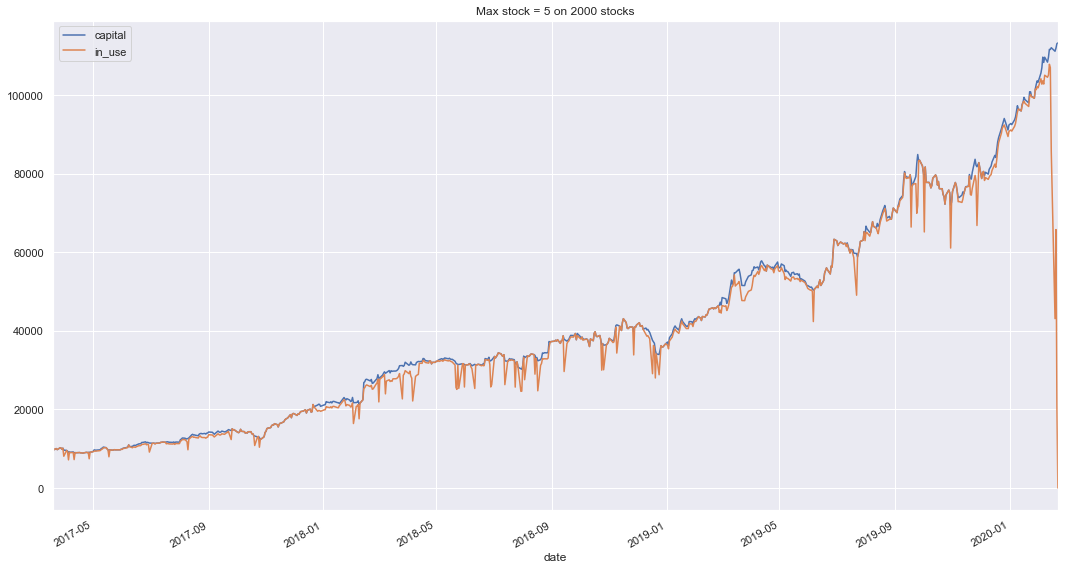

In [7]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 1500 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [8]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-20   CVGI   SELL   2000.000000   2000.000000   340.715503   
0  2017-03-20    JAN   SELL   2000.000000   2000.000000   400.000000   
0  2017-03-20    MOH   SELL   2000.000000   2000.000000    44.903458   
0  2017-03-20   CHNR   SELL   2000.000000   2000.000000  1005.025126   
0  2017-03-20   GLUU   SELL   2000.000000   2000.000000   938.967136   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-18   FLDM   SELL  22410.933633  21918.385641  6156.849899   
0  2020-02-19   TPRE   SELL  22477.532920  22722.965491  2045.271421   
0  2020-02-20   LAKE   SELL  22297.848364  23667.176811  1850.443848   
0  2020-02-20   FLDM   SELL  22297.848364  22120.881313  5898.901683   
0  2020-02-21   GEOS   SELL  20685.737044  21322.449065  1480.725630   

    stop_loss    daily_gain  daily_return  invested          gain  gain_pct  
0       5.283 -2.273737e-13 -1.136868e-14         0 -2.273737e-13     -0.00  
0       4.500  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0      40.086  2.273737e-13  1.136868e-14         0  2.273737e-13      0.00  
0       1.791  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0       1.917  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
..        ...           ...           ...       ...           ...       ...  
0       3.276 -5.541165e+02 -2.465753e+00         0 -4.925480e+02     -2.20  
0       9.891  3.067907e+02  1.368613e+00         0  2.454326e+02      1.09  
0      10.845  1.369328e+03  6.141079e+00         0  1.369328e+03      6.14  
0       3.402 -1.769671e+02 -7.936508e-01         0 -1.769671e+02     -0.79  
0      12.573  1.924943e+02  9.110021e-01         0  6.367120e+02      3.08  

[596 rows x 12 columns]

In [9]:
sell_df.describe()

orig_amount  close_amount     no_shares    stop_loss   daily_gain  \
count    596.000000    596.000000    596.000000   596.000000   596.000000   
mean    8199.636909   8372.964943   1343.030084    39.612309   -12.446408   
std     5687.980382   5839.879637   3403.249768    91.232613   349.795996   
min     1553.182637   1553.182637      2.065164     0.180000 -3747.124210   
25%     3508.877808   3602.555392    123.926732     5.115195   -42.719527   
50%     6465.538495   6489.242015    398.224387    13.617000     0.000000   
75%    11490.333555  12111.920177   1272.248305    42.315750    23.782398   
max    22477.532920  23863.869151  48178.509715  1588.500000  3943.288232   

       daily_return  invested          gain    gain_pct  
count    596.000000     596.0  5.960000e+02  596.000000  
mean      -0.141695       0.0  1.733280e+02    2.358540  
std        4.832585       0.0  8.721529e+02   12.118942  
min      -25.526002       0.0 -2.514082e+03  -23.330000  
25%       -0.745787       0.0 -1.136868e-12    0.000000  
50%        0.000000       0.0  0.000000e+00    0.000000  
75%        0.458821       0.0  1.292998e+02    2.092500  
max       86.956522       0.0  7.433189e+03  110.530000

In [10]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

date ticker action   orig_amount  close_amount     no_shares  \
0 2018-12-20   AVGR   SELL   7732.503925   5928.253009   2577.501308   
0 2017-03-31   ELOX   SELL   1924.528302   1557.951482    458.221024   
0 2017-09-25   CTRC   SELL   2801.981767   2307.514396   1648.224569   
0 2017-10-20   TCCO   SELL   2898.680716   2415.567263    568.368768   
0 2018-07-13   GOGO   SELL   6626.668160   5531.351109   1369.146314   
0 2019-09-25   AVGR   SELL  15503.502584  12989.421084  13967.119445   
0 2018-08-17   ELOX   SELL   5473.348767   4602.851355    385.175846   
0 2019-10-30   ENPH   SELL  12972.159395  10932.511691    582.756487   
0 2017-05-18    SES   SELL   1968.578560   1667.501839     36.187106   
0 2018-12-17   CTRC   SELL   8083.973831   6887.690708   1812.550186   

   stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0      2.700 -1288.750654    -17.857143         0 -1804.250916    -23.33  
0      3.780  -274.932615    -15.000000         0  -366.576819    -19.05  
0      1.530  -247.233685     -9.677419         0  -494.467371    -17.65  
0      4.590  -341.021261    -12.371134         0  -483.113453    -16.67  
0      4.356 -1067.934125    -16.182573         0 -1095.317051    -16.53  
0      0.999 -1117.369556     -7.920792         0 -2514.081500    -16.22  
0     12.789  -704.871798    -13.280116         0  -870.497411    -15.90  
0     20.034 -3747.124210    -25.526002         0 -2039.647704    -15.72  
0     48.960  -138.958487     -7.692308         0  -301.076721    -15.29  
0      4.014  -561.890558     -7.542579         0 -1196.283123    -14.80

In [11]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

date ticker action   orig_amount  close_amount    no_shares  \
0 2017-12-26   ELOX   SELL   2759.563379   5809.607113   726.200889   
0 2018-03-09   ENPH   SELL   4342.031615   8661.681623  2238.160626   
0 2018-02-13     ZN   SELL   4258.751291   8478.069699  1971.644116   
0 2019-03-15   KALV   SELL   8485.781714  13535.172486   467.536183   
0 2019-09-05   MEDP   SELL   9638.602230  15284.676299   184.753733   
0 2020-01-16   RCUS   SELL  13190.460193  20623.649271  1971.668190   
0 2019-08-13   SYRS   SELL  10300.287521  15310.766366  1745.811444   
0 2017-06-12   NVDA   SELL   1637.143686   2427.320095    16.319215   
0 2018-04-13    BHC   SELL   2444.312705   3585.967740   209.094329   
0 2018-01-18   TACT   SELL   2486.128115   3628.107843   273.200892   

   stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0      3.420   363.100445      6.666667         0  3050.043734    110.53  
0      1.746   179.052850      2.110818         0  4319.650009     99.48  
0      1.944  3943.288232     86.956522         0  4219.318408     99.07  
0     16.335 -1005.202793     -6.913183         0  5049.390772     59.50  
0     46.953   247.570002      1.646394         0  5646.074069     58.58  
0      6.021   197.166819      0.965251         0  7433.189077     56.35  
0      5.310   209.497373      1.387283         0  5010.478845     48.64  
0     90.288     6.038110      0.249377         0   790.176408     48.27  
0     10.521   108.729051      3.126879         0  1141.655036     46.71  
0      8.190  -155.724508     -4.115523         0  1141.979728     45.93

In [12]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(146, 0.24496644295302014)

In [13]:
myPnL_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-20    SYX    BUY   2000.000000   2000.000000   368.324125   
0  2017-03-20    JAN    BUY   2000.000000   2000.000000   400.000000   
0  2017-03-20    TGI    BUY   2000.000000   2000.000000    80.064051   
0  2017-03-20   OFLX    BUY   2000.000000   2000.000000    46.937339   
0  2017-03-20   CVGI    BUY   2000.000000   2000.000000   340.715503   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-19   FLDM  CLOSE  22297.848364  22297.848364  5898.901683   
0  2020-02-20   LAKE   SELL  22297.848364  23667.176811  1850.443848   
0  2020-02-20   FLDM   SELL  22297.848364  22120.881313  5898.901683   
0  2020-02-20   GEOS  CLOSE  20685.737044  21129.954733  1480.725630   
0  2020-02-21   GEOS   SELL  20685.737044  21322.449065  1480.725630   

    stop_loss   daily_gain  daily_return  invested  
0       4.887     0.000000      0.000000         0  
0       4.500     0.000000      0.000000         0  
0      22.482     0.000000      0.000000         0  
0      38.349     0.000000      0.000000         0  
0       5.283     0.000000      0.000000         0  
..        ...          ...           ...       ...  
0       3.402     0.000000      0.000000         0  
0      10.845  1369.328447      6.141079         0  
0       3.402  -176.967051     -0.793651         0  
0      12.573   -59.229025     -0.279525         0  
0      12.573   192.494332      0.911002         0  

[4816 rows x 10 columns]

In [14]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['CVGI', 'JAN', 'MOH', 'CHNR', 'GLUU', 'MLAB', 'PTSI', 'CASH',
        'OFLX', 'SYX', 'NBIX', 'GEOS', 'DXCM', 'TGI', 'SGMO', 'ELOX',
        'CTRC', 'CTRN', 'BHE', 'TCCO', 'BASI', 'WINA', 'EBS', 'PODD',
        'BHC', 'STRL', 'CYH', 'IMGN', 'DAIO', 'SGC', 'CSGS', 'CCMP',
        'TRNS', 'SES', 'OPNT', 'SRT', 'ZN', 'EXR', 'DXR', 'TGA', 'CRK',
        'SYNL', 'LGL', 'MU', 'PZG', 'NSSC', 'VRTX', 'GSIT', 'CVCO', 'FBNC',
        'AMKR', 'HSII', 'BC', 'CCNE', 'AUMN', 'HBIO', 'ATRS', 'EXAS',
        'LMNR', 'LULU', 'RMD', 'VECO', 'AMD', 'NVDA', 'LZB', 'INS', 'BKH',
        'ARL', 'WTT', 'TSRI', 'MED', 'LHCG', 'MELI', 'HCCI', 'FNB', 'EQIX',
        'WAT', 'NOA', 'AMWD', 'IMAX', 'THR', 'AGX', 'FORM', 'TACT', 'IIN',
        'EDUC', 'IPHI', 'KIRK', 'CTHR', 'AMPE', 'DSGX', 'TBBK', 'ALSK',
        'PRAA', 'LL', 'AAPL', 'PCTI', 'PCRX', 'UI', 'NATR', 'ERII', 'IVC',
        'BTE', 'CCXI', 'VNRX', 'MLP', 'CTAS', 'STRM', 'MTEM', 'EEFT',
        'ATSG', 'NOVT', 'CROX', 'IOVA', 'JBLU', 'IIVI', 'BCR

In [15]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker         gain
239   RCUS  7433.189077
213   OVID  6091.777049
94    ELOX  6031.681726
180   MEDP  5646.074069
271   SYRS  5010.478845
116   FRTA  4582.731078
63    COUP  4299.388844
85    DXCM  4270.149320
319     ZN  4035.568269
247   RUBI  3915.512108

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
29    AVGR -4318.332416
275   TCCO -2912.886796
74    CTRC -2832.108683
19    ARDX -2088.811001
240   REKR -2018.188361
264   STRM  -951.762073
78     CYH  -760.183237
110   FLDM  -669.515042
148   IOVA  -665.210324
237   RACE  -662.932590

In [17]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker         gain
239   RCUS  7433.189077
213   OVID  6091.777049
180   MEDP  5646.074069
271   SYRS  5010.478845
63    COUP  4299.388844
171    LOB  3282.684320
199   NEWR  2925.842071
200   NEXA  2715.489479
6     AEZS  2640.600204
116   FRTA  2291.365539

In [18]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
29    AVGR -2159.166208
240   REKR -2018.188361
19    ARDX -1044.405501
237   RACE  -662.932590
282   TLRA  -609.753188
243   RICK  -511.724033
264   STRM  -475.881037
275   TCCO  -364.110850
110   FLDM  -334.757521
109   FIVN  -330.466083

# Suspicious Stocks

Below are the plotted close price plots as returned by yfinance. 

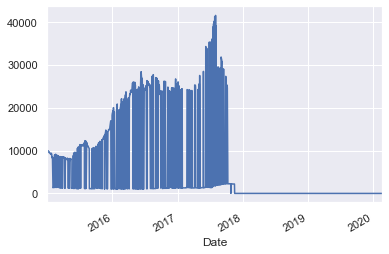

In [19]:
# Google shows close price between $8 - $16, so something seems to be wrong here
asset  = yf.Ticker('SBT')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

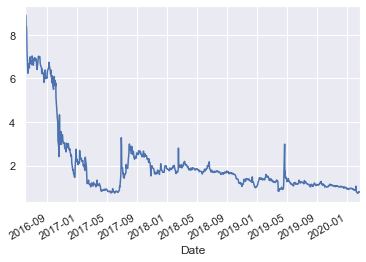

In [20]:
# Data looks okay - there's just a quick change around 2019-04-22 and then a big drop on 2019-04-23.
# Trade is still profitable. Modified the stop_loss logic to match what stockbrokers do...
asset  = yf.Ticker('MBRX')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

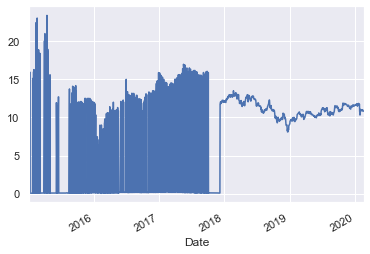

In [21]:
# LBC stock looks suspicious => exclude and rerun...
asset  = yf.Ticker('LBC')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

In [22]:
myCapital_df.tail()

date capital       in_use     free
date                                               
2020-02-14 2020-02-14  112089        85681  26408.4
2020-02-18 2020-02-18  111182      43116.7  68065.7
2020-02-19 2020-02-19  111978      65784.9    46193
2020-02-20 2020-02-20  113111        21130  91981.1
2020-02-21 2020-02-21  113304  3.27418e-11   113304

In [23]:
len(possible_trades_df)

16292